# Census Chaos

To avoid prison gerrymandering, ten states (CA, CO, CT, DE, MD, NJ, NV, NY, VA, WA) adjusted the 2020 U.S. Census data to reallocate incarcerated populations at addresses prior to incarceration according to their respective state laws. Pennsylvania's redistricting committee and seemingly Montana's Districting and Apportionment Commission likewise chose to do this process for their states even though it's not enshrined in law. 

This notebook looks at the differences between the original Census PL 94-171 population numbers to the amended files by these twelve states except Montana for their adjusted data does not seem to be publicly available at the moment.

Source: The files being imported are primarily from the Redistricting Hub API, an aggregator of each state's files from their respective commissions and committees. https://redistrictingdatahub.org/

Note: MA, MI, TN have also taken measures to address this issue but have dealt with prisoner allocation differently and IL has passed a law affecting the 2030 Census but not the most recent one.  

-----

##### Imports

In [1]:
import pandas as pd

# Always display all columns (no matter how many there are)
pd.set_option('display.max_columns', None)

from plotnine import *

/Users/sm/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Necessary imports
import pandas as pd
from plotnine import *

# I don't think we use these?
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
require('explore')
require('tidyr')
require('forcats')
require('knitr')
require('ragg')
require('palmerpenguins')
# require('theme538')

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: readr

R[write to console]: Loading required package: extrafont

R[write to console]: Registering fonts with R

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: reshape2

R[write to console]: Loading required package: explore

R[write to console]: Loading required package: tidyr

R[write to console]: 
Attaching package: ‘tidyr’


R[write to console]: The following object is masked from ‘package:reshape2’:

    smiths


R[write to console]: Loading required package: forcats

R[write to console]: Loading required package: knitr

R[write to console]: Loading required package: r

In [6]:
df = pd.DataFrame(
    np.random.randint(0,100,size=(100, 2)), columns=list('AB'))
df.head()

,A,B
0,13,3
1,24,69
2,77,29
3,92,39
4,72,87


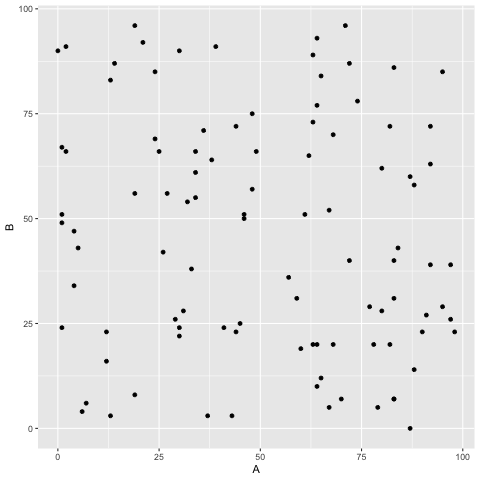

In [7]:
%%R -i df

# EXAMPLE R CELL
df
plt <- ggplot(df) +
    geom_point(aes(A,B))

plt

----

##### U.S. Census data Abbreviations

Abbreviations Glossary https://www.census.gov/pred/www/rpts/TXE%20Program%20Summary%20Appendix%20B.pdf

More codes http://starr.tamu.edu/files/2013/01/Census-Codes.pdf

FILEID = file id

STUSAB = State abbreviation

SUMLEV = Census Bureau code to indicate geography type. 
For example, in the raw census data, all states have a SUMLEV code of “040.”

CHARITER = characteristic iteration

CIFSN = characteristic iteration file sequence number 

LOGRECNO = unique logical record number 


P0010001 = Total population Total

P0020001 = Total population Total

P0030001 = Total population 18 years and over Total

P0050001 = Total Group Quarters Population

P0050003 = Correctional facilities for adults

P0050004 = Juvenile facilities

In [8]:
# Census GEOCODE = 60014001001000 is the same as adjusted BLOCK20 = 60014001001000
# 6 = state , 001 = county, 400100 = tract, 1000 = block

-----

## California

California, alphabetically being the first state to work on, I explored and imported in more census files to see what would be of most use including block level, block group level U.S. Census data and all the adjusted files. After California, I only imported in the block level census files along with necessary states' adjusted files.

##### 2020 PL 94-171 Data Summary File for California based on the Decennial Census at the Block level

In [9]:
df_ca1 = pd.read_csv("..//data//source//RDH-data//ca_pl2020_b_csv//ca_pl2020_b.csv", encoding="utf-8")

In [10]:
df_ca1.head(5)

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,CA,750,0,0,0,148466,7500000US060014001001000,60014001001000,4,9,6,1779778,1,H1,1675839,92230,Z5,1935228,99999,99,99999999,53000,C1,2411292,400100,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,41860,1,488,36084,99999,9,999,99999,Y,N,13,9,15,99999,99999,28050,51124,0,1000,Block 1000,S,0,0,37.880348,-122.228550,BK,99999,60014001001000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [11]:
len(df_ca1)

519723

Creating a subset with key info and key population numbers

In [12]:
df_ca1_subset = df_ca1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [13]:
df_ca1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,CA,60014001001000,1,400100,1,1000,51124,Block 1000,37.880348,-122.228550,0,0,0,0,0,0
1,PLST,CA,60014001001001,1,400100,1,1001,695414,Block 1001,37.879219,-122.228772,0,0,0,0,0,0
2,PLST,CA,60014001001002,1,400100,1,1002,9330,Block 1002,37.882910,-122.238471,0,0,0,0,0,0
3,PLST,CA,60014001001003,1,400100,1,1003,1232350,Block 1003,37.875405,-122.237007,0,0,0,0,0,0
4,PLST,CA,60014001001004,1,400100,1,1004,3524,Block 1004,37.881882,-122.243788,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519718,PLST,CA,61150411021044,115,41102,1,1044,26265,Block 1044,39.314107,-121.210561,0,0,0,0,0,0
519719,PLST,CA,61150411021045,115,41102,1,1045,0,Block 1045,39.317411,-121.206220,0,0,0,0,0,0
519720,PLST,CA,61150411021046,115,41102,1,1046,3003346,Block 1046,39.332694,-121.211516,18,18,12,0,0,0
519721,PLST,CA,61150411021047,115,41102,1,1047,2589903,Block 1047,39.353227,-121.261982,135,135,121,0,0,0


2020 PL 94-171 Data Summary File for California based on the Decennial Census at the Block Group level

In [14]:
# df_ca2 = pd.read_csv("..//data//source//RDH-data//ca_pl2020_bg_csv//ca_pl2020_bg.csv", encoding="utf-8")

In [15]:
# df_ca2

In [16]:
# len(df_ca2)

In [17]:
# df_ca2_subset = df_ca2[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [18]:
# df_ca2_subset

##### 2020 Redistricting Data for California at the Block level (Adjusted)

From Data Hub ReadMe file: This dataset was retrieved from the Statewide Database at https://statewidedatabase.org/redistricting2021/counties.html#

In [19]:
df_ca3 = pd.read_csv("..//data//source//RDH-data//ca_pl2020_official_csv//state_PL94_2020_Adjusted_P24_DOJ_Block_csv//state_PL94_2020_Adjusted_P24_DOJ_Block.csv", encoding="utf-8")

In [20]:
df_ca3.head(5)

,BLOCK20,BLKGRP20,TRACT20,COUNTY20,PLACE20,SUMLEV,Population P2,Hispanic Origin,Not Hispanic,NH_1 Race,NH_Wht,NH_Blk,NH_Ind,NH_Asn,NH_Hwn,NH_Oth,NH_2+ Races,NH_2 Races,NH_WhtBlk,NH_WhtInd,NH_WhtAsn,NH_WhtHwn,NH_WhtOth,NH_BlkInd,NH_BlkAsn,NH_BlkHwn,NH_BlkOth,NH_IndAsn,NH_IndHwn,NH_IndOth,NH_AsnHwn,NH_AsnOth,NH_HwnOth,NH_3 Races,NH_WhtBlkInd,NH_WhtBlkAsn,NH_WhtBlkHwn,NH_WhtBlkOth,NH_WhtIndAsn,NH_WhtIndHwn,NH_WhtIndOth,NH_WhtAsnHwn,NH_WhtAsnOth,NH_WhtHwnOth,NH_BlkIndAsn,NH_BlkIndHwn,NH_BlkIndOth,NH_BlkAsnHwn,NH_BlkAsnOth,NH_BlkHwnOth,NH_IndAsnHwn,NH_IndAsnOth,NH_IndHwnOth,NH_AsnHwnOth,NH_4 Races,NH_WhtBlkIndAsn,NH_WhtBlkIndHwn,NH_WhtBlkIndOth,NH_WhtBlkAsnHwn,NH_WhtBlkAsnOth,NH_WhtBlkHwnOth,NH_WhtIndAsnHwn,NH_WhtIndAsnOth,NH_WhtIndHwnOth,NH_WhtAsnHwnOth,NH_BlkIndAsnHwn,NH_BlkIndAsnOth,NH_BlkIndHwnOth,NH_BlkAsnHwnOth,NH_IndAsnHwnOth,NH_5 Races,NH_WhtBlkIndAsnHwn,NH_WhtBlkIndAsnOth,NH_WhtBlkIndHwnOth,NH_WhtBlkAsnHwnOth,NH_WhtIndAsnHwnOth,NH_BlkIndAsnHwnOth,NH_6 Races,NH_WhtBlkIndAsnHwnOth,18+_Population P4,H18+_Pop,NH18+_Pop,NH18+_1 Race,NH18+_Wht,NH18+_Blk,NH18+_Ind,NH18+_Asn,NH18+_Hwn,NH18+_Oth,NH18+_2+ Races,NH18+_2 Races,NH18+_WhtBlk,NH18+_WhtInd,NH18+_WhtAsn,NH18+_WhtHwn,NH18+_WhtOth,NH18+_BlkInd,NH18+_BlkAsn,NH18+_BlkHwn,NH18+_BlkOth,NH18+_IndAsn,NH18+_IndHwn,NH18+_IndOth,NH18+_AsnHwn,NH18+_AsnOth,NH18+_HwnOth,NH18+_3 Races,NH18+_WhtBlkInd,NH18+_WhtBlkAsn,NH18+_WhtBlkHwn,NH18+_WhtBlkOth,NH18+_WhtIndAsn,NH18+_WhtIndHwn,NH18+_WhtIndOth,NH18+_WhtAsnHwn,NH18+_WhtAsnOth,NH18+_WhtHwnOth,NH18+_BlkIndAsn,NH18+_BlkIndHwn,NH18+_BlkIndOth,NH18+_BlkAsnHwn,NH18+_BlkAsnOth,NH18+_BlkHwnOth,NH18+_IndAsnHwn,NH18+_IndAsnOth,NH18+_IndHwnOth,NH18+_AsnHwnOth,NH18+_4 Races,NH18+_WhtBlkIndAsn,NH18+_WhtBlkIndHwn,NH18+_WhtBlkIndOth,NH18+_WhtBlkAsnHwn,NH18+_WhtBlkAsnOth,NH18+_WhtBlkHwnOth,NH18+_WhtIndAsnHwn,NH18+_WhtIndAsnOth,NH18+_WhtIndHwnOth,NH18+_WhtAsnHwnOth,NH18+_BlkIndAsnHwn,NH18+_BlkIndAsnOth,NH18+_BlkIndHwnOth,NH18+_BlkAsnHwnOth,NH18+_IndAsnHwnOth,NH18+_5 Races,NH18+_WhtBlkIndAsnHwn,NH18+_WhtBlkIndAsnOth,NH18+_WhtBlkIndHwnOth,NH18+_WhtBlkAsnHwnOth,NH18+_WhtIndAsnHwnOth,NH18+_BlkIndAsnHwnOth,NH18+_6 Races,NH18+_WhtBlkIndAsnHwnOth,DOJ_NH_Blk,DOJ_NH_Ind,DOJ_NH_Asn,DOJ_NH_Hwn,DOJ_NH_Oth,DOJ_NH_OthMR,DOJ_NH18+_Blk,DOJ_NH18+_Ind,DOJ_NH18+_Asn,DOJ_NH18+_Hwn,DOJ_NH18+_Oth,DOJ_NH18+_OthMR
0,60014001001000,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,60014001001001,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60014001001002,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60014001001003,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60014001001004,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [21]:
df_ca3_subset = df_ca3[['BLOCK20', 'BLKGRP20', 'TRACT20', 'COUNTY20', 'Population P2', '18+_Population P4']]

In [22]:
df_ca3_subset

,BLOCK20,BLKGRP20,TRACT20,COUNTY20,Population P2,18+_Population P4
0,60014001001000,60014001001,6001400100,1,0,0
1,60014001001001,60014001001,6001400100,1,0,0
2,60014001001002,60014001001,6001400100,1,0,0
3,60014001001003,60014001001,6001400100,1,0,0
4,60014001001004,60014001001,6001400100,1,0,0
...,...,...,...,...,...,...
519718,61150411021044,61150411021,6115041102,115,0,0
519719,61150411021045,61150411021,6115041102,115,0,0
519720,61150411021046,61150411021,6115041102,115,19,13
519721,61150411021047,61150411021,6115041102,115,135,121


Column / Headers of Adjusted Data

In [23]:
df_ca14 = pd.read_csv("..//data//source//RDH-data//ca_pl2020_official_csv//state_PL94_2020_Adjusted_P24_DOJ_Block_csv//PL94_2020_Adjusted_P24_DOJ_csv_headers.csv", encoding="utf-8")
df_ca14

,BLOCK20,BLKGRP20,TRACT20,COUNTY20,PLACE20,SUMLEV,Population P2,Hispanic Origin,Not Hispanic,NH_1 Race,NH_Wht,NH_Blk,NH_Ind,NH_Asn,NH_Hwn,NH_Oth,NH_2+ Races,NH_2 Races,NH_WhtBlk,NH_WhtInd,NH_WhtAsn,NH_WhtHwn,NH_WhtOth,NH_BlkInd,NH_BlkAsn,NH_BlkHwn,NH_BlkOth,NH_IndAsn,NH_IndHwn,NH_IndOth,NH_AsnHwn,NH_AsnOth,NH_HwnOth,NH_3 Races,NH_WhtBlkInd,NH_WhtBlkAsn,NH_WhtBlkHwn,NH_WhtBlkOth,NH_WhtIndAsn,NH_WhtIndHwn,NH_WhtIndOth,NH_WhtAsnHwn,NH_WhtAsnOth,NH_WhtHwnOth,NH_BlkIndAsn,NH_BlkIndHwn,NH_BlkIndOth,NH_BlkAsnHwn,NH_BlkAsnOth,NH_BlkHwnOth,NH_IndAsnHwn,NH_IndAsnOth,NH_IndHwnOth,NH_AsnHwnOth,NH_4 Races,NH_WhtBlkIndAsn,NH_WhtBlkIndHwn,NH_WhtBlkIndOth,NH_WhtBlkAsnHwn,NH_WhtBlkAsnOth,NH_WhtBlkHwnOth,NH_WhtIndAsnHwn,NH_WhtIndAsnOth,NH_WhtIndHwnOth,NH_WhtAsnHwnOth,NH_BlkIndAsnHwn,NH_BlkIndAsnOth,NH_BlkIndHwnOth,NH_BlkAsnHwnOth,NH_IndAsnHwnOth,NH_5 Races,NH_WhtBlkIndAsnHwn,NH_WhtBlkIndAsnOth,NH_WhtBlkIndHwnOth,NH_WhtBlkAsnHwnOth,NH_WhtIndAsnHwnOth,NH_BlkIndAsnHwnOth,NH_6 Races,NH_WhtBlkIndAsnHwnOth,18+_Population P4,H18+_Pop,NH18+_Pop,NH18+_1 Race,NH18+_Wht,NH18+_Blk,NH18+_Ind,NH18+_Asn,NH18+_Hwn,NH18+_Oth,NH18+_2+ Races,NH18+_2 Races,NH18+_WhtBlk,NH18+_WhtInd,NH18+_WhtAsn,NH18+_WhtHwn,NH18+_WhtOth,NH18+_BlkInd,NH18+_BlkAsn,NH18+_BlkHwn,NH18+_BlkOth,NH18+_IndAsn,NH18+_IndHwn,NH18+_IndOth,NH18+_AsnHwn,NH18+_AsnOth,NH18+_HwnOth,NH18+_3 Races,NH18+_WhtBlkInd,NH18+_WhtBlkAsn,NH18+_WhtBlkHwn,NH18+_WhtBlkOth,NH18+_WhtIndAsn,NH18+_WhtIndHwn,NH18+_WhtIndOth,NH18+_WhtAsnHwn,NH18+_WhtAsnOth,NH18+_WhtHwnOth,NH18+_BlkIndAsn,NH18+_BlkIndHwn,NH18+_BlkIndOth,NH18+_BlkAsnHwn,NH18+_BlkAsnOth,NH18+_BlkHwnOth,NH18+_IndAsnHwn,NH18+_IndAsnOth,NH18+_IndHwnOth,NH18+_AsnHwnOth,NH18+_4 Races,NH18+_WhtBlkIndAsn,NH18+_WhtBlkIndHwn,NH18+_WhtBlkIndOth,NH18+_WhtBlkAsnHwn,NH18+_WhtBlkAsnOth,NH18+_WhtBlkHwnOth,NH18+_WhtIndAsnHwn,NH18+_WhtIndAsnOth,NH18+_WhtIndHwnOth,NH18+_WhtAsnHwnOth,NH18+_BlkIndAsnHwn,NH18+_BlkIndAsnOth,NH18+_BlkIndHwnOth,NH18+_BlkAsnHwnOth,NH18+_IndAsnHwnOth,NH18+_5 Races,NH18+_WhtBlkIndAsnHwn,NH18+_WhtBlkIndAsnOth,NH18+_WhtBlkIndHwnOth,NH18+_WhtBlkAsnHwnOth,NH18+_WhtIndAsnHwnOth,NH18+_BlkIndAsnHwnOth,NH18+_6 Races,NH18+_WhtBlkIndAsnHwnOth,DOJ_NH_Blk,DOJ_NH_Ind,DOJ_NH_Asn,DOJ_NH_Hwn,DOJ_NH_Oth,DOJ_NH_OthMR,DOJ_NH18+_Blk,DOJ_NH18+_Ind,DOJ_NH18+_Asn,DOJ_NH18+_Hwn,DOJ_NH18+_Oth,DOJ_NH18+_OthMR


In [24]:
df_ca15 = pd.read_csv("..//data//source//RDH-data//ca_pl2020_official_csv//state_PL94_2020_Adjusted_P24_DOJ_Block_csv//PL94_2020_Adjusted_P24_DOJ_data_dictionary.csv", encoding="utf-8")
df_ca15.tail(20)

,DESCRIPTION,CSV_FIELD,DBF_FIELD,DATA_TYPE,MAX_SIZE
144,Total population 18 years and over!!Not Hispan...,NH18+_WhtBlkIndAsnHwn,P0040066,N,5
145,Total population 18 years and over!!Not Hispan...,NH18+_WhtBlkIndAsnOth,P0040067,N,5
146,Total population 18 years and over!!Not Hispan...,NH18+_WhtBlkIndHwnOth,P0040068,N,5
147,Total population 18 years and over!!Not Hispan...,NH18+_WhtBlkAsnHwnOth,P0040069,N,5
148,Total population 18 years and over!!Not Hispan...,NH18+_WhtIndAsnHwnOth,P0040070,N,5
149,Total population 18 years and over!!Not Hispan...,NH18+_BlkIndAsnHwnOth,P0040071,N,5
150,Total population 18 years and over!!Not Hispan...,NH18+_6 Races,P0040072,N,5
151,Total population 18 years and over!!Not Hispan...,NH18+_WhtBlkIndAsnHwnOth,P0040073,N,5
152,DOJ Tabulation!!Total Population!!Not Hispanic...,DOJ_NH_Blk,DOJ_BlkPop,N,5
153,DOJ Tabulation!!Total Population!!Not Hispanic...,DOJ_NH_Ind,DOJ_IndPop,N,5


CA P5 Adjusted Data (Group Quarters Data

In [25]:
df_ca6 = pd.read_csv("..//data//source//RDH-data//ca_pl2020_official_csv//state_PL94_2020_Adjusted_P5//state_PL94_2020_Adjusted_P5.csv", encoding="utf-8")

In [26]:
df_ca6.head(5)

,BLOCK20,BLKGRP20,TRACT20,COUNTY,PLACE20,SUMLEV,PopulationP5,GQ_Institutional_Pop,GQ_Inst_CFAdult,GQ_Inst_Juvenile,GQ_Inst_Nursing,GQ_Inst_Oth,GQ_NonInst_Pop,GQ_NonInst_Student,GQ_NonInst_Military,GQ_NonInst_Oth,facility
0,60014001001000,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,
1,60014001001001,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,
2,60014001001002,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,
3,60014001001003,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,
4,60014001001004,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,


In [27]:
df_ca6_subset = df_ca6[['BLOCK20', 'PopulationP5', 'GQ_Institutional_Pop', 'GQ_Inst_CFAdult', 'GQ_Inst_Juvenile']]

In [28]:
df_ca6_subset.head(3)

,BLOCK20,PopulationP5,GQ_Institutional_Pop,GQ_Inst_CFAdult,GQ_Inst_Juvenile
0,60014001001000,0,0,0,0
1,60014001001001,0,0,0,0
2,60014001001002,0,0,0,0


Merging all the key adjusted data into one dataframe

In [29]:
df_ca7 = pd.merge(df_ca3_subset, df_ca6_subset, left_on='BLOCK20', right_on='BLOCK20')
df_ca7.head(3)

,BLOCK20,BLKGRP20,TRACT20,COUNTY20,Population P2,18+_Population P4,PopulationP5,GQ_Institutional_Pop,GQ_Inst_CFAdult,GQ_Inst_Juvenile
0,60014001001000,60014001001,6001400100,1,0,0,0,0,0,0
1,60014001001001,60014001001,6001400100,1,0,0,0,0,0,0
2,60014001001002,60014001001,6001400100,1,0,0,0,0,0,0


##### Merging the Census and Adjusted Data to Compare on GEOCODE and BLOCK20

In [30]:
# Census GEOCODE = 60014001001000 is the same as adjusted BLOCK20 = 60014001001000
# 6 = state , 001 = county, 400100 = tract, 1000 = block 

In [31]:
df_ca7 = pd.merge(df_ca1_subset, df_ca7, left_on='GEOCODE', right_on='BLOCK20')
df_ca7

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,BLOCK20,BLKGRP20,TRACT20,COUNTY20,Population P2,18+_Population P4,PopulationP5,GQ_Institutional_Pop,GQ_Inst_CFAdult,GQ_Inst_Juvenile
0,PLST,CA,60014001001000,1,400100,1,1000,51124,Block 1000,37.880348,-122.228550,0,0,0,0,0,0,60014001001000,60014001001,6001400100,1,0,0,0,0,0,0
1,PLST,CA,60014001001001,1,400100,1,1001,695414,Block 1001,37.879219,-122.228772,0,0,0,0,0,0,60014001001001,60014001001,6001400100,1,0,0,0,0,0,0
2,PLST,CA,60014001001002,1,400100,1,1002,9330,Block 1002,37.882910,-122.238471,0,0,0,0,0,0,60014001001002,60014001001,6001400100,1,0,0,0,0,0,0
3,PLST,CA,60014001001003,1,400100,1,1003,1232350,Block 1003,37.875405,-122.237007,0,0,0,0,0,0,60014001001003,60014001001,6001400100,1,0,0,0,0,0,0
4,PLST,CA,60014001001004,1,400100,1,1004,3524,Block 1004,37.881882,-122.243788,0,0,0,0,0,0,60014001001004,60014001001,6001400100,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519718,PLST,CA,61150411021044,115,41102,1,1044,26265,Block 1044,39.314107,-121.210561,0,0,0,0,0,0,61150411021044,61150411021,6115041102,115,0,0,0,0,0,0
519719,PLST,CA,61150411021045,115,41102,1,1045,0,Block 1045,39.317411,-121.206220,0,0,0,0,0,0,61150411021045,61150411021,6115041102,115,0,0,0,0,0,0
519720,PLST,CA,61150411021046,115,41102,1,1046,3003346,Block 1046,39.332694,-121.211516,18,18,12,0,0,0,61150411021046,61150411021,6115041102,115,19,13,0,0,0,0
519721,PLST,CA,61150411021047,115,41102,1,1047,2589903,Block 1047,39.353227,-121.261982,135,135,121,0,0,0,61150411021047,61150411021,6115041102,115,135,121,0,0,0,0


Simplifying dataframe

In [32]:
df_ca8 = df_ca7[['BLOCK20', 'COUNTY', 'TRACT', 'BLOCK', 'P0020001', 'Population P2', 'P0030001', '18+_Population P4', 'P0050003', 'GQ_Inst_CFAdult', 'P0050004', 'GQ_Inst_Juvenile', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON']]

In [33]:
df_ca8

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON
0,60014001001000,1,400100,1000,0,0,0,0,0,0,0,0,51124,Block 1000,37.880348,-122.228550
1,60014001001001,1,400100,1001,0,0,0,0,0,0,0,0,695414,Block 1001,37.879219,-122.228772
2,60014001001002,1,400100,1002,0,0,0,0,0,0,0,0,9330,Block 1002,37.882910,-122.238471
3,60014001001003,1,400100,1003,0,0,0,0,0,0,0,0,1232350,Block 1003,37.875405,-122.237007
4,60014001001004,1,400100,1004,0,0,0,0,0,0,0,0,3524,Block 1004,37.881882,-122.243788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519718,61150411021044,115,41102,1044,0,0,0,0,0,0,0,0,26265,Block 1044,39.314107,-121.210561
519719,61150411021045,115,41102,1045,0,0,0,0,0,0,0,0,0,Block 1045,39.317411,-121.206220
519720,61150411021046,115,41102,1046,18,19,12,13,0,0,0,0,3003346,Block 1046,39.332694,-121.211516
519721,61150411021047,115,41102,1047,135,135,121,121,0,0,0,0,2589903,Block 1047,39.353227,-121.261982


##### Using the Census' Group Quarters — Correctional Facility Count (P0050003) to identify relevant blocks

In [34]:
df_ca8.sort_values(by = 'P0050003', ascending=False).head(5)

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON
301620,60659810001003,65,981000,1003,5972,0,5972,0,5972,0,0,0,1475722,Block 1003,33.561347,-114.924365
320138,60679883001003,67,988300,1003,5627,52,5604,29,5575,0,0,0,3026457,Block 1003,38.694187,-121.156830
105833,60319801001004,31,980100,1004,5506,0,5506,0,5506,0,0,0,1303680,Block 1004,36.053283,-119.549993
90858,60290046011001,29,4601,1001,4971,22,4969,20,4949,0,0,0,2546742,Block 1001,35.783088,-119.312332
89751,60290043021001,29,4302,1001,4342,0,4342,0,4342,0,0,0,1211566,Block 1001,35.594172,-119.415894


In [35]:
# df_ca8.P0050003.sort_values(ascending = False).head(5)

In [36]:
df_ca8[df_ca8.P0050003 == 5972]
#33.561347, -114.924365 according to Google Maps is Ironwood State Prison

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON
301620,60659810001003,65,981000,1003,5972,0,5972,0,5972,0,0,0,1475722,Block 1003,33.561347,-114.924365


In [37]:
# df_ca8[df_ca8.P0050003 == 5575]

In [38]:
# df_ca8[df_ca8.P0050003 == 5506]

In [39]:
# df_ca8[df_ca8.P0050003 == 4949]

In [40]:
# df_ca8[df_ca8.P0050003 == 4342]

##### Creating Columns for Differences between the Two Files

In [41]:
df_ca8['dif_pop'] = df_ca8['Population P2'] - df_ca8['P0020001']

In [42]:
df_ca8['adjpop'] = df_ca8['Population P2']

In [43]:
# df_ca8['dif_eighteen_plus'] = df_ca8['18+_Population P4'] - df_ca8['P0030001']

In [44]:
# df_ca8['dif_CFAdult'] = df_ca8['GQ_Inst_CFAdult'] - df_ca8['P0050003']

In [45]:
# df_ca8['dif_Inst_Juvenile'] = df_ca8['P0050004'] - df_ca8['GQ_Inst_Juvenile']

In [46]:
df_ca8

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON,dif_pop,adjpop
0,60014001001000,1,400100,1000,0,0,0,0,0,0,0,0,51124,Block 1000,37.880348,-122.228550,0,0
1,60014001001001,1,400100,1001,0,0,0,0,0,0,0,0,695414,Block 1001,37.879219,-122.228772,0,0
2,60014001001002,1,400100,1002,0,0,0,0,0,0,0,0,9330,Block 1002,37.882910,-122.238471,0,0
3,60014001001003,1,400100,1003,0,0,0,0,0,0,0,0,1232350,Block 1003,37.875405,-122.237007,0,0
4,60014001001004,1,400100,1004,0,0,0,0,0,0,0,0,3524,Block 1004,37.881882,-122.243788,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519718,61150411021044,115,41102,1044,0,0,0,0,0,0,0,0,26265,Block 1044,39.314107,-121.210561,0,0
519719,61150411021045,115,41102,1045,0,0,0,0,0,0,0,0,0,Block 1045,39.317411,-121.206220,0,0
519720,61150411021046,115,41102,1046,18,19,12,13,0,0,0,0,3003346,Block 1046,39.332694,-121.211516,1,19
519721,61150411021047,115,41102,1047,135,135,121,121,0,0,0,0,2589903,Block 1047,39.353227,-121.261982,0,135


In [47]:
df_ca8.dif_pop.sort_values(ascending = False)

168248      28
131358      23
82912       21
131390      20
191748      18
          ... 
89751    -4342
90858    -4949
105833   -5506
320138   -5575
301620   -5972
Name: dif_pop, Length: 519723, dtype: int64

In [48]:
# df_ca8.dif_pop.plot()

<AxesSubplot:>

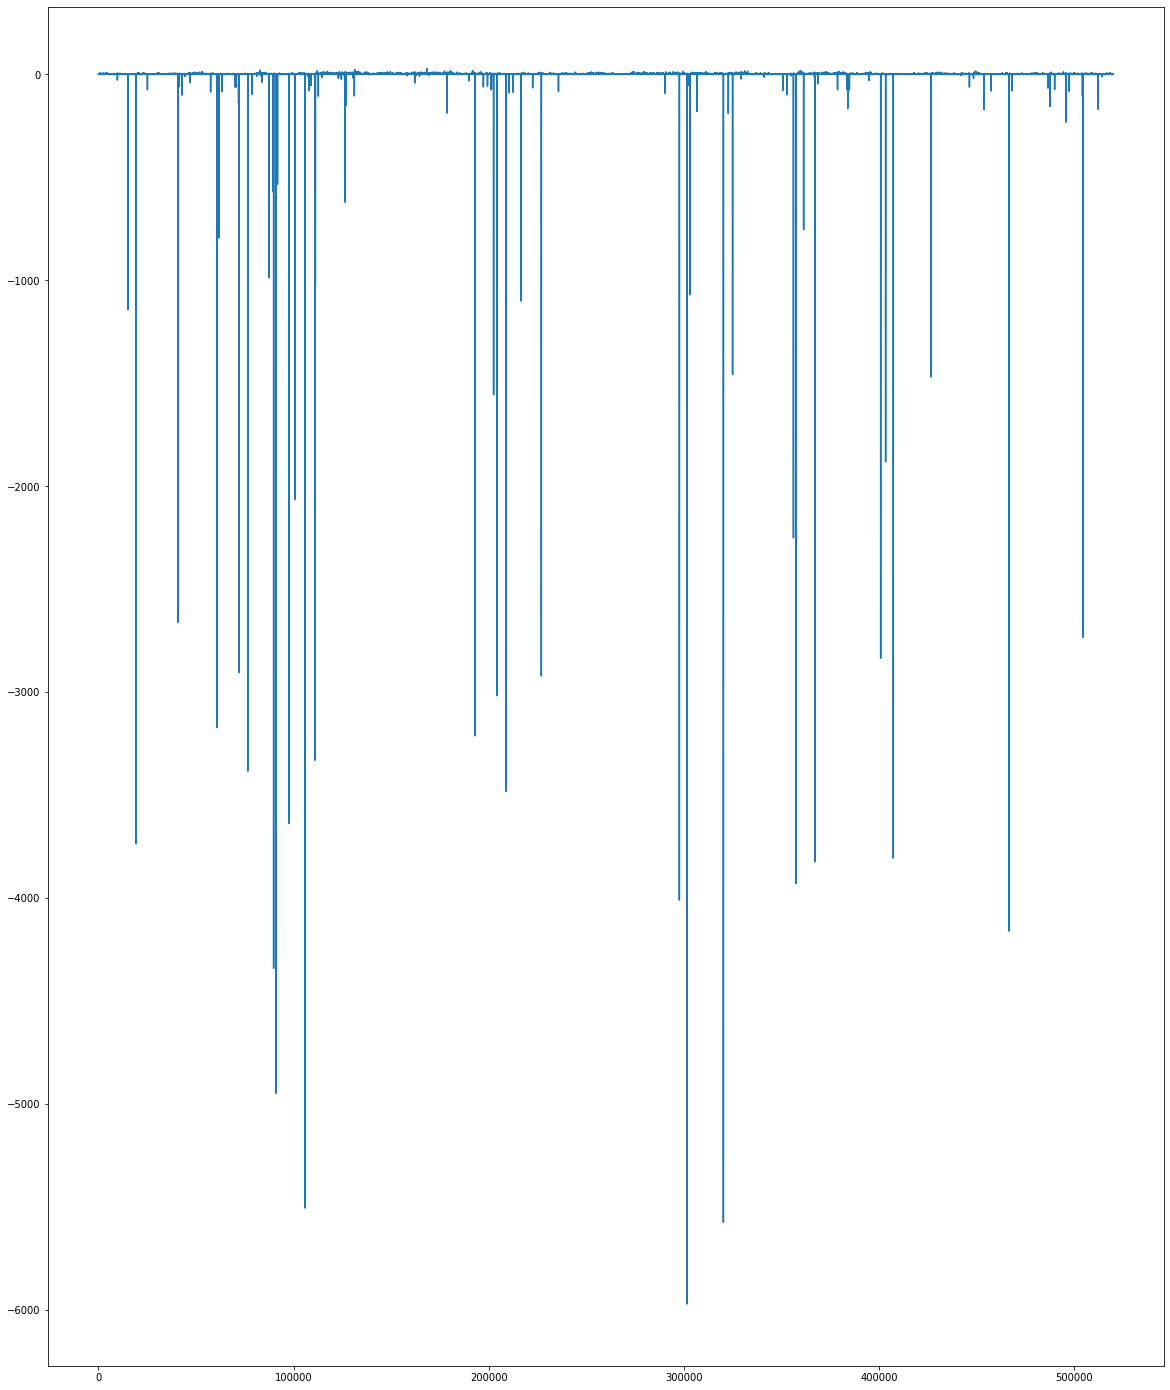

In [49]:
df_ca8.dif_pop.plot(figsize = (20,25))

In [50]:
# df_ca8.dif_pop.sort_values().plot.barh()

In [51]:
# x= 'dif_pop', y = 'BLOCK', xlabel='', ylabel=''

P0010001 = Total population Total

P0020001 = Total population Total

P0030001 = Total population 18 years and over Total

P0050001 = Total Group Quarters Population

P0050003 = Correctional facilities for adults

P0050004 = Juvenile facilities

In [52]:
for col in df_ca8.columns:
    print(col)

BLOCK20
COUNTY
TRACT
BLOCK
P0020001
Population P2
P0030001
18+_Population P4
P0050003
GQ_Inst_CFAdult
P0050004
GQ_Inst_Juvenile
AREALAND
NAME
INTPTLAT
INTPTLON
dif_pop
adjpop


In [53]:
df_ca8.sort_values(by = 'dif_pop', ascending=True)

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON,dif_pop,adjpop
301620,60659810001003,65,981000,1003,5972,0,5972,0,5972,0,0,0,1475722,Block 1003,33.561347,-114.924365,-5972,0
320138,60679883001003,67,988300,1003,5627,52,5604,29,5575,0,0,0,3026457,Block 1003,38.694187,-121.156830,-5575,52
105833,60319801001004,31,980100,1004,5506,0,5506,0,5506,0,0,0,1303680,Block 1004,36.053283,-119.549993,-5506,0
90858,60290046011001,29,4601,1001,4971,22,4969,20,4949,0,0,0,2546742,Block 1001,35.783088,-119.312332,-4949,22
89751,60290043021001,29,4302,1001,4342,0,4342,0,4342,0,0,0,1211566,Block 1001,35.594172,-119.415894,-4342,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191748,60379006093003,37,900609,3003,526,544,360,378,0,0,0,0,174839,Block 3003,34.693219,-118.101458,18,544
131390,60372362051001,37,236205,1001,1061,1081,758,778,0,0,0,0,63680,Block 1001,34.013474,-118.352403,20,1081
82912,60290015001000,29,1500,1000,4,25,3,24,0,0,0,0,17890,Block 1000,35.375823,-118.990748,21,25
131358,60372361012002,37,236101,2002,1365,1388,1093,1116,0,0,0,0,82548,Block 2002,34.013714,-118.344141,23,1388


In [54]:
# df_ca8.sort_values(by = 'dif_eighteen_plus', ascending=True)

In [55]:
# df_ca8.sort_values(by = 'dif_CFAdult', ascending=True)

In [56]:
# df_ca8.sort_values(by = 'dif_Inst_Juvenile', ascending=True)

In [57]:
df_ca9 = df_ca8.sort_values(by = 'dif_pop', ascending=True)
df_ca9.head(5)

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON,dif_pop,adjpop
301620,60659810001003,65,981000,1003,5972,0,5972,0,5972,0,0,0,1475722,Block 1003,33.561347,-114.924365,-5972,0
320138,60679883001003,67,988300,1003,5627,52,5604,29,5575,0,0,0,3026457,Block 1003,38.694187,-121.156830,-5575,52
105833,60319801001004,31,980100,1004,5506,0,5506,0,5506,0,0,0,1303680,Block 1004,36.053283,-119.549993,-5506,0
90858,60290046011001,29,4601,1001,4971,22,4969,20,4949,0,0,0,2546742,Block 1001,35.783088,-119.312332,-4949,22
89751,60290043021001,29,4302,1001,4342,0,4342,0,4342,0,0,0,1211566,Block 1001,35.594172,-119.415894,-4342,0


In [58]:
df_ca10 = df_ca8.sort_values(by = 'P0050003', ascending=False)
df_ca10.head(5)

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON,dif_pop,adjpop
301620,60659810001003,65,981000,1003,5972,0,5972,0,5972,0,0,0,1475722,Block 1003,33.561347,-114.924365,-5972,0
320138,60679883001003,67,988300,1003,5627,52,5604,29,5575,0,0,0,3026457,Block 1003,38.694187,-121.156830,-5575,52
105833,60319801001004,31,980100,1004,5506,0,5506,0,5506,0,0,0,1303680,Block 1004,36.053283,-119.549993,-5506,0
90858,60290046011001,29,4601,1001,4971,22,4969,20,4949,0,0,0,2546742,Block 1001,35.783088,-119.312332,-4949,22
89751,60290043021001,29,4302,1001,4342,0,4342,0,4342,0,0,0,1211566,Block 1001,35.594172,-119.415894,-4342,0


Note: California does not seem to have any "Negative Populations" with the lowest value being zero in the adjusted population column, "Population 2"

In [59]:
df_ca10.sort_values(by = 'Population P2', ascending=True).head(5)

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON,dif_pop,adjpop
301620,60659810001003,65,981000,1003,5972,0,5972,0,5972,0,0,0,1475722,Block 1003,33.561347,-114.924365,-5972,0
424404,60830027052012,83,2705,2012,0,0,0,0,0,0,0,0,2972,Block 2012,34.648647,-120.466677,0,0
424403,60830027052011,83,2705,2011,0,0,0,0,0,0,0,0,3548,Block 2011,34.648623,-120.457795,0,0
424397,60830027052005,83,2705,2005,0,0,0,0,0,0,0,0,1553,Block 2005,34.651079,-120.466635,0,0
424396,60830027052004,83,2705,2004,0,0,0,0,0,0,0,0,1577,Block 2004,34.652683,-120.466604,0,0


Note: CA doesn't seem to have negative adjusted populations

Plotting the Adjusted Population

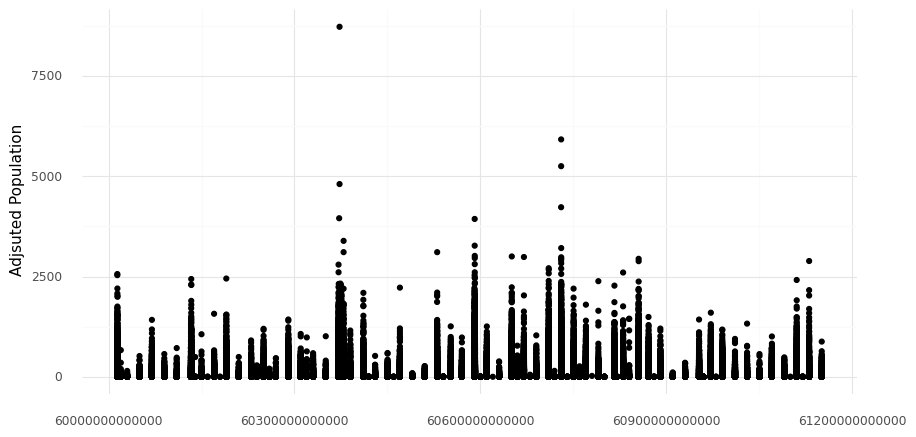

<ggplot: (393083850)>

In [60]:
(
        ggplot(df_ca10) +
            aes(x='BLOCK20', y='Population P2') +
            geom_point() +
#             geom_step() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() +
#             facet_wrap("~school_to_school") +
#             scale_y_continuous(limits = (-50, 5),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
            labs(
                title = "",
                y = "Adjsuted Population",
                x = ""
            )
            + theme(figure_size=(10, 5)) 
    )

Plotting the Difference in Population Numbers from Original to Adjusted

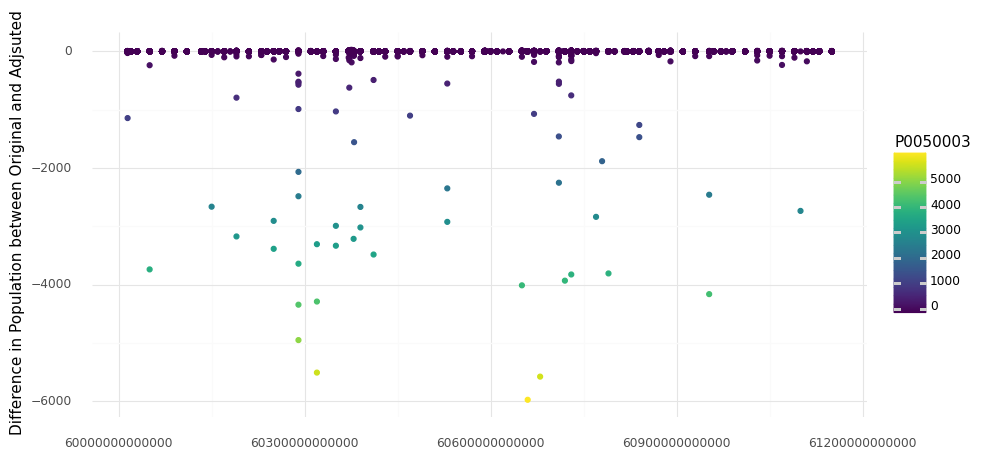

<ggplot: (774186963)>

In [61]:
(
        ggplot(df_ca10) +
            aes(x='BLOCK20', y='dif_pop', color = 'P0050003') +
            geom_point() +
#             geom_step() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() +
#             facet_wrap("~school_to_school") +
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
            labs(
                title = "",
                y = "Difference in Population between Original and Adjsuted",
                x = ""
            )
            + theme(figure_size=(10, 5)) 
    )

Note: In the plot above, significant differences between the two population counts seem to be attributed to the correctional facilities reallocation 

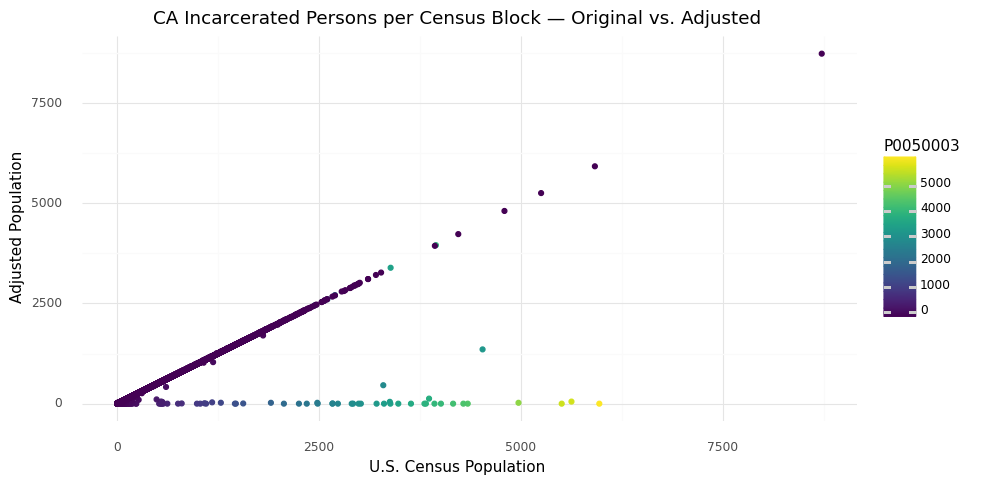

<ggplot: (818828475)>

In [62]:
(
        ggplot(df_ca10) +
            aes(x='P0020001', y='Population P2', color = 'P0050003') +
            geom_point() +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() +
#             facet_wrap("~school_to_school") +
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
            labs(
                title = "CA Incarcerated Persons per Census Block — Original vs. Adjusted",
                y = "Adjusted Population",
                x = "U.S. Census Population"
            )
            + theme(figure_size=(10, 5)) 
    )

Looking at only Correctional Facility Census Blocks

In [63]:
df_ca11 = df_ca10[df_ca10.P0050003 > 0.0].sort_values(by = 'P0050003', ascending=False)
df_ca11.head(3)

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON,dif_pop,adjpop
301620,60659810001003,65,981000,1003,5972,0,5972,0,5972,0,0,0,1475722,Block 1003,33.561347,-114.924365,-5972,0
320138,60679883001003,67,988300,1003,5627,52,5604,29,5575,0,0,0,3026457,Block 1003,38.694187,-121.156830,-5575,52
105833,60319801001004,31,980100,1004,5506,0,5506,0,5506,0,0,0,1303680,Block 1004,36.053283,-119.549993,-5506,0


In [64]:
df_ca11.head(5)

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON,dif_pop,adjpop
301620,60659810001003,65,981000,1003,5972,0,5972,0,5972,0,0,0,1475722,Block 1003,33.561347,-114.924365,-5972,0
320138,60679883001003,67,988300,1003,5627,52,5604,29,5575,0,0,0,3026457,Block 1003,38.694187,-121.156830,-5575,52
105833,60319801001004,31,980100,1004,5506,0,5506,0,5506,0,0,0,1303680,Block 1004,36.053283,-119.549993,-5506,0
90858,60290046011001,29,4601,1001,4971,22,4969,20,4949,0,0,0,2546742,Block 1001,35.783088,-119.312332,-4949,22
89751,60290043021001,29,4302,1001,4342,0,4342,0,4342,0,0,0,1211566,Block 1001,35.594172,-119.415894,-4342,0


In [65]:
df_ca11.tail(5)

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON,dif_pop,adjpop
178497,60375990002007,37,599000,2007,52,49,50,47,3,0,0,0,18582,Block 2007,33.343304,-118.327052,-3,49
125416,60372035001009,37,203500,1009,183,180,161,158,3,0,0,0,84787,Block 1009,34.049326,-118.217206,-3,180
138683,60372971101013,37,297110,1013,23,21,17,15,2,0,2,2,8591,Block 1013,33.734651,-118.280913,-2,21
383418,60730209021092,73,20902,1092,2,0,2,0,2,0,0,0,4245950,Block 1092,32.956323,-116.549999,-2,0
18523,60030100001048,3,10000,1048,1,0,1,0,1,0,0,0,75878,Block 1048,38.703436,-120.051074,-1,0


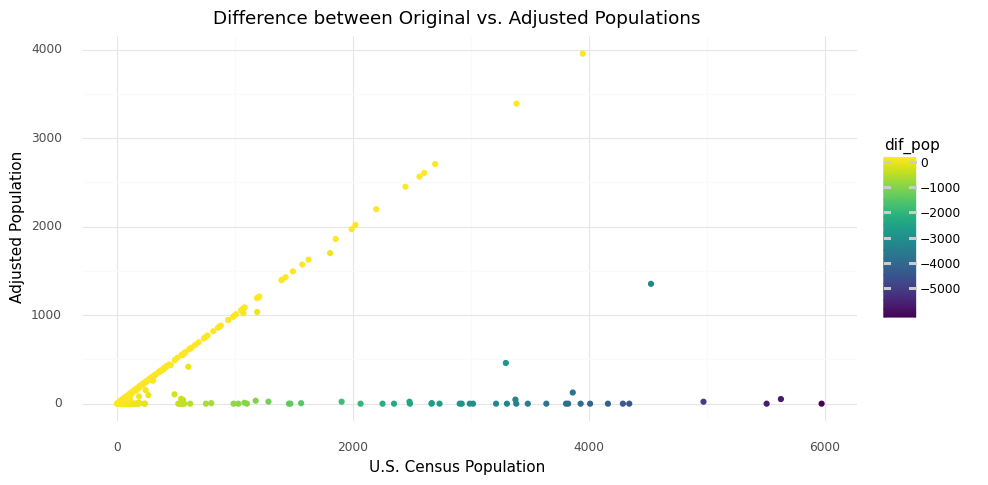

<ggplot: (815728920)>

In [66]:
(
        ggplot(df_ca11) +
            aes(x='P0020001', y='Population P2', color = 'dif_pop') +
            geom_point() +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() +
#             facet_wrap("~school_to_school") +
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
            labs(
                title = "Difference between Original vs. Adjusted Populations",
                y = "Adjusted Population",
                x = "U.S. Census Population"
            )
            + theme(figure_size=(10, 5)) 
    )

Note: This plot above indicates that for the most part either nearly the entire population of prisoners was removed in the adjusted numbers (close to zero on the y-axis) or completely unchanged (1:1 relationship). For example, for block 60659810001003, the incarcerated population is 5972 according to the census and 0 according to the adjusted numbers.  This might have to do with state vs. federal facilities? facilities being split over multiple blocks?  or mislabeled as P0050003? 

In the populations with nearly 1:1 relationships, maybe these blocks had very few prisoners? However, the P0050003 range doesn't indicate that to be the case in the plot below. With a few exceptions, it seems the census block populations are almost entirely the correctional facility populations.

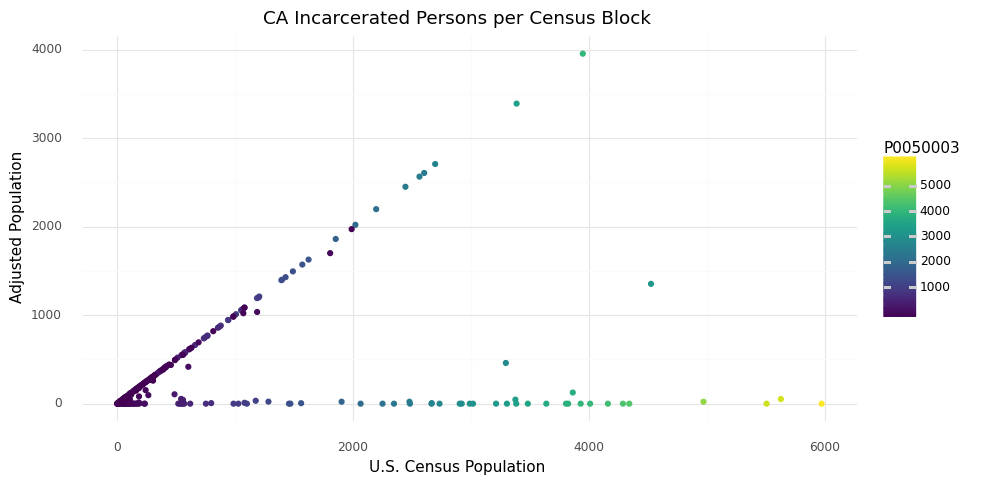

<ggplot: (832167804)>

In [67]:
(
        ggplot(df_ca11) +
            aes(x='P0020001', y='Population P2', color = 'P0050003') +
            geom_point() +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() +
#             facet_wrap("~school_to_school") +
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
            labs(
                title = "CA Incarcerated Persons per Census Block",
                y = "Adjusted Population",
                x = "U.S. Census Population"
            )
            + theme(figure_size=(10, 5)) 
    )

Looking at different locations to see if there was a clearer explanation for the distribution of data

In [68]:
df_ca11[df_ca11.BLOCK20 == 60372060201002]
#34.056916, -118.228379 on Google Maps is Twin Towers Correctional Facility, a jail in Los Angeles

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON,dif_pop,adjpop
125955,60372060201002,37,206020,1002,3948,3955,3947,3954,3941,3941,0,0,248718,Block 1002,34.056916,-118.228379,7,3955


In [69]:
# df_ca11[df_ca11.BLOCK20 == 60379202001009]
# #33.820732, -118.283563 on Google Maps is ?

In [70]:
df_ca11[df_ca11.BLOCK20 == 60375990002007]
#33.343304,-118.327052 on Google Maps is the Los Angeles County Sheriff - Avalon Station
# https://www.google.com/maps/place/33%C2%B020'35.9%22N+118%C2%B019'37.4%22W/@33.3431181,-118.3273478,19.33z/data=!4m5!3m4!1s0x0:0xc83c03a25715bd7b!8m2!3d33.343304!4d-118.327052

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON,dif_pop,adjpop
178497,60375990002007,37,599000,2007,52,49,50,47,3,0,0,0,18582,Block 2007,33.343304,-118.327052,-3,49


In [71]:
df_ca11[df_ca11.BLOCK20 == 60372971101013]
#33.734651, -118.280913 on Google Maps is what?
# https://www.google.com/maps/place/33%C2%B044'04.7%22N+118%C2%B016'51.3%22W/@33.7346367,-118.2812392,19.45z/data=!4m5!3m4!1s0x0:0x1b8bb03418a08158!8m2!3d33.734651!4d-118.280913

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON,dif_pop,adjpop
138683,60372971101013,37,297110,1013,23,21,17,15,2,0,2,2,8591,Block 1013,33.734651,-118.280913,-2,21


In [72]:
# (
#         ggplot(df_ca11) +
#             aes(x='dif_pop', y='P0050003') +
#             geom_point() +
# #             geom_step() +
# #             geom_segment(mapping = aes(col = "distance"))+
#             theme_minimal() +
# #             facet_wrap("~school_to_school") +
# #             scale_y_continuous(limits = (0, 100),
# #                 expand = (0, 0),
# #                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
# #             ) +
# #             scale_x_continuous(limits = (0, 30),
# #                 expand = (0, 0),
# #                 breaks = (0, 5, 10, 15, 20, 25, 30)
# #             ) +
#             labs(
#                 title = "",
#                 y = "",
#                 x = ""
#             )
#             + theme(figure_size=(10, 5)) 
#     )

-----

## Colorado

2020 PL 94-171 Data Summary File for Colorado based on the Decennial Census at the Block level

In [73]:
df_co1 = pd.read_csv("..//data//source//RDH-data//co_pl2020_b_csv//co_pl2020_b.csv", encoding="utf-8")
df_co1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,CO,750,0,0,0,76882,7500000US080010078011000,80010078011000,4,8,8,1779779,1,H1,198116,92622,Z5,1935531,99999,99,99999999,4000,C1,2409757,7801,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,19740,1,216,99999,99999,9,999,99999,Y,N,6,25,30,1230,A,99999,99999,2340,20912,0,1000,Block 1000,S,120,58,39.742879,-104.866410,BK,99999,80010078011000,120,110,40,24,2,11,0,33,10,9,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,56,64,63,26,24,2,11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82,72,24,24,2,3,0,19,10,9,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [74]:
df_co1_subset = df_co1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [75]:
df_co1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,CO,80010078011000,1,7801,1,1000,20912,Block 1000,39.742879,-104.866410,120,120,82,0,0,0
1,PLST,CO,80010078011001,1,7801,1,1001,20185,Block 1001,39.742879,-104.867597,156,156,120,0,0,0
2,PLST,CO,80010078011002,1,7801,1,1002,20340,Block 1002,39.742880,-104.868770,234,234,177,0,0,0
3,PLST,CO,80010078011003,1,7801,1,1003,10246,Block 1003,39.742880,-104.869658,46,46,35,0,0,0
4,PLST,CO,80010078011004,1,7801,1,1004,29991,Block 1004,39.742877,-104.870823,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140340,PLST,CO,81259632005103,125,963200,5,5103,49417,Block 5103,40.117763,-102.712670,2,2,2,0,0,0
140341,PLST,CO,81259632005104,125,963200,5,5104,1558064,Block 5104,40.111871,-102.706181,2,2,0,0,0,0
140342,PLST,CO,81259632005105,125,963200,5,5105,5376,Block 5105,40.118914,-102.720088,8,8,2,0,0,0
140343,PLST,CO,81259632005106,125,963200,5,5106,6322,Block 5106,40.118910,-102.719341,0,0,0,0,0,0


In [76]:
len(df_co1_subset)

140345

##### 2020 Redistricting Data for Colorado at the Block level (Adjusted)

From Data Hub ReadMe file: This dataset was retrieved from the Colorado Independent Redistricting Commissions website here: https://redistricting.colorado.gov/content/data 09/07/2021

In [77]:
df_co2 = pd.read_excel("..//data//source//RDH-data//co_pl2020_block_official_xlsx//2020_Block_Adj_Final.xlsx")
df_co2

,GEOID20,county_name,TOTALPOP_ADJ,HISPANIC_ADJ,NOTHISP_ADJ,NHWHITE_ADJ,NHBLACK_ADJ,NHAMERI_ADJ,NHASIAN_ADJ,NHPI_ADJ,NHOTHER_ADJ,NHMULTI_ADJ,WHITEALONE_ADJ,BLACKALONE_ADJ,AMERIALONE_ADJ,ASIANALONE_ADJ,PIALONE_ADJ,OTHERALONE_ADJ,MULTIALONE_ADJ
0,80010078011000,Adams,123,57,66,26,26,2,11,0,0,1,40,26,2,11,0,34,10
1,80010078011001,Adams,156,97,59,40,16,1,2,0,0,0,55,16,1,2,0,49,33
2,80010078011002,Adams,238,156,82,44,26,0,9,0,2,1,56,28,8,9,0,101,36
3,80010078011003,Adams,46,30,16,10,0,0,4,0,0,2,19,0,0,4,0,12,11
4,80010078011004,Adams,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140340,81259632005103,Yuma,2,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0
140341,81259632005104,Yuma,2,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
140342,81259632005105,Yuma,8,6,2,1,0,0,0,0,1,0,1,0,3,0,0,2,2
140343,81259632005106,Yuma,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
df_co2_subset = df_co2[['GEOID20', 'county_name', 'TOTALPOP_ADJ']]
df_co2_subset

,GEOID20,county_name,TOTALPOP_ADJ
0,80010078011000,Adams,123
1,80010078011001,Adams,156
2,80010078011002,Adams,238
3,80010078011003,Adams,46
4,80010078011004,Adams,0
...,...,...,...
140340,81259632005103,Yuma,2
140341,81259632005104,Yuma,2
140342,81259632005105,Yuma,8
140343,81259632005106,Yuma,0


In [79]:
len(df_co2_subset)

140345

##### Merging the Census and Adjusted Data to Compare on GEOCODE and GEOID20

GEOCODE #80010078011000 GEOID20 = # 80010078011000

In [80]:
df_co3 = pd.merge(df_co1_subset, df_co2_subset, left_on='GEOCODE', right_on='GEOID20')
df_co3

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,GEOID20,county_name,TOTALPOP_ADJ
0,PLST,CO,80010078011000,1,7801,1,1000,20912,Block 1000,39.742879,-104.866410,120,120,82,0,0,0,80010078011000,Adams,123
1,PLST,CO,80010078011001,1,7801,1,1001,20185,Block 1001,39.742879,-104.867597,156,156,120,0,0,0,80010078011001,Adams,156
2,PLST,CO,80010078011002,1,7801,1,1002,20340,Block 1002,39.742880,-104.868770,234,234,177,0,0,0,80010078011002,Adams,238
3,PLST,CO,80010078011003,1,7801,1,1003,10246,Block 1003,39.742880,-104.869658,46,46,35,0,0,0,80010078011003,Adams,46
4,PLST,CO,80010078011004,1,7801,1,1004,29991,Block 1004,39.742877,-104.870823,0,0,0,0,0,0,80010078011004,Adams,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140340,PLST,CO,81259632005103,125,963200,5,5103,49417,Block 5103,40.117763,-102.712670,2,2,2,0,0,0,81259632005103,Yuma,2
140341,PLST,CO,81259632005104,125,963200,5,5104,1558064,Block 5104,40.111871,-102.706181,2,2,0,0,0,0,81259632005104,Yuma,2
140342,PLST,CO,81259632005105,125,963200,5,5105,5376,Block 5105,40.118914,-102.720088,8,8,2,0,0,0,81259632005105,Yuma,8
140343,PLST,CO,81259632005106,125,963200,5,5106,6322,Block 5106,40.118910,-102.719341,0,0,0,0,0,0,81259632005106,Yuma,0


In [81]:
df_co3.sort_values(by = 'P0050003', ascending=False).head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,GEOID20,county_name,TOTALPOP_ADJ
65245,PLST,CO,80439802001000,43,980200,1,1000,2173673,Block 1000,38.359615,-105.097914,2532,2532,2532,2532,2532,0,80439802001000,Fremont,2532
96619,PLST,CO,80759664001238,75,966400,1,1238,631605,Block 1238,40.611755,-103.161651,2436,2436,2436,2436,2436,0,80759664001238,Logan,486
31481,PLST,CO,80259696012045,25,969601,2,2045,472181,Block 2045,38.158903,-103.956907,1776,1776,1776,1776,1776,0,80259696012045,Crowley,316
65257,PLST,CO,80439803001008,43,980300,1,1008,1717061,Block 1008,38.423025,-105.154641,1419,1419,1419,1419,1419,0,80439803001008,Fremont,106
57267,PLST,CO,80410045011014,41,4501,1,1014,320356,Block 1014,38.790120,-104.780327,1208,1208,1208,1208,1208,0,80410045011014,El Paso,1216


##### Creating Column for Differences between the Two Population Counts

In [82]:
df_co3['dif_pop'] = df_co3['TOTALPOP_ADJ'] - df_co3['P0020001']

In [83]:
df_co3['adjpop'] = df_co3['TOTALPOP_ADJ']

In [84]:
df_co3.head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,GEOID20,county_name,TOTALPOP_ADJ,dif_pop,adjpop
0,PLST,CO,80010078011000,1,7801,1,1000,20912,Block 1000,39.742879,-104.866410,120,120,82,0,0,0,80010078011000,Adams,123,3,123
1,PLST,CO,80010078011001,1,7801,1,1001,20185,Block 1001,39.742879,-104.867597,156,156,120,0,0,0,80010078011001,Adams,156,0,156
2,PLST,CO,80010078011002,1,7801,1,1002,20340,Block 1002,39.742880,-104.868770,234,234,177,0,0,0,80010078011002,Adams,238,4,238
3,PLST,CO,80010078011003,1,7801,1,1003,10246,Block 1003,39.742880,-104.869658,46,46,35,0,0,0,80010078011003,Adams,46,0,46
4,PLST,CO,80010078011004,1,7801,1,1004,29991,Block 1004,39.742877,-104.870823,0,0,0,0,0,0,80010078011004,Adams,0,0,0


In [85]:
df_co3.sort_values(by = 'TOTALPOP_ADJ', ascending=True).head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,GEOID20,county_name,TOTALPOP_ADJ,dif_pop,adjpop
65269,PLST,CO,80439803001020,43,980300,1,1020,57522,Block 1020,38.429433,-105.147304,210,210,210,210,210,0,80439803001020,Fremont,-210,-420,-210
65243,PLST,CO,80439801001002,43,980100,1,1002,109012,Block 1002,38.437664,-105.248566,564,564,564,564,564,0,80439801001002,Fremont,-165,-729,-165
115136,PLST,CO,81010003001003,101,300,1,1003,55536,Block 1003,38.283048,-104.629003,549,549,549,549,549,0,81010003001003,Pueblo,-2,-551,-2
140344,PLST,CO,81259632005107,125,963200,5,5107,13296,Block 5107,40.104688,-102.718473,0,0,0,0,0,0,81259632005107,Yuma,0,0,0
34591,PLST,CO,80310009022017,31,902,2,2017,6003,Block 2017,39.711517,-105.040287,0,0,0,0,0,0,80310009022017,Denver,0,0,0


Note: CO has negative adjusted population numbers, double check TOTALPO_ADJ is total adjusted population not the adjustement of total population

In [86]:
df_co3.sort_values(by = 'dif_pop', ascending=True)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,GEOID20,county_name,TOTALPOP_ADJ,dif_pop,adjpop
96619,PLST,CO,80759664001238,75,966400,1,1238,631605,Block 1238,40.611755,-103.161651,2436,2436,2436,2436,2436,0,80759664001238,Logan,486,-1950,486
31481,PLST,CO,80259696012045,25,969601,2,2045,472181,Block 2045,38.158903,-103.956907,1776,1776,1776,1776,1776,0,80259696012045,Crowley,316,-1460,316
65257,PLST,CO,80439803001008,43,980300,1,1008,1717061,Block 1008,38.423025,-105.154641,1419,1419,1419,1419,1419,0,80439803001008,Fremont,106,-1313,106
18716,PLST,CO,80119667011031,11,966701,1,1031,502018,Block 1031,38.064394,-103.197027,1224,1224,1212,1202,1202,0,80119667011031,Bent,73,-1151,73
27389,PLST,CO,80150004021064,15,402,1,1064,212354,Block 1064,38.817104,-106.118779,1190,1190,1190,1190,1190,0,80150004021064,Chaffee,188,-1002,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77011,PLST,CO,80590114022001,59,11402,2,2001,355236,Block 2001,39.743599,-105.069213,1202,1202,1080,210,210,0,80590114022001,Jefferson,1226,24,1226
53745,PLST,CO,80410023002008,41,2300,2,2008,559007,Block 2008,38.824765,-104.833198,352,352,335,286,0,0,80410023002008,El Paso,379,27,379
51906,PLST,CO,80410003022014,41,302,2,2014,330449,Block 2014,38.892398,-104.821223,311,311,294,207,207,0,80410003022014,El Paso,339,28,339
87355,PLST,CO,80690016051005,69,1605,1,1005,402064,Block 1005,40.559750,-105.029578,743,743,743,743,743,0,80690016051005,Larimer,775,32,775


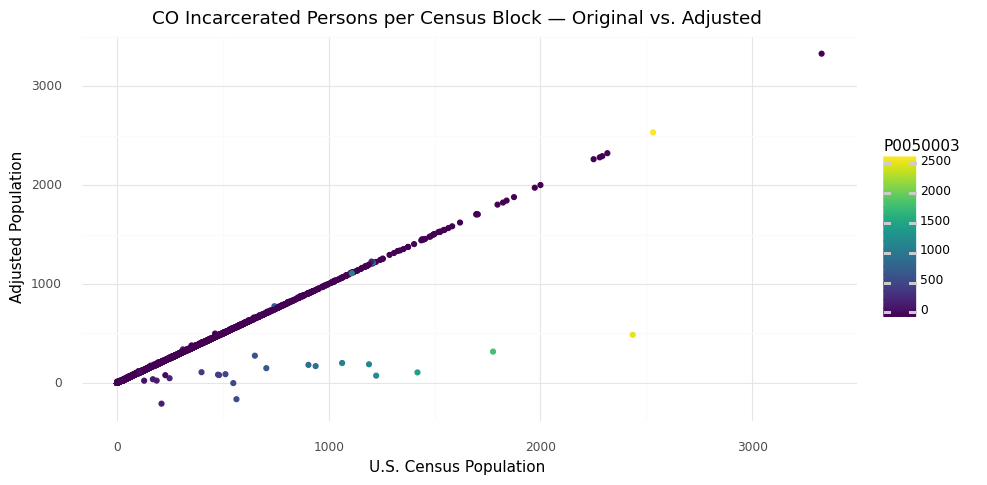

<ggplot: (774000493)>

In [87]:
(
        ggplot(df_co3) +
            aes(x='P0020001', y='TOTALPOP_ADJ', color = 'P0050003') +
            geom_point() +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() +
#             facet_wrap("~school_to_school") +
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
            labs(
                title = "CO Incarcerated Persons per Census Block — Original vs. Adjusted",
                y = "Adjusted Population",
                x = "U.S. Census Population"
            )
            + theme(figure_size=(10, 5)) 
    )

-----

## Connecticut

##### 2020 PL 94-171 Data Summary File for Connecticut based on the Decennial Census at the Block level

In [88]:
df_ct1 = pd.read_csv("..//data//source//RDH-data//ct_pl2020_b_csv//ct_pl2020_b.csv", encoding="utf-8")
df_ct1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,CT,750,0,0,0,28700,7500000US090010101011000,90010101011000,1,1,9,1779780,1,H4,212794,33620,T1,213435,99999,99,99999999,99999,99,99999999,10101,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,14860,1,408,99999,71950,1,720,99999,9,9,4,36,149,01-086,A,99999,99999,1710,123621,0,1000,Block 1000,S,27,6,41.125774,-73.671811,BK,99999,90010101011000,27,26,19,0,0,7,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,2,25,24,17,0,0,7,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,23,16,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [89]:
df_ct1_subset = df_ct1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [90]:
df_ct1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,CT,90010101011000,1,10101,1,1000,123621,Block 1000,41.125774,-73.671811,27,27,23,0,0,0
1,PLST,CT,90010101011001,1,10101,1,1001,2032541,Block 1001,41.115624,-73.674234,198,198,149,0,0,0
2,PLST,CT,90010101011002,1,10101,1,1002,1227724,Block 1002,41.108930,-73.686944,18,18,12,0,0,0
3,PLST,CT,90010101011003,1,10101,1,1003,0,Block 1003,41.102775,-73.687737,0,0,0,0,0,0
4,PLST,CT,90010101011004,1,10101,1,1004,44607,Block 1004,41.118728,-73.687386,4,4,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49921,PLST,CT,90159081004020,15,908100,4,4020,1900858,Block 4020,41.647144,-71.829542,19,19,16,0,0,0
49922,PLST,CT,90159081004021,15,908100,4,4021,1821440,Block 4021,41.654490,-71.840982,21,21,16,0,0,0
49923,PLST,CT,90159081004022,15,908100,4,4022,952584,Block 4022,41.643932,-71.805859,18,18,14,0,0,0
49924,PLST,CT,90159081004023,15,908100,4,4023,60732,Block 4023,41.642759,-71.818108,0,0,0,0,0,0


In [91]:
len(df_ct1_subset)

49926

In [92]:
df_ct1_subset.dtypes

FILEID       object
STUSAB       object
GEOCODE       int64
COUNTY        int64
TRACT         int64
BLKGRP        int64
BLOCK         int64
AREALAND      int64
NAME         object
INTPTLAT    float64
INTPTLON    float64
P0010001      int64
P0020001      int64
P0030001      int64
P0050001      int64
P0050003      int64
P0050004      int64
dtype: object

##### 2020 Redistricting Data for Connecticut at the Block level (Adjusted)

This dataset was retrieved from Connecticut Open Data and was created by the Connecticut Office of Policy and Management (OPM).
Data was retrieved as a CSV and SHP from this link 12/07/2021: https://data.ct.gov/Government/2020-U-S-Census-Block-Adjustments/bary-ntej/

In [93]:
df_ct2 = pd.read_csv("..//data//source//RDH-data//ct_pl2020_block_adjusted_official_csv//2020_U.S._Census_Block_Adjustments.csv", encoding="utf-8")
df_ct2

,Town,GEOID20,P0030001 - Original,P0030001 - Adjusted,P0030001 - Difference,Geometry
0,Waterford,090116936002019,30.0,30,0,"MULTIPOLYGON (((-72.105846 41.386962, -72.1058..."
1,Groton,090117024001008,116.0,116,0,"MULTIPOLYGON (((-72.069659 41.354029, -72.0695..."
2,Stonington,090117054003006,0.0,0,0,"MULTIPOLYGON (((-71.950692 41.424591, -71.9503..."
3,East Lyme,090118707042013,6.0,6,0,"MULTIPOLYGON (((-72.211258 41.288347, -72.2106..."
4,Waterford,090116933002017,608.0,609,1,"MULTIPOLYGON (((-72.176773 41.35034100000001, ..."
...,...,...,...,...,...,...
49922,Windsor Locks,090034761003022,57.0,57,0,"MULTIPOLYGON (((-72.635677 41.942209999999996,..."
49923,South Windsor,090034871004020,28.0,29,1,"MULTIPOLYGON (((-72.55839499999999 41.858982, ..."
49924,South Windsor,090034871002006,37.0,37,0,"MULTIPOLYGON (((-72.54310699999999 41.838604, ..."
49925,Bristol,090034055002011,42.0,42,0,"MULTIPOLYGON (((-72.96579 41.654653, -72.96554..."


Removing last row (Population Totals) to match Census' number of rows at 49926

In [94]:
df_ct2_subset = df_ct2[:-1]

In [95]:
df_ct2_subset.tail()

,Town,GEOID20,P0030001 - Original,P0030001 - Adjusted,P0030001 - Difference,Geometry
49921,Simsbury,090034661021014,36.0,36,0,"MULTIPOLYGON (((-72.85911 41.818599, -72.85895..."
49922,Windsor Locks,090034761003022,57.0,57,0,"MULTIPOLYGON (((-72.635677 41.942209999999996,..."
49923,South Windsor,090034871004020,28.0,29,1,"MULTIPOLYGON (((-72.55839499999999 41.858982, ..."
49924,South Windsor,090034871002006,37.0,37,0,"MULTIPOLYGON (((-72.54310699999999 41.838604, ..."
49925,Bristol,090034055002011,42.0,42,0,"MULTIPOLYGON (((-72.96579 41.654653, -72.96554..."


Checking to make sure the data types are the same to join between the two datasets

In [96]:
df_ct2_subset.dtypes

Town                      object
GEOID20                   object
P0030001 - Original      float64
P0030001 - Adjusted        int64
P0030001 - Difference      int64
Geometry                  object
dtype: object

Converting GEOID20 to Integer to match Census data

In [97]:
df_ct2_subset['GEOID20'] = df_ct2_subset['GEOID20'].astype(str).astype(int)

In [98]:
df_ct2_subset['P0030001 - Original'] = df_ct2_subset['P0030001 - Original'].astype(int)

In [99]:
df_ct2_subset.head(3)

,Town,GEOID20,P0030001 - Original,P0030001 - Adjusted,P0030001 - Difference,Geometry
0,Waterford,90116936002019,30,30,0,"MULTIPOLYGON (((-72.105846 41.386962, -72.1058..."
1,Groton,90117024001008,116,116,0,"MULTIPOLYGON (((-72.069659 41.354029, -72.0695..."
2,Stonington,90117054003006,0,0,0,"MULTIPOLYGON (((-71.950692 41.424591, -71.9503..."


##### Merging the two datasets on GEOCODE and GEOID20

In [100]:
df_ct3 = pd.merge(df_ct1_subset, df_ct2_subset, left_on='GEOCODE', right_on='GEOID20')
df_ct3

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,Town,GEOID20,P0030001 - Original,P0030001 - Adjusted,P0030001 - Difference,Geometry
0,PLST,CT,90010101011000,1,10101,1,1000,123621,Block 1000,41.125774,-73.671811,27,27,23,0,0,0,Greenwich,90010101011000,23,23,0,"MULTIPOLYGON (((-73.676417 41.124666999999995,..."
1,PLST,CT,90010101011001,1,10101,1,1001,2032541,Block 1001,41.115624,-73.674234,198,198,149,0,0,0,Greenwich,90010101011001,149,149,0,"MULTIPOLYGON (((-73.68428999999999 41.110071, ..."
2,PLST,CT,90010101011002,1,10101,1,1002,1227724,Block 1002,41.108930,-73.686944,18,18,12,0,0,0,Greenwich,90010101011002,12,13,1,"MULTIPOLYGON (((-73.693623 41.10838, -73.69349..."
3,PLST,CT,90010101011003,1,10101,1,1003,0,Block 1003,41.102775,-73.687737,0,0,0,0,0,0,Greenwich,90010101011003,0,0,0,"MULTIPOLYGON (((-73.688283 41.102379, -73.6882..."
4,PLST,CT,90010101011004,1,10101,1,1004,44607,Block 1004,41.118728,-73.687386,4,4,2,0,0,0,Greenwich,90010101011004,2,2,0,"MULTIPOLYGON (((-73.68926499999999 41.118594, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49921,PLST,CT,90159081004020,15,908100,4,4020,1900858,Block 4020,41.647144,-71.829542,19,19,16,0,0,0,Sterling,90159081004020,16,16,0,"MULTIPOLYGON (((-71.847292 41.645742999999996,..."
49922,PLST,CT,90159081004021,15,908100,4,4021,1821440,Block 4021,41.654490,-71.840982,21,21,16,0,0,0,Sterling,90159081004021,16,16,0,"MULTIPOLYGON (((-71.84796 41.653102, -71.84793..."
49923,PLST,CT,90159081004022,15,908100,4,4022,952584,Block 4022,41.643932,-71.805859,18,18,14,0,0,0,Sterling,90159081004022,14,14,0,"MULTIPOLYGON (((-71.818401 41.644535, -71.8183..."
49924,PLST,CT,90159081004023,15,908100,4,4023,60732,Block 4023,41.642759,-71.818108,0,0,0,0,0,0,Sterling,90159081004023,0,0,0,"MULTIPOLYGON (((-71.82012999999999 41.641906, ..."


##### Creating Column for Differences between the Population Counts of Incarcerated Populations (not overall population)

In [101]:
df_ct3['dif_cf'] = df_ct3['P0030001 - Adjusted'] - df_ct3['P0030001 - Original']

In [102]:
df_ct3['adjpop'] = df_ct3['P0030001 - Adjusted']

In [103]:
df_ct3.head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,Town,GEOID20,P0030001 - Original,P0030001 - Adjusted,P0030001 - Difference,Geometry,dif_cf,adjpop
0,PLST,CT,90010101011000,1,10101,1,1000,123621,Block 1000,41.125774,-73.671811,27,27,23,0,0,0,Greenwich,90010101011000,23,23,0,"MULTIPOLYGON (((-73.676417 41.124666999999995,...",0,23
1,PLST,CT,90010101011001,1,10101,1,1001,2032541,Block 1001,41.115624,-73.674234,198,198,149,0,0,0,Greenwich,90010101011001,149,149,0,"MULTIPOLYGON (((-73.68428999999999 41.110071, ...",0,149
2,PLST,CT,90010101011002,1,10101,1,1002,1227724,Block 1002,41.108930,-73.686944,18,18,12,0,0,0,Greenwich,90010101011002,12,13,1,"MULTIPOLYGON (((-73.693623 41.10838, -73.69349...",1,13
3,PLST,CT,90010101011003,1,10101,1,1003,0,Block 1003,41.102775,-73.687737,0,0,0,0,0,0,Greenwich,90010101011003,0,0,0,"MULTIPOLYGON (((-73.688283 41.102379, -73.6882...",0,0
4,PLST,CT,90010101011004,1,10101,1,1004,44607,Block 1004,41.118728,-73.687386,4,4,2,0,0,0,Greenwich,90010101011004,2,2,0,"MULTIPOLYGON (((-73.68926499999999 41.118594, ...",0,2


In [104]:
df_ct3.sort_values(by = 'P0030001 - Adjusted', ascending=True).head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,Town,GEOID20,P0030001 - Original,P0030001 - Adjusted,P0030001 - Difference,Geometry,dif_cf,adjpop
36822,PLST,CT,90093431012032,9,343101,2,2032,629694,Block 2032,41.527147,-72.905282,9,9,0,9,0,9,Cheshire,90093431012032,0,-9,-9,"MULTIPOLYGON (((-72.90878 41.528935, -72.90822...",-9,-9
36827,PLST,CT,90093431012037,9,343101,2,2037,14569,Block 2037,41.523266,-72.897072,1141,1141,1140,1141,1141,0,Cheshire,90093431012037,1140,-1,-1141,"MULTIPOLYGON (((-72.897423 41.524088, -72.8964...",-1141,-1
36825,PLST,CT,90093431012035,9,343101,2,2035,223096,Block 2035,41.524695,-72.902723,6,6,5,6,6,0,Cheshire,90093431012035,5,-1,-6,"MULTIPOLYGON (((-72.906519 41.526137, -72.9060...",-6,-1
24293,PLST,CT,90053101001013,5,310100,1,1013,6323,Block 1013,41.806990,-73.112188,0,0,0,0,0,0,Torrington,90053101001013,0,0,0,"MULTIPOLYGON (((-73.112709 41.807368, -73.1115...",0,0
13349,PLST,CT,90034302031006,3,430203,1,1006,293707,Block 1006,41.588494,-72.862728,0,0,0,0,0,0,Southington,90034302031006,0,0,0,"MULTIPOLYGON (((-72.866349 41.588007, -72.8656...",0,0


Note: Connecticut has negative adjusted population numbers

In [105]:
df_ct3.sort_values(by = 'dif_cf', ascending=True)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,Town,GEOID20,P0030001 - Original,P0030001 - Adjusted,P0030001 - Difference,Geometry,dif_cf,adjpop
16065,PLST,CT,90034771032003,3,477103,2,2003,1324616,Block 2003,42.001042,-72.622808,2112,2112,2058,1864,1864,0,Suffield,90034771032003,2058,194,-1864,"MULTIPOLYGON (((-72.634294 41.999682, -72.6339...",-1864,194
36827,PLST,CT,90093431012037,9,343101,2,2037,14569,Block 2037,41.523266,-72.897072,1141,1141,1140,1141,1141,0,Cheshire,90093431012037,1140,-1,-1141,"MULTIPOLYGON (((-72.897423 41.524088, -72.8964...",-1141,-1
44547,PLST,CT,90118705022001,11,870502,2,2001,291029,Block 2001,41.453833,-72.111841,1137,1137,1137,1137,1137,0,Montville,90118705022001,1137,2,-1135,"MULTIPOLYGON (((-72.115371 41.45649, -72.11501...",-1135,2
45954,PLST,CT,90135381001000,13,538100,1,1000,622153,Block 1000,42.022944,-72.497033,1125,1125,1125,1125,1125,0,Somers,90135381001000,1125,0,-1125,"MULTIPOLYGON (((-72.502329 42.021912, -72.5023...",-1125,0
9559,PLST,CT,90012111001001,1,211100,1,1001,806706,Block 1001,41.436526,-73.466661,1057,1057,1057,1057,1057,0,Danbury,90012111001001,1057,0,-1057,"MULTIPOLYGON (((-73.471715 41.437708, -73.4717...",-1057,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18896,PLST,CT,90035001001001,3,500100,1,1001,37829,Block 1001,41.745433,-72.682242,534,534,389,0,0,0,Hartford,90035001001001,389,404,15,"MULTIPOLYGON (((-72.68316899999999 41.746536, ...",15,404
39078,PLST,CT,90093523002018,9,352300,2,2018,290155,Block 2018,41.564943,-73.052377,630,630,439,0,0,0,Waterbury,90093523002018,439,454,15,"MULTIPOLYGON (((-73.054014 41.568712999999995,...",15,454
30592,PLST,CT,90091421001021,9,142100,1,1021,91049,Block 1021,41.309902,-72.912679,198,198,122,0,0,0,New Haven,90091421001021,122,138,16,MULTIPOLYGON (((-72.91443400000001 41.31009299...,16,138
44360,PLST,CT,90118703001005,11,870300,1,1005,70498,Block 1005,41.362234,-72.100100,337,337,202,27,0,0,New London,90118703001005,202,219,17,"MULTIPOLYGON (((-72.103037 41.363808999999996,...",17,219


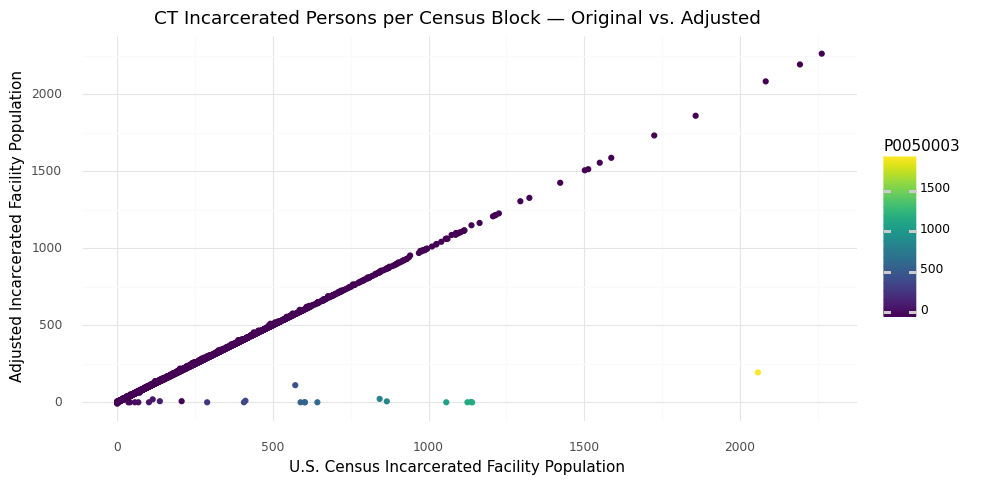

<ggplot: (363482881)>

In [106]:
(
        ggplot(df_ct3) +
            aes(x='P0030001 - Original', y='P0030001 - Adjusted', color = 'P0050003') +
            geom_point() +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() +
#             facet_wrap("~school_to_school") +
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
            labs(
                title = "CT Incarcerated Persons per Census Block — Original vs. Adjusted",
                y = "Adjusted Incarcerated Facility Population",
                x = "U.S. Census Incarcerated Facility Population"
            )
            + theme(figure_size=(10, 5)) 
    )

-----

## Delaware

##### 2020 PL 94-171 Data Summary File for Delaware based on the Decennial Census at the Block level

In [107]:
df_de1 = pd.read_csv("..//data//source//RDH-data//de_pl2020_b_csv//de_pl2020_b.csv", encoding="utf-8")
df_de1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,DE,750,0,0,0,11801,7500000US100010401001000,100010401001000,3,5,10,1779781,1,H1,217271,91480,Z5,1935611,99999,99,99999999,99999,99,99999999,40100,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,20100,1,428,99999,99999,9,999,99999,9,9,0,15,11,001-29,A,99999,99999,1620,748145,0,1000,Block 1000,S,108,41,39.234945,-75.641135,BK,99999,100010401001000,108,100,98,0,0,0,1,1,8,8,4,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108,2,106,100,98,0,0,0,1,1,6,6,2,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,79,79,0,0,0,0,0,4,4,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [108]:
df_de1_subset = df_de1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [109]:
df_de1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,DE,100010401001000,1,40100,1,1000,748145,Block 1000,39.234945,-75.641135,108,108,83,0,0,0
1,PLST,DE,100010401001001,1,40100,1,1001,1002562,Block 1001,39.231143,-75.653046,44,44,33,0,0,0
2,PLST,DE,100010401001002,1,40100,1,1002,3607081,Block 1002,39.239786,-75.667161,74,74,58,0,0,0
3,PLST,DE,100010401001003,1,40100,1,1003,1960053,Block 1003,39.237200,-75.687332,60,60,53,0,0,0
4,PLST,DE,100010401001004,1,40100,1,1004,2668506,Block 1004,39.231823,-75.708649,12,12,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20193,PLST,DE,100059900000006,5,990000,0,6,0,Block 0006,38.829630,-75.077357,0,0,0,0,0,0
20194,PLST,DE,100059900000007,5,990000,0,7,0,Block 0007,38.791853,-75.053006,0,0,0,0,0,0
20195,PLST,DE,100059900000008,5,990000,0,8,0,Block 0008,38.737455,-75.038188,0,0,0,0,0,0
20196,PLST,DE,100059900000009,5,990000,0,9,0,Block 0009,38.664626,-75.033165,0,0,0,0,0,0


In [110]:
len(df_de1_subset)

20198

##### 2020 Redistricting Data for Delaware at the Block level (Adjusted)

From Data Hub ReadMe file: This dataset was retrieved via personal communication with the Delaware Legislature. The RDH retrieved the data from the source listed and did not modify any of the data. 01/10/2021

In [111]:
df_de2 = pd.read_excel("..//data//source//RDH-data//de_pl2020_b_official_xlsx//Census_Block_Breakdown_by_District_Senate.xlsx")
df_de2

,State,Proposed 2022_SD,County,Tract,BlockGroup,Block,Adj_Population
0,10,1,10003,10003000200,100030002001,100030002001000,41
1,10,1,10003,10003000200,100030002001,100030002001001,25
2,10,1,10003,10003000200,100030002001,100030002001002,13
3,10,1,10003,10003000200,100030002001,100030002001003,0
4,10,1,10003,10003000200,100030002001,100030002001004,20
...,...,...,...,...,...,...,...
20193,10,21,10005,10005051900,100050519003,100050519003057,12
20194,10,21,10005,10005051900,100050519003,100050519003058,16
20195,10,21,10005,10005051900,100050519003,100050519003059,23
20196,10,21,10005,10005051900,100050519003,100050519003060,25


##### Merging the two datasets on GEOCODE and Block

GEOCODE #100010401001000 Block = # 100030002001000	

In [112]:
df_de3 = pd.merge(df_de1_subset, df_de2, left_on='GEOCODE', right_on='Block')
df_de3

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,State,Proposed 2022_SD,County,Tract,BlockGroup,Block,Adj_Population
0,PLST,DE,100010401001000,1,40100,1,1000,748145,Block 1000,39.234945,-75.641135,108,108,83,0,0,0,10,15,10001,10001040100,100010401001,100010401001000,109
1,PLST,DE,100010401001001,1,40100,1,1001,1002562,Block 1001,39.231143,-75.653046,44,44,33,0,0,0,10,15,10001,10001040100,100010401001,100010401001001,44
2,PLST,DE,100010401001002,1,40100,1,1002,3607081,Block 1002,39.239786,-75.667161,74,74,58,0,0,0,10,15,10001,10001040100,100010401001,100010401001002,74
3,PLST,DE,100010401001003,1,40100,1,1003,1960053,Block 1003,39.237200,-75.687332,60,60,53,0,0,0,10,15,10001,10001040100,100010401001,100010401001003,60
4,PLST,DE,100010401001004,1,40100,1,1004,2668506,Block 1004,39.231823,-75.708649,12,12,9,0,0,0,10,15,10001,10001040100,100010401001,100010401001004,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20193,PLST,DE,100059900000006,5,990000,0,6,0,Block 0006,38.829630,-75.077357,0,0,0,0,0,0,10,6,10005,10005990000,100059900000,100059900000006,0
20194,PLST,DE,100059900000007,5,990000,0,7,0,Block 0007,38.791853,-75.053006,0,0,0,0,0,0,10,6,10005,10005990000,100059900000,100059900000007,0
20195,PLST,DE,100059900000008,5,990000,0,8,0,Block 0008,38.737455,-75.038188,0,0,0,0,0,0,10,6,10005,10005990000,100059900000,100059900000008,0
20196,PLST,DE,100059900000009,5,990000,0,9,0,Block 0009,38.664626,-75.033165,0,0,0,0,0,0,10,6,10005,10005990000,100059900000,100059900000009,0


##### Creating Column for Differences between the Two Population Counts

In [113]:
df_de3['dif_pop'] = df_de3['Adj_Population'] - df_de3['P0020001']

In [114]:
df_de3['adjpop'] = df_de3['Adj_Population']

In [115]:
df_de3.head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,State,Proposed 2022_SD,County,Tract,BlockGroup,Block,Adj_Population,dif_pop,adjpop
0,PLST,DE,100010401001000,1,40100,1,1000,748145,Block 1000,39.234945,-75.641135,108,108,83,0,0,0,10,15,10001,10001040100,100010401001,100010401001000,109,1,109
1,PLST,DE,100010401001001,1,40100,1,1001,1002562,Block 1001,39.231143,-75.653046,44,44,33,0,0,0,10,15,10001,10001040100,100010401001,100010401001001,44,0,44
2,PLST,DE,100010401001002,1,40100,1,1002,3607081,Block 1002,39.239786,-75.667161,74,74,58,0,0,0,10,15,10001,10001040100,100010401001,100010401001002,74,0,74
3,PLST,DE,100010401001003,1,40100,1,1003,1960053,Block 1003,39.237200,-75.687332,60,60,53,0,0,0,10,15,10001,10001040100,100010401001,100010401001003,60,0,60
4,PLST,DE,100010401001004,1,40100,1,1004,2668506,Block 1004,39.231823,-75.708649,12,12,9,0,0,0,10,15,10001,10001040100,100010401001,100010401001004,12,0,12


In [116]:
df_de3.sort_values(by = 'Adj_Population', ascending=True).head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,State,Proposed 2022_SD,County,Tract,BlockGroup,Block,Adj_Population,dif_pop,adjpop
10098,PLST,DE,100030148111023,3,14811,1,1023,306989,Block 1023,39.539220,-75.776385,0,0,0,0,0,0,10,10,10003,10003014811,100030148111,100030148111023,0,0,0
9209,PLST,DE,100030142001034,3,14200,1,1034,8974,Block 1034,39.684491,-75.710387,0,0,0,0,0,0,10,9,10003,10003014200,100030142001,100030142001034,0,0,0
9198,PLST,DE,100030142001023,3,14200,1,1023,9702,Block 1023,39.691208,-75.727038,0,0,0,0,0,0,10,8,10003,10003014200,100030142001,100030142001023,0,0,0
9195,PLST,DE,100030142001020,3,14200,1,1020,6510,Block 1020,39.685721,-75.704139,0,0,0,0,0,0,10,9,10003,10003014200,100030142001,100030142001020,0,0,0
9194,PLST,DE,100030142001019,3,14200,1,1019,49810,Block 1019,39.686261,-75.704760,0,0,0,0,0,0,10,9,10003,10003014200,100030142001,100030142001019,0,0,0


Note: Delaware doesn't seem to have negative adjusted population

In [117]:
df_de3.sort_values(by = 'dif_pop', ascending=True)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,State,Proposed 2022_SD,County,Tract,BlockGroup,Block,Adj_Population,dif_pop,adjpop
12782,PLST,DE,100030169041048,3,16904,1,1048,1879292,Block 1048,39.331412,-75.598269,1653,1653,1652,1653,1653,0,10,14,10003,10003016904,100030169041,100030169041048,233,-1420,233
5595,PLST,DE,100030030021024,3,3002,1,1024,56068,Block 1024,39.741304,-75.529795,1281,1281,1278,1281,1281,0,10,2,10003,10003003002,100030030021,100030030021024,86,-1195,86
15147,PLST,DE,100050505051048,5,50505,1,1048,81438,Block 1048,38.660030,-75.370224,1024,1024,1020,1024,1024,0,10,19,10005,10005050505,100050505051,100050505051048,76,-948,76
10708,PLST,DE,100030152005020,3,15200,5,5020,70792,Block 5020,39.703800,-75.581286,305,305,303,305,305,0,10,3,10003,10003015200,100030152005,100030152005020,75,-230,75
15152,PLST,DE,100050505051053,5,50505,1,1053,23033,Block 1053,38.657201,-75.368499,188,188,188,188,188,0,10,19,10005,10005050505,100050505051,100050505051053,92,-96,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,PLST,DE,100010422052021,1,42205,2,2021,752229,Block 2021,39.066098,-75.544212,364,364,261,0,0,0,10,16,10001,10001042205,100010422052,100010422052021,375,11,375
14731,PLST,DE,100050504081005,5,50408,1,1005,2933625,Block 1005,38.656131,-75.539040,441,441,326,0,0,0,10,19,10005,10005050408,100050504081,100050504081005,452,11,452
1055,PLST,DE,100010410001021,1,41000,1,1021,315002,Block 1021,39.171079,-75.506658,640,640,409,0,0,0,10,17,10001,10001041000,100010410001,100010410001021,652,12,652
10287,PLST,DE,100030149035001,3,14903,5,5001,160715,Block 5001,39.626743,-75.691397,782,782,526,0,0,0,10,11,10003,10003014903,100030149035,100030149035001,794,12,794


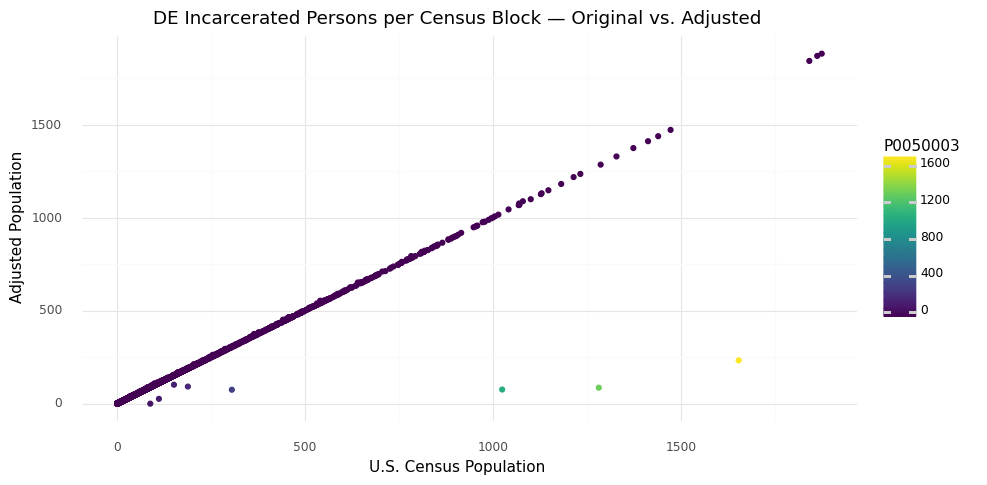

<ggplot: (803313968)>

In [118]:
(
        ggplot(df_de3) +
            aes(x='P0020001', y='Adj_Population', color = 'P0050003') +
            geom_point() +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() +
#             facet_wrap("~school_to_school") +
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
            labs(
                title = "DE Incarcerated Persons per Census Block — Original vs. Adjusted",
                y = "Adjusted Population",
                x = "U.S. Census Population"
            )
            + theme(figure_size=(10, 5)) 
    )

-----

## Maryland

##### 2020 PL 94-171 Data Summary File for Maryland based on the Decennial Census at the Block level

In [119]:
df_md1 = pd.read_csv("..//data//source//RDH-data//md_pl2020_b_csv//md_pl2020_b.csv", encoding="utf-8")
df_md1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,MD,750,0,0,0,60868,7500000US240010001001000,240010001001000,3,5,24,1714934,1,H1,1713506,90004,Z1,1929423,99999,99,99999999,99999,99,99999999,100,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,19060,1,999,99999,99999,9,999,99999,9,9,6,1,01C,01-000,A,99999,99999,30,3090730,49205,1000,Block 1000,S,31,19,39.713167,-78.345207,BK,99999,240010001001000,31,31,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,0,31,31,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,27,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [120]:
df_md1_subset = df_md1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [121]:
df_md1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,MD,240010001001000,1,100,1,1000,3090730,Block 1000,39.713167,-78.345207,31,31,27,0,0,0
1,PLST,MD,240010001001001,1,100,1,1001,225351,Block 1001,39.708005,-78.354779,4,4,2,0,0,0
2,PLST,MD,240010001001002,1,100,1,1002,5453,Block 1002,39.710110,-78.352735,4,4,4,0,0,0
3,PLST,MD,240010001001003,1,100,1,1003,271971,Block 1003,39.720429,-78.358480,0,0,0,0,0,0
4,PLST,MD,240010001001004,1,100,1,1004,346036,Block 1004,39.719918,-78.365987,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83822,PLST,MD,245102806003025,510,280600,3,3025,4244,Block 3025,39.289470,-76.637864,111,111,111,111,0,0
83823,PLST,MD,245102806003026,510,280600,3,3026,3837,Block 3026,39.288869,-76.637835,7,7,6,0,0,0
83824,PLST,MD,245102806003027,510,280600,3,3027,4004,Block 3027,39.288892,-76.637129,0,0,0,0,0,0
83825,PLST,MD,245102806003028,510,280600,3,3028,4067,Block 3028,39.288923,-76.636396,0,0,0,0,0,0


In [122]:
len(df_md1_subset)

83827

##### 2020 Redistricting Data for Maryland at the Block Level (Adjusted)

From Data Hub ReadMe file: This dataset was retrieved from the Maryland Citizens Redistricting Commission at https://redistricting.maryland.gov/Pages/data.aspx 09/09/2021

In [123]:
df_md2 = pd.read_csv("..//data//source//RDH-data//md_pl2020_block_official_csv//Block.csv", encoding="utf-8")
df_md2

,OID_,Block,BlockGroup,Tract,County,State,VTD,Adj_Population,Adj_Hispanic_Origin,Adj_NH_Wht,Adj_NH_Blk,Adj_NH_Ind,Adj_NH_Asn,Adj_NH_Hwn,Adj_NH_Oth,Adj_NH_2__Races,Adj_18__Pop,Adj_H18__Pop,Adj_NH18__Wht,Adj_NH18__Blk,Adj_NH18__Ind,Adj_NH18__Asn,Adj_NH18__Hwn,Adj_NH18__Oth,Adj_NH18__2_Races,Shape_Length,Shape_Area
0,1,240479514002073,240479514002,24047951400,24047,24,2404704-001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.256035,7.494290e-05
1,2,240479514001005,240479514001,24047951400,24047,24,2404702-001,4,0,4,0,0,0,0,0,0,4,0,4,0,0,0,0,0,0,0.069210,1.873535e-04
2,3,240479514001000,240479514001,24047951400,24047,24,2404702-001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.156886,3.687426e-05
3,4,240479514002058,240479514002,24047951400,24047,24,2404704-001,31,2,29,0,0,0,0,0,0,30,2,28,0,0,0,0,0,0,0.278947,1.309177e-03
4,5,240479514001023,240479514001,24047951400,24047,24,2404701-001,18,1,13,3,0,0,0,0,1,15,0,11,3,0,0,0,0,1,0.087589,2.954912e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83822,83823,240479503002034,240479503002,24047950300,24047,24,2404707-001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.005824,1.920966e-06
83823,83824,240479503002027,240479503002,24047950300,24047,24,2404707-001,27,0,25,0,0,0,0,0,2,24,0,23,0,0,0,0,0,1,0.009312,2.454593e-06
83824,83825,240479501003005,240479501003,24047950100,24047,24,2404707-001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.014748,6.803995e-06
83825,83826,240479503001027,240479503001,24047950300,24047,24,2404707-001,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.003903,9.527050e-07


In [124]:
df_md2_subset = df_md2[['Block', 'BlockGroup', 'Tract', 'County', 'State', 'VTD', 'Adj_Population']]

In [125]:
df_md2_subset

,Block,BlockGroup,Tract,County,State,VTD,Adj_Population
0,240479514002073,240479514002,24047951400,24047,24,2404704-001,0
1,240479514001005,240479514001,24047951400,24047,24,2404702-001,4
2,240479514001000,240479514001,24047951400,24047,24,2404702-001,0
3,240479514002058,240479514002,24047951400,24047,24,2404704-001,31
4,240479514001023,240479514001,24047951400,24047,24,2404701-001,18
...,...,...,...,...,...,...,...
83822,240479503002034,240479503002,24047950300,24047,24,2404707-001,0
83823,240479503002027,240479503002,24047950300,24047,24,2404707-001,27
83824,240479501003005,240479501003,24047950100,24047,24,2404707-001,0
83825,240479503001027,240479503001,24047950300,24047,24,2404707-001,1


##### Merging the Datasets on GEOCODE and Block

In [126]:
df_md3 = pd.merge(df_md1_subset, df_md2_subset, left_on='GEOCODE', right_on='Block')
df_md3

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,Block,BlockGroup,Tract,County,State,VTD,Adj_Population
0,PLST,MD,240010001001000,1,100,1,1000,3090730,Block 1000,39.713167,-78.345207,31,31,27,0,0,0,240010001001000,240010001001,24001000100,24001,24,2400101-000,31
1,PLST,MD,240010001001001,1,100,1,1001,225351,Block 1001,39.708005,-78.354779,4,4,2,0,0,0,240010001001001,240010001001,24001000100,24001,24,2400101-000,4
2,PLST,MD,240010001001002,1,100,1,1002,5453,Block 1002,39.710110,-78.352735,4,4,4,0,0,0,240010001001002,240010001001,24001000100,24001,24,2400101-000,4
3,PLST,MD,240010001001003,1,100,1,1003,271971,Block 1003,39.720429,-78.358480,0,0,0,0,0,0,240010001001003,240010001001,24001000100,24001,24,2400101-000,0
4,PLST,MD,240010001001004,1,100,1,1004,346036,Block 1004,39.719918,-78.365987,0,0,0,0,0,0,240010001001004,240010001001,24001000100,24001,24,2400101-000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83822,PLST,MD,245102806003025,510,280600,3,3025,4244,Block 3025,39.289470,-76.637864,111,111,111,111,0,0,245102806003025,245102806003,24510280600,24510,24,2451018-002,112
83823,PLST,MD,245102806003026,510,280600,3,3026,3837,Block 3026,39.288869,-76.637835,7,7,6,0,0,0,245102806003026,245102806003,24510280600,24510,24,2451018-002,7
83824,PLST,MD,245102806003027,510,280600,3,3027,4004,Block 3027,39.288892,-76.637129,0,0,0,0,0,0,245102806003027,245102806003,24510280600,24510,24,2451018-002,0
83825,PLST,MD,245102806003028,510,280600,3,3028,4067,Block 3028,39.288923,-76.636396,0,0,0,0,0,0,245102806003028,245102806003,24510280600,24510,24,2451018-002,0


##### Creating Column for Differences between the Two Population Counts

In [127]:
df_md3['dif_pop'] = df_md3['Adj_Population'] - df_md3['P0020001']

In [128]:
df_md3['adjpop'] = df_md3['Adj_Population']

In [129]:
df_md3.head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,Block,BlockGroup,Tract,County,State,VTD,Adj_Population,dif_pop,adjpop
0,PLST,MD,240010001001000,1,100,1,1000,3090730,Block 1000,39.713167,-78.345207,31,31,27,0,0,0,240010001001000,240010001001,24001000100,24001,24,2400101-000,31,0,31
1,PLST,MD,240010001001001,1,100,1,1001,225351,Block 1001,39.708005,-78.354779,4,4,2,0,0,0,240010001001001,240010001001,24001000100,24001,24,2400101-000,4,0,4
2,PLST,MD,240010001001002,1,100,1,1002,5453,Block 1002,39.710110,-78.352735,4,4,4,0,0,0,240010001001002,240010001001,24001000100,24001,24,2400101-000,4,0,4
3,PLST,MD,240010001001003,1,100,1,1003,271971,Block 1003,39.720429,-78.358480,0,0,0,0,0,0,240010001001003,240010001001,24001000100,24001,24,2400101-000,0,0,0
4,PLST,MD,240010001001004,1,100,1,1004,346036,Block 1004,39.719918,-78.365987,0,0,0,0,0,0,240010001001004,240010001001,24001000100,24001,24,2400101-000,0,0,0


In [130]:
df_md3.sort_values(by = 'Adj_Population', ascending=True).head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,Block,BlockGroup,Tract,County,State,VTD,Adj_Population,dif_pop,adjpop
63364,PLST,MD,240399305004046,39,930500,4,4046,0,Block 4046,37.995095,-75.850870,0,0,0,0,0,0,240399305004046,240399305004,24039930500,24039,24,24039ZZZZZZ,0,0,0
23682,PLST,MD,240150305032044,15,30503,2,2044,7775,Block 2044,39.634907,-75.807768,0,0,0,0,0,0,240150305032044,240150305032,24015030503,24015,24,2401503-001,0,0,0
23679,PLST,MD,240150305032041,15,30503,2,2041,4510,Block 2041,39.633203,-75.809376,0,0,0,0,0,0,240150305032041,240150305032,24015030503,24015,24,2401503-005,0,0,0
23678,PLST,MD,240150305032040,15,30503,2,2040,44270,Block 2040,39.634519,-75.809767,0,0,0,0,0,0,240150305032040,240150305032,24015030503,24015,24,2401503-005,0,0,0
61289,PLST,MD,240378754001023,37,875400,1,1023,29302,Block 1023,38.226830,-76.623413,0,0,0,0,0,0,240378754001023,240378754001,24037875400,24037,24,2403703-003,0,0,0


Note: Maryland doesn't seem to have negative adjusted population

In [131]:
df_md3.sort_values(by = 'dif_pop', ascending=True)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,Block,BlockGroup,Tract,County,State,VTD,Adj_Population,dif_pop,adjpop
63829,PLST,MD,240399308004005,39,930800,4,4005,624584,Block 4005,38.157317,-75.704343,3258,3258,3258,3255,3255,0,240399308004005,240399308004,24039930800,24039,24,2403913-002,320,-2938,320
67369,PLST,MD,240430110001000,43,11000,1,1000,679930,Block 1000,39.565909,-77.714139,2861,2861,2859,2855,2855,0,240430110001000,240430110001,24043011000,24043,24,2404310-001,403,-2458,403
67372,PLST,MD,240430110001003,43,11000,1,1003,2272418,Block 1003,39.556585,-77.717030,2476,2476,2473,2467,2467,0,240430110001003,240430110001,24043011000,24043,24,2404312-001,335,-2141,335
7042,PLST,MD,240037404001000,3,740400,1,1000,308781,Block 1000,39.144112,-76.777624,1627,1627,1627,1627,1627,0,240037404001000,240037404001,24003740400,24003,24,2400301-023,192,-1435,192
1140,PLST,MD,240010013002010,1,1300,2,2010,145229,Block 2010,39.606687,-78.815372,1670,1670,1670,1670,1670,0,240010013002010,240010013002,24001001300,24001,24,2400107-001,290,-1380,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69493,PLST,MD,240450102004004,45,10200,4,4004,1007730,Block 4004,38.398562,-75.598481,473,473,369,0,0,0,240450102004004,240450102004,24045010200,24045,24,2404509-001,487,14,487
29864,PLST,MD,240217510031019,21,751003,1,1019,749687,Block 1019,39.371267,-77.408603,285,285,276,285,285,0,240217510031019,240217510031,24021751003,24021,24,2402102-016,299,14,299
78354,PLST,MD,245102007021009,510,200702,1,1009,125498,Block 1009,39.283910,-76.674250,305,305,249,0,0,0,245102007021009,245102007021,24510200702,24510,24,2451020-007,320,15,320
79098,PLST,MD,245102502042010,510,250204,2,2010,92123,Block 2010,39.246036,-76.629840,456,456,233,0,0,0,245102502042010,245102502042,24510250204,24510,24,2451025-008,471,15,471


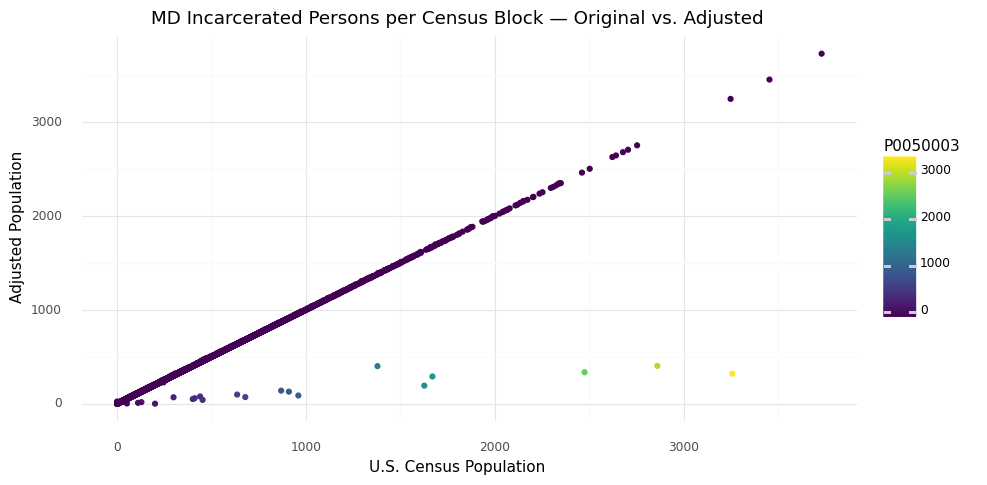

<ggplot: (393083406)>

In [132]:
(
        ggplot(df_md3) +
            aes(x='P0020001', y='Adj_Population', color = 'P0050003') +
            geom_point() +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() +
#             facet_wrap("~school_to_school") +
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
            labs(
                title = "MD Incarcerated Persons per Census Block — Original vs. Adjusted",
                y = "Adjusted Population",
                x = "U.S. Census Population"
            )
            + theme(figure_size=(10, 5)) 
    )

------

## New Jersey

##### 2020 PL 94-171 Data Summary File for New Jersey based on the Decennial Census at the Block level

In [133]:
df_nj1 = pd.read_csv("..//data//source//RDH-data//nj_pl2020_b_csv//nj_pl2020_b.csv", encoding="utf-8")
df_nj1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,NJ,750,0,0,0,121171,7500000US340010001001000,340010001001000,1,2,34,1779795,1,H1,882270,2080,C5,885142,99999,99,99999999,2080,C5,885142,100,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,12100,1,428,99999,99999,9,999,99999,Y,N,2,2,2,010501,A,99999,99999,960,0,156179,1000,Block 1000,S,0,0,39.362701,-74.456205,BK,99999,340010001001000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [134]:
df_nj1_subset = df_nj1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [135]:
df_nj1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,NJ,340010001001000,1,100,1,1000,0,Block 1000,39.362701,-74.456205,0,0,0,0,0,0
1,PLST,NJ,340010001001001,1,100,1,1001,552994,Block 1001,39.359901,-74.457522,0,0,0,0,0,0
2,PLST,NJ,340010001001002,1,100,1,1002,9154,Block 1002,39.359479,-74.461735,27,27,17,0,0,0
3,PLST,NJ,340010001001003,1,100,1,1003,16540,Block 1003,39.354845,-74.458303,26,26,18,0,0,0
4,PLST,NJ,340010001001004,1,100,1,1004,0,Block 1004,39.357123,-74.454258,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137967,PLST,NJ,340410324002064,41,32400,2,2064,30388,Block 2064,40.650934,-75.164184,0,0,0,0,0,0
137968,PLST,NJ,340410324002065,41,32400,2,2065,589686,Block 2065,40.648917,-75.169298,8,8,3,0,0,0
137969,PLST,NJ,340410324002066,41,32400,2,2066,4330,Block 2066,40.659459,-75.164694,10,10,8,0,0,0
137970,PLST,NJ,340410324002067,41,32400,2,2067,17169,Block 2067,40.659217,-75.166056,44,44,29,0,0,0


In [136]:
len(df_nj1_subset)

137972

In [137]:
len(df_nj1_subset.BLOCK)

137972

In [138]:
df_nj1.dtypes

FILEID      object
STUSAB      object
SUMLEV       int64
GEOVAR       int64
GEOCOMP      int64
             ...  
P0050006     int64
P0050007     int64
P0050008     int64
P0050009     int64
P0050010     int64
Length: 373, dtype: object

In [139]:
df_nj1_subset['STATE'] = 34
df_nj1_subset.head(3)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,STATE
0,PLST,NJ,340010001001000,1,100,1,1000,0,Block 1000,39.362701,-74.456205,0,0,0,0,0,0,34
1,PLST,NJ,340010001001001,1,100,1,1001,552994,Block 1001,39.359901,-74.457522,0,0,0,0,0,0,34
2,PLST,NJ,340010001001002,1,100,1,1002,9154,Block 1002,39.359479,-74.461735,27,27,17,0,0,0,34


##### 2020 Redistricting Data for New Jersey at the Block Level (Adjusted) 

The merged csv of New Jersey adjusted redistricting data was compiled in the NJ-adjusted-census-merged.ipynb notebook of 21 seperate datasets by county from the Redistricting Data Hub

From Data Hub ReadMe file: These datasets were retrieved from the New Jersey Department of State at https://nj.gov/state/dos-reports-2020-census-report.shtml The RDH retrieved the data from the source listed and did not modify any of the data. The data for the Block level is available by county. There is one XLSX file for each county, and one sheet per table (P1, P2, P3, P4). All XLSX files are included in this zipped folder.

In [140]:
# Location of file: ..//data//processed//df_nj_merged.csv

In [141]:
df_nj2 = pd.read_csv("..//data//processed//df_nj_merged.csv", encoding="utf-8")
df_nj2

,State,County,Municipality,Tract,Group,Block,VTD,VTDI,County Name,Municipality Name,Areaname,Population,Total,18plus
0,34,1,0,10101,4,4003,ZZZZZZ,P,Atlantic County,County subdivisions not defined,Block 4003,0,0,0
1,34,1,0,10101,4,4004,ZZZZZZ,P,Atlantic County,County subdivisions not defined,Block 4004,0,0,0
2,34,1,0,10102,1,1000,ZZZZZZ,P,Atlantic County,County subdivisions not defined,Block 1000,0,0,0
3,34,1,0,10102,1,1001,ZZZZZZ,P,Atlantic County,County subdivisions not defined,Block 1001,0,0,0
4,34,1,0,10104,1,1000,ZZZZZZ,P,Atlantic County,County subdivisions not defined,Block 1000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137967,34,41,80570,31601,4,4044,115005,A,Warren County,White township,Block 4044,24,22,17
137968,34,41,80570,31601,4,4045,115005,A,Warren County,White township,Block 4045,106,105,87
137969,34,41,80570,31601,4,4046,115005,A,Warren County,White township,Block 4046,30,30,30
137970,34,41,80570,31601,4,4047,115005,A,Warren County,White township,Block 4047,74,72,53


In [142]:
len(df_nj2)

137972

In [143]:
len(df_nj2.Block)

137972

In [144]:
df_nj2.dtypes

State                 int64
County                int64
Municipality          int64
Tract                 int64
Group                 int64
Block                 int64
VTD                  object
VTDI                 object
County Name          object
Municipality Name    object
Areaname             object
Population            int64
Total                 int64
18plus                int64
dtype: object

##### Ordering and Creating Columns to Merge NJ Datasets On

The NJ Adjsuted files (df_nj2) having been previously separated by county do not have geocodes so it's not as easy to merge.

In [145]:
# Census GEOCODE = 340410324002068 = 34 041 032400 2068 
# 34 = state , 041 = county, 032400 = tract, 2068 = block
# 34 = state , 041 = county, 032400 = tract, 2068 = block (currently)

Reordering the adjusted data dataframe to match the census data dataframe

In [146]:
df_nj3 = df_nj2.sort_values(["County", "Tract", "Group", "Block"], ascending = (True, True, True, True))

In [147]:
df_nj3['order'] = np.arange(len(df_nj3))

In [148]:
df_nj3.head(5)

,State,County,Municipality,Tract,Group,Block,VTD,VTDI,County Name,Municipality Name,Areaname,Population,Total,18plus,order
229,34,1,2080,100,1,1000,010501,A,Atlantic County,Atlantic City city,Block 1000,0,0,0,0
230,34,1,2080,100,1,1001,010501,A,Atlantic County,Atlantic City city,Block 1001,0,0,0,1
231,34,1,2080,100,1,1002,010501,A,Atlantic County,Atlantic City city,Block 1002,27,22,17,2
232,34,1,2080,100,1,1003,010501,A,Atlantic County,Atlantic City city,Block 1003,26,19,18,3
233,34,1,2080,100,1,1004,010501,A,Atlantic County,Atlantic City city,Block 1004,0,0,0,4


In [149]:
df_nj1_subset['order'] = np.arange(len(df_nj1_subset))

In [150]:
df_nj1_subset.head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,STATE,order
0,PLST,NJ,340010001001000,1,100,1,1000,0,Block 1000,39.362701,-74.456205,0,0,0,0,0,0,34,0
1,PLST,NJ,340010001001001,1,100,1,1001,552994,Block 1001,39.359901,-74.457522,0,0,0,0,0,0,34,1
2,PLST,NJ,340010001001002,1,100,1,1002,9154,Block 1002,39.359479,-74.461735,27,27,17,0,0,0,34,2
3,PLST,NJ,340010001001003,1,100,1,1003,16540,Block 1003,39.354845,-74.458303,26,26,18,0,0,0,34,3
4,PLST,NJ,340010001001004,1,100,1,1004,0,Block 1004,39.357123,-74.454258,0,0,0,0,0,0,34,4


##### Merging the Datasets on "order"

In [151]:
df_nj4 = pd.merge(df_nj1_subset, df_nj3, left_on='order', right_on='order')
df_nj4

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,STATE,order,State,County,Municipality,Tract,Group,Block,VTD,VTDI,County Name,Municipality Name,Areaname,Population,Total,18plus
0,PLST,NJ,340010001001000,1,100,1,1000,0,Block 1000,39.362701,-74.456205,0,0,0,0,0,0,34,0,34,1,2080,100,1,1000,010501,A,Atlantic County,Atlantic City city,Block 1000,0,0,0
1,PLST,NJ,340010001001001,1,100,1,1001,552994,Block 1001,39.359901,-74.457522,0,0,0,0,0,0,34,1,34,1,2080,100,1,1001,010501,A,Atlantic County,Atlantic City city,Block 1001,0,0,0
2,PLST,NJ,340010001001002,1,100,1,1002,9154,Block 1002,39.359479,-74.461735,27,27,17,0,0,0,34,2,34,1,2080,100,1,1002,010501,A,Atlantic County,Atlantic City city,Block 1002,27,22,17
3,PLST,NJ,340010001001003,1,100,1,1003,16540,Block 1003,39.354845,-74.458303,26,26,18,0,0,0,34,3,34,1,2080,100,1,1003,010501,A,Atlantic County,Atlantic City city,Block 1003,26,19,18
4,PLST,NJ,340010001001004,1,100,1,1004,0,Block 1004,39.357123,-74.454258,0,0,0,0,0,0,34,4,34,1,2080,100,1,1004,010501,A,Atlantic County,Atlantic City city,Block 1004,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137967,PLST,NJ,340410324002064,41,32400,2,2064,30388,Block 2064,40.650934,-75.164184,0,0,0,0,0,0,34,137967,34,41,1030,32400,2,2064,10002,P,Warren County,Alpha borough,Block 2064,0,0,0
137968,PLST,NJ,340410324002065,41,32400,2,2065,589686,Block 2065,40.648917,-75.169298,8,8,3,0,0,0,34,137968,34,41,1030,32400,2,2065,10002,P,Warren County,Alpha borough,Block 2065,8,8,3
137969,PLST,NJ,340410324002066,41,32400,2,2066,4330,Block 2066,40.659459,-75.164694,10,10,8,0,0,0,34,137969,34,41,1030,32400,2,2066,10001,A,Warren County,Alpha borough,Block 2066,10,9,8
137970,PLST,NJ,340410324002067,41,32400,2,2067,17169,Block 2067,40.659217,-75.166056,44,44,29,0,0,0,34,137970,34,41,1030,32400,2,2067,10001,A,Warren County,Alpha borough,Block 2067,44,44,29


##### Creating Column for Differences between the Two Population Counts

In [152]:
df_nj4['dif_pop'] = df_nj4['Population'] - df_nj4['P0020001']

In [153]:
df_nj4['adjpop'] = df_nj4['Population']

In [154]:
df_nj4.head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,STATE,order,State,County,Municipality,Tract,Group,Block,VTD,VTDI,County Name,Municipality Name,Areaname,Population,Total,18plus,dif_pop,adjpop
0,PLST,NJ,340010001001000,1,100,1,1000,0,Block 1000,39.362701,-74.456205,0,0,0,0,0,0,34,0,34,1,2080,100,1,1000,010501,A,Atlantic County,Atlantic City city,Block 1000,0,0,0,0,0
1,PLST,NJ,340010001001001,1,100,1,1001,552994,Block 1001,39.359901,-74.457522,0,0,0,0,0,0,34,1,34,1,2080,100,1,1001,010501,A,Atlantic County,Atlantic City city,Block 1001,0,0,0,0,0
2,PLST,NJ,340010001001002,1,100,1,1002,9154,Block 1002,39.359479,-74.461735,27,27,17,0,0,0,34,2,34,1,2080,100,1,1002,010501,A,Atlantic County,Atlantic City city,Block 1002,27,22,17,0,27
3,PLST,NJ,340010001001003,1,100,1,1003,16540,Block 1003,39.354845,-74.458303,26,26,18,0,0,0,34,3,34,1,2080,100,1,1003,010501,A,Atlantic County,Atlantic City city,Block 1003,26,19,18,0,26
4,PLST,NJ,340010001001004,1,100,1,1004,0,Block 1004,39.357123,-74.454258,0,0,0,0,0,0,34,4,34,1,2080,100,1,1004,010501,A,Atlantic County,Atlantic City city,Block 1004,0,0,0,0,0


In [155]:
df_nj4.sort_values(by = 'Population', ascending=True).head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,STATE,order,State,County,Municipality,Tract,Group,Block,VTD,VTDI,County Name,Municipality Name,Areaname,Population,Total,18plus,dif_pop,adjpop
41891,PLST,NJ,340110101031002,11,10103,1,1002,1532878,Block 1002,39.235418,-74.958960,0,0,0,0,0,0,34,41891,34,11,44580,10103,1,1002,045002,A,Cumberland County,Maurice River township,Block 1002,-1637,-1637,-1637,-1637,-1637
81150,PLST,NJ,340230090001005,23,9000,1,1005,171366,Block 1005,40.590460,-74.268824,0,0,0,0,0,0,34,81150,34,23,82000,9000,1,1005,125305,A,Middlesex County,Woodbridge township,Block 1005,-1221,-1221,-1221,-1221,-1221
29388,PLST,NJ,340076019001019,7,601900,1,1019,7811,Block 1019,39.913725,-75.114692,0,0,0,0,0,0,34,29388,34,7,10000,601900,1,1019,040107,A,Camden County,Camden city,Block 1019,-168,-168,-168,-168,-168
35960,PLST,NJ,340076103002027,7,610300,2,2027,9623,Block 2027,39.947007,-75.119826,16,16,11,0,0,0,34,35960,34,7,10000,610300,2,2027,040410,A,Camden County,Camden city,Block 2027,-92,-98,-97,-108,-92
28238,PLST,NJ,340057048014012,5,704801,4,4012,214270,Block 4012,40.000168,-74.589083,588,588,587,588,588,0,34,28238,34,5,51510,704801,4,4012,130001,A,Burlington County,New Hanover township,Block 4012,-64,-74,-65,-652,-64


Note: New Jersey seems to have negative adjusted populations

In [156]:
df_nj4.sort_values(by = 'dif_pop', ascending=True)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,STATE,order,State,County,Municipality,Tract,Group,Block,VTD,VTDI,County Name,Municipality Name,Areaname,Population,Total,18plus,dif_pop,adjpop
43353,PLST,NJ,340110205021000,11,20502,1,1000,353813,Block 1000,39.413235,-75.207583,3913,3913,3913,3913,3913,0,34,43353,34,11,7600,20502,1,1000,005203,A,Cumberland County,Bridgeton city,Block 1000,599,578,599,-3314,599
28353,PLST,NJ,340059822003049,5,982200,3,3049,1417514,Block 3049,40.001083,-74.630932,3013,3013,3008,2997,2997,0,34,28353,34,5,51510,982200,3,3049,130001,A,Burlington County,New Hanover township,Block 3049,0,0,0,-3013,0
52847,PLST,NJ,340139801001015,13,980100,1,1015,157545,Block 1015,40.712682,-74.172926,5642,5642,5642,5642,5642,0,34,52847,34,13,51000,980100,1,1015,070E03,A,Essex County,Newark city,Block 1015,3412,3330,3412,-2230,3412
41891,PLST,NJ,340110101031002,11,10103,1,1002,1532878,Block 1002,39.235418,-74.958960,0,0,0,0,0,0,34,41891,34,11,44580,10103,1,1002,045002,A,Cumberland County,Maurice River township,Block 1002,-1637,-1637,-1637,-1637,-1637
28261,PLST,NJ,340059818021003,5,981802,1,1003,499533,Block 1003,40.156021,-74.677702,3105,3105,3093,3064,3064,0,34,28261,34,5,12670,981802,1,1003,035001,A,Burlington County,Chesterfield township,Block 1003,1563,1487,1551,-1542,1563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,PLST,NJ,340010012003010,1,1200,3,3010,27894,Block 3010,39.365029,-74.439450,72,72,61,16,0,0,34,309,34,1,2080,1200,3,3010,010303,A,Atlantic County,Atlantic City city,Block 3010,89,72,78,17,89
127528,PLST,NJ,340373737002000,37,373700,2,2000,304225,Block 2000,41.059718,-74.757696,307,307,237,1,0,0,34,127528,34,37,51930,373700,2,2000,075001,A,Sussex County,Newton town,Block 2000,325,316,255,18,325
482,PLST,NJ,340010014001031,1,1400,1,1031,84123,Block 1031,39.374572,-74.429882,699,699,425,0,0,0,34,482,34,1,2080,1400,1,1031,010203,A,Atlantic County,Atlantic City city,Block 1031,717,628,443,18,717
45727,PLST,NJ,340130039002000,13,3900,2,2000,97641,Block 2000,40.726478,-74.196496,797,797,602,0,0,0,34,45727,34,13,51000,3900,2,2000,070C09,A,Essex County,Newark city,Block 2000,817,779,622,20,817


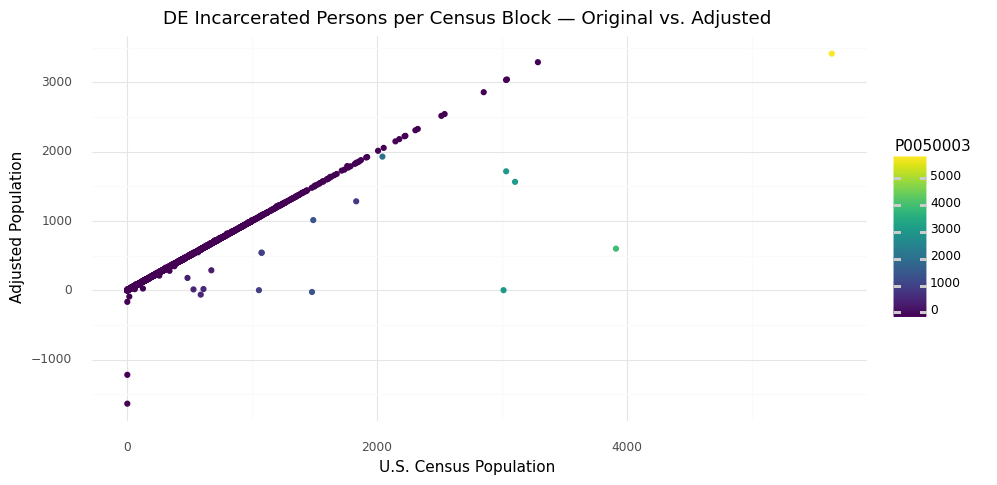

<ggplot: (745321728)>

In [157]:
(
        ggplot(df_nj4) +
            aes(x='P0020001', y='Population', color = 'P0050003') +
            geom_point() +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() +
#             facet_wrap("~school_to_school") +
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
            labs(
                title = "DE Incarcerated Persons per Census Block — Original vs. Adjusted",
                y = "Adjusted Population",
                x = "U.S. Census Population"
            )
            + theme(figure_size=(10, 5)) 
    )

## Nevada

##### 2020 PL 94-171 Data Summary File for Nevada based on the Decennial Census at the Block level

In [158]:
df_nv1 = pd.read_csv("..//data//source//RDH-data//nv_pl2020_b_csv//nv_pl2020_b.csv", encoding="utf-8")
df_nv1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,NV,750,0,0,0,39794,7500000US320019501001000,320019501001000,4,8,32,1779793,1,H1,858638,94238,Z5,1937432,99999,99,99999999,99999,99,99999999,950100,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,21980,2,999,99999,99999,9,999,99999,9,9,2,17,38,000016,A,99999,99999,30,189454886,0,1000,Block 1000,S,0,0,39.950029,-117.596185,BK,99999,320019501001000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [159]:
df_nv1_subset = df_nv1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [160]:
df_nv1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,NV,320019501001000,1,950100,1,1000,189454886,Block 1000,39.950029,-117.596185,0,0,0,0,0,0
1,PLST,NV,320019501001001,1,950100,1,1001,61766429,Block 1001,39.948144,-117.748221,0,0,0,0,0,0
2,PLST,NV,320019501001002,1,950100,1,1002,40086131,Block 1002,39.970603,-117.811940,0,0,0,0,0,0
3,PLST,NV,320019501001003,1,950100,1,1003,2646171,Block 1003,39.968673,-117.867189,0,0,0,0,0,0
4,PLST,NV,320019501001004,1,950100,1,1004,737577857,Block 1004,39.845194,-118.126386,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57404,PLST,NV,325100010023015,510,1002,3,3015,74331,Block 3015,39.175311,-119.721105,134,134,123,0,0,0
57405,PLST,NV,325100010023016,510,1002,3,3016,28492,Block 3016,39.174292,-119.722770,73,73,61,0,0,0
57406,PLST,NV,325100010023017,510,1002,3,3017,6947,Block 3017,39.172953,-119.723520,24,24,15,0,0,0
57407,PLST,NV,325109900000001,510,990000,0,1,0,Block 0001,39.141272,-119.974222,0,0,0,0,0,0


In [161]:
len(df_nv1_subset)

57409

##### 2020 Redistricting Data for Colorado at the Block level (Adjusted)

From Data Hub ReadMe file: These datasets were retrieved from the Nevada Legislature at https://www.leg.state.nv.us/Division/Research/Districts/Reapp/2021/district-plans#districts-proposed 10/07/2021

In [162]:
df_nv2 = pd.read_excel("..//data//source//RDH-data//nv_pl2020_official_xlsx//2020PL94-171_ADJPOP_Blocks.xlsx")
df_nv2

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,GEOID,ADJPOP,TAWHITEALN,TABLACKCMB,TAAIANCMB,TAASIANCMB,TANHOPICMB,TAOTHERALN,TA2RACE,TAHISPANIC
0,32,1,950100,1000,320019501001000,Block 1000,7500000US320019501001000,0,0,0,0,0,0,0,0,0
1,32,1,950100,1001,320019501001001,Block 1001,7500000US320019501001001,0,0,0,0,0,0,0,0,0
2,32,1,950100,1002,320019501001002,Block 1002,7500000US320019501001002,0,0,0,0,0,0,0,0,0
3,32,1,950100,1003,320019501001003,Block 1003,7500000US320019501001003,0,0,0,0,0,0,0,0,0
4,32,1,950100,1004,320019501001004,Block 1004,7500000US320019501001004,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57404,32,510,1002,3015,325100010023015,Block 3015,7500000US325100010023015,134,89,0,1,0,0,24,21,50
57405,32,510,1002,3016,325100010023016,Block 3016,7500000US325100010023016,73,54,1,7,4,2,3,8,5
57406,32,510,1002,3017,325100010023017,Block 3017,7500000US325100010023017,26,9,1,2,4,4,8,7,12
57407,32,510,990000,1,325109900000001,Block 0001,7500000US325109900000001,0,0,0,0,0,0,0,0,0


In [163]:
df_nv2_subset = df_nv2[['STATEFP20', 'COUNTYFP20', 'TRACTCE20', 'BLOCKCE20', 'GEOID20', 'GEOID', 'ADJPOP']]
df_nv2_subset

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,GEOID,ADJPOP
0,32,1,950100,1000,320019501001000,7500000US320019501001000,0
1,32,1,950100,1001,320019501001001,7500000US320019501001001,0
2,32,1,950100,1002,320019501001002,7500000US320019501001002,0
3,32,1,950100,1003,320019501001003,7500000US320019501001003,0
4,32,1,950100,1004,320019501001004,7500000US320019501001004,1
...,...,...,...,...,...,...,...
57404,32,510,1002,3015,325100010023015,7500000US325100010023015,134
57405,32,510,1002,3016,325100010023016,7500000US325100010023016,73
57406,32,510,1002,3017,325100010023017,7500000US325100010023017,26
57407,32,510,990000,1,325109900000001,7500000US325109900000001,0


In [164]:
len(df_nv2_subset)

57409

##### Merging the Datasets on GEOCODE and GEOID20

In [165]:
df_nv3 = pd.merge(df_nv1_subset, df_nv2_subset, left_on='GEOCODE', right_on='GEOID20')
df_nv3

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,GEOID,ADJPOP
0,PLST,NV,320019501001000,1,950100,1,1000,189454886,Block 1000,39.950029,-117.596185,0,0,0,0,0,0,32,1,950100,1000,320019501001000,7500000US320019501001000,0
1,PLST,NV,320019501001001,1,950100,1,1001,61766429,Block 1001,39.948144,-117.748221,0,0,0,0,0,0,32,1,950100,1001,320019501001001,7500000US320019501001001,0
2,PLST,NV,320019501001002,1,950100,1,1002,40086131,Block 1002,39.970603,-117.811940,0,0,0,0,0,0,32,1,950100,1002,320019501001002,7500000US320019501001002,0
3,PLST,NV,320019501001003,1,950100,1,1003,2646171,Block 1003,39.968673,-117.867189,0,0,0,0,0,0,32,1,950100,1003,320019501001003,7500000US320019501001003,0
4,PLST,NV,320019501001004,1,950100,1,1004,737577857,Block 1004,39.845194,-118.126386,1,1,0,0,0,0,32,1,950100,1004,320019501001004,7500000US320019501001004,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57404,PLST,NV,325100010023015,510,1002,3,3015,74331,Block 3015,39.175311,-119.721105,134,134,123,0,0,0,32,510,1002,3015,325100010023015,7500000US325100010023015,134
57405,PLST,NV,325100010023016,510,1002,3,3016,28492,Block 3016,39.174292,-119.722770,73,73,61,0,0,0,32,510,1002,3016,325100010023016,7500000US325100010023016,73
57406,PLST,NV,325100010023017,510,1002,3,3017,6947,Block 3017,39.172953,-119.723520,24,24,15,0,0,0,32,510,1002,3017,325100010023017,7500000US325100010023017,26
57407,PLST,NV,325109900000001,510,990000,0,1,0,Block 0001,39.141272,-119.974222,0,0,0,0,0,0,32,510,990000,1,325109900000001,7500000US325109900000001,0


##### Creating Column for Differences between the Two Population Counts

In [166]:
df_nv3['dif_pop'] = df_nv3['ADJPOP'] - df_nv3['P0020001']

In [167]:
df_nv3['adjpop'] = df_nv3['ADJPOP']

In [168]:
df_nv3.head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,GEOID,ADJPOP,dif_pop,adjpop
0,PLST,NV,320019501001000,1,950100,1,1000,189454886,Block 1000,39.950029,-117.596185,0,0,0,0,0,0,32,1,950100,1000,320019501001000,7500000US320019501001000,0,0,0
1,PLST,NV,320019501001001,1,950100,1,1001,61766429,Block 1001,39.948144,-117.748221,0,0,0,0,0,0,32,1,950100,1001,320019501001001,7500000US320019501001001,0,0,0
2,PLST,NV,320019501001002,1,950100,1,1002,40086131,Block 1002,39.970603,-117.811940,0,0,0,0,0,0,32,1,950100,1002,320019501001002,7500000US320019501001002,0,0,0
3,PLST,NV,320019501001003,1,950100,1,1003,2646171,Block 1003,39.968673,-117.867189,0,0,0,0,0,0,32,1,950100,1003,320019501001003,7500000US320019501001003,0,0,0
4,PLST,NV,320019501001004,1,950100,1,1004,737577857,Block 1004,39.845194,-118.126386,1,1,0,0,0,0,32,1,950100,1004,320019501001004,7500000US320019501001004,1,0,1


In [169]:
df_nv3.sort_values(by = 'ADJPOP', ascending=True).head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,GEOID,ADJPOP,dif_pop,adjpop
0,PLST,NV,320019501001000,1,950100,1,1000,189454886,Block 1000,39.950029,-117.596185,0,0,0,0,0,0,32,1,950100,1000,320019501001000,7500000US320019501001000,0,0,0
31886,PLST,NV,320110001001281,11,100,1,1281,10295388,Block 1281,40.231796,-116.235166,0,0,0,0,0,0,32,11,100,1281,320110001001281,7500000US320110001001281,0,0,0
31887,PLST,NV,320110001001282,11,100,1,1282,56641853,Block 1282,40.268380,-116.218879,0,0,0,0,0,0,32,11,100,1282,320110001001282,7500000US320110001001282,0,0,0
31888,PLST,NV,320110001001283,11,100,1,1283,2945864,Block 1283,40.254655,-116.259722,0,0,0,0,0,0,32,11,100,1283,320110001001283,7500000US320110001001283,0,0,0
31889,PLST,NV,320110001001284,11,100,1,1284,19945896,Block 1284,40.341121,-116.267911,0,0,0,0,0,0,32,11,100,1284,320110001001284,7500000US320110001001284,0,0,0


Note: Nevada doesn't seem to have negative adjusted population

In [170]:
df_nv3.sort_values(by = 'dif_pop', ascending=True)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,GEOID,ADJPOP,dif_pop,adjpop
20475,PLST,NV,320030058181013,3,5818,1,1013,56100830,Block 1013,36.499125,-115.649597,3224,3224,3224,3224,3224,0,32,3,5818,1013,320030058181013,7500000US320030058181013,1111,-2113,1111
20485,PLST,NV,320030058181023,3,5818,1,1023,353706,Block 1023,36.515308,-115.555065,1654,1654,1654,1654,1654,0,32,3,5818,1023,320030058181023,7500000US320030058181023,758,-896,758
45537,PLST,NV,320279601005001,27,960100,5,5001,239900,Block 5001,40.222487,-118.388307,1043,1043,1043,1043,1043,0,32,27,960100,5001,320279601005001,7500000US320279601005001,385,-658,385
23161,PLST,NV,320030060011011,3,6001,1,1011,201240,Block 1011,36.257198,-115.077296,887,887,884,887,887,0,32,3,6001,1011,320030060011011,7500000US320030060011011,327,-560,327
57159,PLST,NV,325100008003018,510,800,3,3018,194105,Block 3018,39.108854,-119.743968,1265,1265,1265,1265,1265,0,32,510,800,3018,325100008003018,7500000US325100008003018,860,-405,860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,PLST,NV,320030007001006,3,700,1,1006,16855,Block 1006,36.168047,-115.146549,1131,1131,1131,1131,1131,0,32,3,700,1006,320030007001006,7500000US320030007001006,1150,19,1150
46283,PLST,NV,320310001051005,31,105,1,1005,226393,Block 1005,39.535450,-119.791933,278,278,265,0,0,0,32,31,105,1005,320310001051005,7500000US320310001051005,298,20,298
46238,PLST,NV,320310001041007,31,104,1,1007,16939,Block 1007,39.522750,-119.824454,68,68,66,6,0,0,32,31,104,1007,320310001041007,7500000US320310001041007,92,24,92
2012,PLST,NV,320030004012004,3,401,2,2004,218878,Block 2004,36.183570,-115.136470,154,154,141,5,0,0,32,3,401,2004,320030004012004,7500000US320030004012004,199,45,199


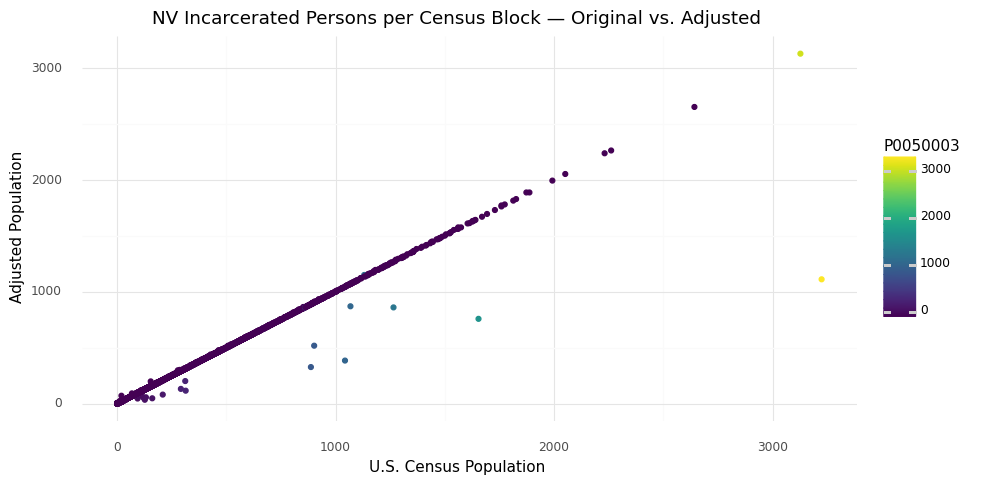

<ggplot: (767537783)>

In [171]:
(
        ggplot(df_nv3) +
            aes(x='P0020001', y='ADJPOP', color = 'P0050003') +
            geom_point() +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() +
#             facet_wrap("~school_to_school") +
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
            labs(
                title = "NV Incarcerated Persons per Census Block — Original vs. Adjusted",
                y = "Adjusted Population",
                x = "U.S. Census Population"
            )
            + theme(figure_size=(10, 5)) 
    )

-----

## New York

##### 2020 PL 94-171 Data Summary File for New York based on the Decennial Census at the Block level

In [172]:
df_ny1 = pd.read_csv("..//data//source//RDH-data//ny_pl2020_b_csv//ny_pl2020_b.csv", encoding="utf-8")
df_ny1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,NY,750,0,0,0,283871,7500000US360010001001000,360010001001000,1,2,36,1779796,1,H1,974099,1000,C5,978659,99999,99,99999999,1000,C5,978659,100,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,10580,1,104,99999,99999,9,999,99999,Y,N,20,44,108,33,A,99999,99999,2460,0,95153,1000,Block 1000,S,0,0,42.669248,-73.726504,BK,99999,360010001001000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [173]:
df_ny1_subset = df_ny1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [174]:
df_ny1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,NY,360010001001000,1,100,1,1000,0,Block 1000,42.669248,-73.726504,0,0,0,0,0,0
1,PLST,NY,360010001001001,1,100,1,1001,235406,Block 1001,42.669632,-73.728619,0,0,0,0,0,0
2,PLST,NY,360010001001002,1,100,1,1002,13435,Block 1002,42.670783,-73.729514,0,0,0,0,0,0
3,PLST,NY,360010001001003,1,100,1,1003,341882,Block 1003,42.671957,-73.731544,0,0,0,0,0,0
4,PLST,NY,360010001001004,1,100,1,1004,20060,Block 1004,42.670544,-73.734188,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288814,PLST,NY,361231505022069,123,150502,2,2069,12302,Block 2069,42.510657,-77.105079,0,0,0,0,0,0
288815,PLST,NY,361231505022070,123,150502,2,2070,155860,Block 2070,42.583916,-77.058782,5,5,4,0,0,0
288816,PLST,NY,361231505022071,123,150502,2,2071,207958,Block 2071,42.529096,-77.100610,27,27,26,0,0,0
288817,PLST,NY,361231505022072,123,150502,2,2072,1673436,Block 2072,42.529562,-77.090994,0,0,0,0,0,0


In [175]:
len(df_ny1_subset)

288819

In [176]:
df_ny1_subset.dtypes

FILEID       object
STUSAB       object
GEOCODE       int64
COUNTY        int64
TRACT         int64
BLKGRP        int64
BLOCK         int64
AREALAND      int64
NAME         object
INTPTLAT    float64
INTPTLON    float64
P0010001      int64
P0020001      int64
P0030001      int64
P0050001      int64
P0050003      int64
P0050004      int64
dtype: object

##### 2020 Redistricting Data for New York at the Block, County, Minor Civil Division (MCD), State, and Voting Tabulation District (VTD) levels (with and without DOJ categories) (Adjusted)

From Data Hub ReadMe file: These datasets were retrieved from the New York State Legislative Task Force on Demographic Research and Reapportionment at https://www.latfor.state.ny.us/data/?sec=2020amendpop 09/20/2021

In [177]:
df_ny2 = pd.read_excel("..//data//source//RDH-data//ny_pl2020_official_xlsx//PL_ADJUSTED_BLOCK.xlsx")
df_ny2

,FINAL,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STATE,COUNTY,CNTY_NAME,TRACT,BLOCK,BLKID,MCD,MCD_NAME,VTD,TOTAL_ADJ,WHITE_ADJ,BLACK_ADJ,AMIND_ADJ,ASIAN_ADJ,HWN_ADJ,MULTI_ADJ,OTHER_ADJ,UNKNOWN_ADJ,HISP_ADJ,NHISP_ADJ,NHWHITE_ADJ,NHBLACK_ADJ,NHAMIND_ADJ,NHASIAN_ADJ,NHHWN_ADJ,NHMULTI_ADJ,NHOTHER_ADJ,UNKNOWN_ETH_ADJ,TOTAL_VAP_ADJ,WHITE_VAP_ADJ,BLACK_VAP_ADJ,AMIND_VAP_ADJ,ASIAN_VAP_ADJ,HWN_VAP_ADJ,MULTI_VAP_ADJ,OTHER_VAP_ADJ,UNKNOWN_VAP_ADJ,HISP_VAP_ADJ,NHISP_VAP_ADJ,NHWHITE_VAP_ADJ,NHBLACK_VAP_ADJ,NHAMIND_VAP_ADJ,NHASIAN_VAP_ADJ,NHHWN_VAP_ADJ,NHMULTI_VAP_ADJ,NHOTHER_VAP_ADJ,UNKNOWN_VAP_ETH_ADJ
2,36,001,Albany,000100,1000,360010001001000,01000,Albany city,000033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,36,001,Albany,000100,1001,360010001001001,01000,Albany city,000033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,36,001,Albany,000100,1002,360010001001002,01000,Albany city,000033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288816,36,123,Yates,150502,2069,361231505022069,04594,Barrington town,000001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
288817,36,123,Yates,150502,2070,361231505022070,47504,Milo town,000015,5,4,0,0,0,0,1,0,0,0,5,4,0,0,0,0,1,0,0,4,4,0,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0
288818,36,123,Yates,150502,2071,361231505022071,04594,Barrington town,000001,27,25,0,0,0,0,2,0,0,0,27,25,0,0,0,0,2,0,0,26,24,0,0,0,0,2,0,0,0,26,24,0,0,0,0,2,0,0
288819,36,123,Yates,150502,2072,361231505022072,04594,Barrington town,000001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [178]:
df_ny2 = df_ny2.rename(columns={'FINAL': 'State'})
df_ny2 = df_ny2.rename(columns={'Unnamed: 1': 'County'})
df_ny2 = df_ny2.rename(columns={'Unnamed: 2': 'CNTY_NAME'})
df_ny2 = df_ny2.rename(columns={'Unnamed: 3': 'Tract'})
df_ny2 = df_ny2.rename(columns={'Unnamed: 4': 'Block'})
df_ny2 = df_ny2.rename(columns={'Unnamed: 5': 'BLKID'})
df_ny2 = df_ny2.rename(columns={'Unnamed: 6': 'MCD'})
df_ny2 = df_ny2.rename(columns={'Unnamed: 7': 'MCD_NAME'})
df_ny2 = df_ny2.rename(columns={'Unnamed: 8': 'VTD'})
df_ny2 = df_ny2.rename(columns={'Unnamed: 9': 'ADJPOP'})

In [179]:
df_ny2 = df_ny2.drop(df_ny2.index[range(2)])

In [180]:
df_ny2['State'] = df_ny2['State'].astype(str).astype(int)
df_ny2['County'] = df_ny2['County'].astype(str).astype(int)
df_ny2['Tract'] = df_ny2['Tract'].astype(str).astype(int)
df_ny2['Block'] = df_ny2['Block'].astype(str).astype(int)
df_ny2['BLKID'] = df_ny2['BLKID'].astype(str).astype(int)
df_ny2['MCD'] = df_ny2['MCD'].astype(str).astype(int)
df_ny2['VTD'] = df_ny2['VTD'].astype(str).astype(int)
df_ny2['ADJPOP'] = df_ny2['ADJPOP'].astype(str).astype(int)

In [181]:
len(df_ny2)

288819

In [182]:
df_ny2_subset = df_ny2[['State', 'County', 'CNTY_NAME', 'Tract', 'Block', 'BLKID', 'MCD', 'MCD_NAME', 'VTD', 'ADJPOP']] 

In [183]:
df_ny2_subset.head(2)

,State,County,CNTY_NAME,Tract,Block,BLKID,MCD,MCD_NAME,VTD,ADJPOP
2,36,1,Albany,100,1000,360010001001000,1000,Albany city,33,0
3,36,1,Albany,100,1001,360010001001001,1000,Albany city,33,0


In [184]:
df_ny2_subset.dtypes

State         int64
County        int64
CNTY_NAME    object
Tract         int64
Block         int64
BLKID         int64
MCD           int64
MCD_NAME     object
VTD           int64
ADJPOP        int64
dtype: object

In [185]:
# secondary adjusted doc
# df_ny3 = pd.read_excel("..//data//source//RDH-data//ny_pl2020_official_xlsx//PL_ADJUSTED_DOJ_BLK.xlsx")
# df_ny3

##### Merging the Datasets on GEOCODE and BLKID

In [186]:
df_ny4 = pd.merge(df_ny1_subset, df_ny2_subset, left_on='GEOCODE', right_on='BLKID')
df_ny4

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,State,County,CNTY_NAME,Tract,Block,BLKID,MCD,MCD_NAME,VTD,ADJPOP
0,PLST,NY,360010001001000,1,100,1,1000,0,Block 1000,42.669248,-73.726504,0,0,0,0,0,0,36,1,Albany,100,1000,360010001001000,1000,Albany city,33,0
1,PLST,NY,360010001001001,1,100,1,1001,235406,Block 1001,42.669632,-73.728619,0,0,0,0,0,0,36,1,Albany,100,1001,360010001001001,1000,Albany city,33,0
2,PLST,NY,360010001001002,1,100,1,1002,13435,Block 1002,42.670783,-73.729514,0,0,0,0,0,0,36,1,Albany,100,1002,360010001001002,1000,Albany city,33,0
3,PLST,NY,360010001001003,1,100,1,1003,341882,Block 1003,42.671957,-73.731544,0,0,0,0,0,0,36,1,Albany,100,1003,360010001001003,1000,Albany city,33,0
4,PLST,NY,360010001001004,1,100,1,1004,20060,Block 1004,42.670544,-73.734188,0,0,0,0,0,0,36,1,Albany,100,1004,360010001001004,1000,Albany city,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288814,PLST,NY,361231505022069,123,150502,2,2069,12302,Block 2069,42.510657,-77.105079,0,0,0,0,0,0,36,123,Yates,150502,2069,361231505022069,4594,Barrington town,1,0
288815,PLST,NY,361231505022070,123,150502,2,2070,155860,Block 2070,42.583916,-77.058782,5,5,4,0,0,0,36,123,Yates,150502,2070,361231505022070,47504,Milo town,15,5
288816,PLST,NY,361231505022071,123,150502,2,2071,207958,Block 2071,42.529096,-77.100610,27,27,26,0,0,0,36,123,Yates,150502,2071,361231505022071,4594,Barrington town,1,27
288817,PLST,NY,361231505022072,123,150502,2,2072,1673436,Block 2072,42.529562,-77.090994,0,0,0,0,0,0,36,123,Yates,150502,2072,361231505022072,4594,Barrington town,1,0


##### Creating Column for Differences between the Two Population Counts

In [187]:
df_ny4['dif_pop'] = df_ny4['ADJPOP'] - df_ny4['P0020001']

In [188]:
df_ny4['adjpop'] = df_ny4['ADJPOP']

In [189]:
df_ny4.head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,State,County,CNTY_NAME,Tract,Block,BLKID,MCD,MCD_NAME,VTD,ADJPOP,dif_pop,adjpop
0,PLST,NY,360010001001000,1,100,1,1000,0,Block 1000,42.669248,-73.726504,0,0,0,0,0,0,36,1,Albany,100,1000,360010001001000,1000,Albany city,33,0,0,0
1,PLST,NY,360010001001001,1,100,1,1001,235406,Block 1001,42.669632,-73.728619,0,0,0,0,0,0,36,1,Albany,100,1001,360010001001001,1000,Albany city,33,0,0,0
2,PLST,NY,360010001001002,1,100,1,1002,13435,Block 1002,42.670783,-73.729514,0,0,0,0,0,0,36,1,Albany,100,1002,360010001001002,1000,Albany city,33,0,0,0
3,PLST,NY,360010001001003,1,100,1,1003,341882,Block 1003,42.671957,-73.731544,0,0,0,0,0,0,36,1,Albany,100,1003,360010001001003,1000,Albany city,33,0,0,0
4,PLST,NY,360010001001004,1,100,1,1004,20060,Block 1004,42.670544,-73.734188,0,0,0,0,0,0,36,1,Albany,100,1004,360010001001004,1000,Albany city,33,0,0,0


In [190]:
df_ny4.sort_values(by = 'ADJPOP', ascending=True).head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,State,County,CNTY_NAME,Tract,Block,BLKID,MCD,MCD_NAME,VTD,ADJPOP,dif_pop,adjpop
285869,PLST,NY,361219702011000,121,970201,1,1000,359636,Block 1000,42.849358,-78.262590,227,227,227,227,227,0,36,121,Wyoming,970201,1000,361219702011000,3012,Attica town,6,-938,-1165,-938
285662,PLST,NY,361199830001002,119,983000,1,1002,46335,Block 1002,41.245050,-73.677932,269,269,269,269,269,0,36,119,Westchester,983000,1002,361199830001002,5320,Bedford town,16,-375,-644,-375
168864,PLST,NY,360730406021000,73,40602,1,1000,417137,Block 1000,43.244877,-78.214526,419,419,419,419,419,0,36,73,Orleans,40602,1000,360730406021000,1044,Albion town,6,-340,-759,-340
207347,PLST,NY,360894914004016,89,491400,4,4016,196315,Block 4016,44.725037,-75.445640,169,169,169,169,169,0,36,89,St. Lawrence,491400,4016,360894914004016,54485,Ogdensburg city,57,-192,-361,-192
149425,PLST,NY,360650266001004,65,26600,1,1004,326106,Block 1004,43.154774,-75.297278,618,618,617,612,612,0,36,65,Oneida,26600,1004,360650266001004,45535,Marcy town,39,-187,-805,-187


Note: New York seems to have negative adjusted populations

In [191]:
df_ny4.sort_values(by = 'dif_pop', ascending=True)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,State,County,CNTY_NAME,Tract,Block,BLKID,MCD,MCD_NAME,VTD,ADJPOP,dif_pop,adjpop
84441,PLST,NY,360470018012000,47,1801,2,2000,20859,Block 2000,40.659965,-74.003892,2562,2562,2562,2562,2562,0,36,47,Kings,1801,2000,360470018012000,10022,Brooklyn borough,901,0,-2562,0
64764,PLST,NY,360299803001003,29,980300,1,1003,198916,Block 1003,42.491256,-78.939503,2041,2041,2041,2041,2041,0,36,29,Erie,980300,1003,360299803001003,17200,Collins town,520,-29,-2070,-29
285870,PLST,NY,361219702011001,121,970201,1,1001,307565,Block 1001,42.849722,-78.271973,1863,1863,1863,1863,1863,0,36,121,Wyoming,970201,1001,361219702011001,3012,Attica town,6,-11,-1874,-11
51050,PLST,NY,360276100001002,27,610000,1,1002,535810,Block 1002,41.580441,-73.715707,1788,1788,1788,1788,1788,0,36,27,Dutchess,610000,1002,360276100001002,5452,Beekman town,20,-17,-1805,-17
36797,PLST,NY,360191035122003,19,103512,2,2003,144452,Block 2003,44.723500,-73.721442,1746,1746,1746,1746,1746,0,36,19,Clinton,103512,2003,360191035122003,19653,Dannemora town,16,-4,-1750,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137002,PLST,NY,360610162004001,61,16200,4,4001,55496,Block 4001,40.787506,-73.940044,2640,2640,2019,0,0,0,36,61,New York,16200,4001,360610162004001,44919,Manhattan borough,366,2670,30,2670
137541,PLST,NY,360610209012000,61,20901,2,2000,53641,Block 2000,40.811547,-73.955978,2077,2077,1609,0,0,0,36,61,New York,20901,2000,360610209012000,44919,Manhattan borough,534,2108,31,2108
137380,PLST,NY,360610194001000,61,19400,1,1000,68295,Block 1000,40.800274,-73.933807,2532,2532,1918,0,0,0,36,61,New York,19400,1000,360610194001000,44919,Manhattan borough,409,2564,32,2564
138019,PLST,NY,360610243023000,61,24302,3,3000,64010,Block 3000,40.831680,-73.937438,2348,2348,1647,23,0,0,36,61,New York,24302,3000,360610243023000,44919,Manhattan borough,747,2382,34,2382


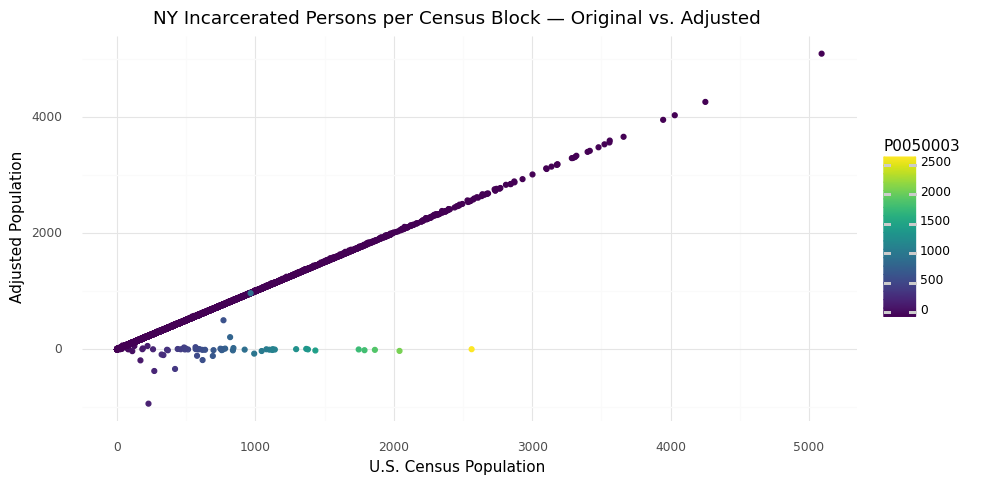

<ggplot: (744498252)>

In [192]:
(
        ggplot(df_ny4) +
            aes(x='P0020001', y='ADJPOP', color = 'P0050003') +
            geom_point() +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() +
#             facet_wrap("~school_to_school") +
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
            labs(
                title = "NY Incarcerated Persons per Census Block — Original vs. Adjusted",
                y = "Adjusted Population",
                x = "U.S. Census Population"
            )
            + theme(figure_size=(10, 5)) 
    )

-----

## Virginia

##### 2020 PL 94-171 Data Summary File for Virginia based on the Decennial Census at the Block level

In [193]:
df_va1 = pd.read_csv("..//data//source//RDH-data//va_pl2020_b_csv//va_pl2020_b.csv", encoding="utf-8")
df_va1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,VA,750,0,0,0,78466,7500000US510010901011000,510010901011000,3,5,51,1779803,1,H1,1480091,91196,Z1,1927175,99999,99,99999999,16512,C1,2390792,90101,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,99999,9,999,99999,99999,9,999,99999,N,N,2,6,100,101,A,99999,99999,60,219012,24206963,1000,Block 1000,S,0,0,37.948163,-75.368287,BK,99999,510010901011000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [194]:
df_va1_subset = df_va1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [195]:
df_va1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,VA,510010901011000,1,90101,1,1000,219012,Block 1000,37.948163,-75.368287,0,0,0,0,0,0
1,PLST,VA,510010901011001,1,90101,1,1001,221888,Block 1001,37.952655,-75.351859,19,19,15,0,0,0
2,PLST,VA,510010901011002,1,90101,1,1002,203,Block 1002,37.945171,-75.364397,0,0,0,0,0,0
3,PLST,VA,510010901011003,1,90101,1,1003,0,Block 1003,37.951383,-75.356912,0,0,0,0,0,0
4,PLST,VA,510010901011004,1,90101,1,1004,39283,Block 1004,37.949659,-75.356744,11,11,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163486,PLST,VA,518400003024019,840,302,4,4019,243043,Block 4019,39.136362,-78.179261,209,209,139,0,0,0
163487,PLST,VA,518400003024020,840,302,4,4020,12689,Block 4020,39.136900,-78.182204,138,138,97,0,0,0
163488,PLST,VA,518400003024021,840,302,4,4021,309003,Block 4021,39.139577,-78.181242,0,0,0,0,0,0
163489,PLST,VA,518400003024022,840,302,4,4022,2233,Block 4022,39.139238,-78.176168,13,13,4,0,0,0


In [196]:
len(df_va1_subset)

163491

##### 2020 Redistricting Data for Virginia at the Block level (Adjusted)

Data was initially gathered by Data Hub: The dataset was retrieved from the Virginia Redistricting Commission at https://virginiaredistricting.org/PageReader.aspx?page=2020DataDownload 09/14/2021 

Source: https://redistrictingdatahub.org/dataset/virginia-block-county-and-vtd-pl-94-171-2020-official/

Additional Notes
The Virginia Redistricting Commisions notes: 
"For prisoner adjustments, two fields were added:
* PRADJPOPD: The number of prisoners added or removed from the geographic features total population (TAPERSONS)
* ADJPOP: The adjusted population
* The field containing the total population from the Census Bureau (TAPERSONS) was not modified."


#### The "blocks" table within the statewide20.gpkg file was converted to a csv using SQLite Studio and through exploration in the VA-SQLite-adjusted-census-exploration notebook

Importing converted csv

In [197]:
df_va2 = pd.read_csv("..//data//processed//va_statewide20_converted.csv", encoding="utf-8")
df_va2.head(3)

,fid,geom,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,CIFSN,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,SUBMCD,SUBMCDCC,SUBMCDNS,ESTATE,ESTATECC,ESTATENS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,UA,UATYPE,UR,CD116,CD118,CD119,CD120,CD121,SLDU18,SLDU22,SLDU24,SLDU26,SLDU28,SLDL18,SLDL22,SLDL24,SLDL26,SLDL28,VTD,VTDI,ZCTA,SDELM,SDSEC,SDUNI,PUMA,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,GCUNI,POP100,HU100,INTPTLAT,INTPTLON,LSADC,PARTFLAG,UGA,TAPERSONS,TA1RACE,TAWHITEALN,TABLACKALN,TAAMINDALN,TAASIANALN,TANHPOALN,TAOTHERALN,TA2RACE,TAPOP2RACE,TAWHTBLACK,TAWHAIAN,TAWHTASIAN,TAWHNHPO,TAWHTOTHER,TABLAIAN,TABLKASIAN,TABLNHPO,TABLKOTHER,TAAIANAS,TAAIANNHP,TAAIANOR,TAASNHPO,TAASIANOTH,TANHPOOR,TA3RACES,TAWHBLAIN,TAWHBLAS,TAWHBLNHP,TAWHBLOR,TAWHAIANS,TAWHAIANHP,TAWHAIANOR,TAWASNHOPI,TAWHASOR,TAWHNHPOOT,TABLAIANS,TABLAIANHP,TABLAIANOR,TABLASNHOP,TABLASOR,TABLNHPOOR,TAAIANASHP,TAAIANASOR,TAAIANNHPO,TAASNHPOOR,TA4RACES,TAWHBLAINA,TAWHBLINHP,TAWHBLAINO,TAWHBLASHP,TAWHBLASOR,TAWHBLNHPO,TAWHAINSHP,TAWHAIANSO,TAWHAINHPO,TAWHASNHPO,TABLAINSHP,TABLAIANSO,TABLAINHPO,TABLASNHPO,TAAIANSHPO,TA5RACES,TAWHBINSHP,TAWHBLINSO,TAWHBINHPO,TAWHBLSHPO,TAWHINSHPO,TABLINSHPO,TA6RACES,TWHBINSHPO,THISPNHISP,TAHISPANIC,TNHISPANIC,TN1RACE,TNWHALN,TNBLKALN,TNAIANALN,TNASIANALN,TNNHPOALN,TNOTHRALN,TN2MRACES,TN2RACES,TNWHBL,TNWHAIAN,TNWHTASIAN,TNWHNHPOPI,TNWHOR,TNBLAIAN,TNBLASIAN,TNBLNHPOPI,TNBLOR,TNAIANAS,TNAIANNHPI,TNAIANOR,TNASNHPOPI,TNASOR,TNNHOPIOOR,TN3RACES,TNWHBLAIAN,TNWHBLAS,TNWHBLNHPI,TNWHBLOR,TNWHAIANAS,TNWHAIANHP,TNWHAIANOR,TNWHASNHPI,TNWHASOR,TNWHNHPOOR,TNBLAIANAS,TNBLAIANHP,TNBLAIANOR,TNBLASNHPI,TNBLASOR,TNBLNHPOOR,TNAIANASHP,TNAIANASOR,TNAIANNHPO,TNASNHPOOR,TN4RACES,TNWHBLAINS,TNWHBLINHP,TNWHBLAINO,TNWHBLASHP,TNWHBLASOR,TNWHBLNHPO,TNWHAINSHP,TNWHAIANSO,TNWHAINHPO,TNWHASNHPO,TNBLAINSHP,TNBLAIANSO,TNBLAINHPO,TNBLASNHPO,TNAIANSHPO,TN5RACES,TNWHBINSHP,TNWHBLINSO,TNWHBINHPO,TNWHBLSHPO,TNWHINSHPO,TNBLINSHPO,TN6RACES,TNWBINSHPO,VAPERSONS,VA1RACE,VAWHITEALN,VABLACKALN,VAAIANALN,VAASIANALN,VANHPOALN,VAOTHERALN,VA2MRACES,VA2RACES,VAWHBL,VAWHAIAN,VAWHAS,VAWHNHPO,VAWHOR,VABLAIAN,VABLASIAN,VABLNHOPI,VABLOR,VAAIANAS,VAAIANNHPI,VAAIANOR,VAASNHOPI,VAASOR,VANHPOOR,VA3RACES,VAWHBLAIAN,VAWHBLAS,VAWHBLNHPI,VAWHBLOR,VAWHAIANAS,VAWHAIANHP,VAWHAIANOR,VAWHASNHPI,VAWHASOR,VAWHNHPIOT,VABLAIANAS,VABLAIANHP,VABLAIANOR,VABLASNHPI,VABLASOR,VABLNHPIOT,VAAIANASHP,VAAIANASOR,VAAIANNHPO,VAASNHPOOR,VA4RACES,VAWHBLAINS,VAWHBLINHP,VAWHBLAINO,VAWHBLASHP,VAWHBLASOR,VAWHBLNHPO,VAWHAINSHP,VAWHAIANSO,VAWHAINHPO,VAWHASNHPO,VABLAINSHP,VABLAIANSO,VABLAINHPO,VABLASNHPO,VAAIANSHPO,VA5RACES,VAWHBINSHP,VAWHBLINSO,VAWHBINHPO,VAWHBLSHPO,VAWHINSHPO,VABLINSHPO,VA6RACES,VAWBINSHPO,VAHISNHISP,VAHISPANIC,VANHISPANC,VAN1RACE,VANWHTALN,VANBLKALN,VANAIANALN,VANASANALN,VANNHPOALN,VANORALN,VANM2RACES,VAN2RACES,VANWHBL,VANWHAIAN,VANWHAS,VANWHNHOPI,VANWHOR,VANBLAIAN,VANBLAS,VANBLNHOPI,VANBLOR,VANAIANAS,VANAIANNHP,VANAIANOR,VANASNHOPI,VANASOR,VANNHOPIOR,VAN3RACES,VANWHBLAIN,VANWHBLAS,VANWHBLNHP,VANWHBLOR,VANWHAIANS,VANWHAINHP,VANWHAIANO,VANWHASNHP,VANWHASOR,VANWHNHOPO,VANBLAIANS,VANBLAINHP,VANBLAIANO,VANBLASNHP,VANBLASOR,VANBLNHOPO,VANAIANSHP,VANAIANASO,VANAIANHPO,VANASNHPOO,VAN4RACES,VANWHBLINS,VANWHBINHP,VANWHBLINO,VANWHBLSHP,VANWHBLASO,VANWHBLHPO,VANWHINSHP,VANWHAINSO,VANWHINHPO,VANWHASHPO,VANBLINSHP,VANBLAINSO,VANBLINHPO,VANBLASHPO,VANAINSHPO,VAN5RACES,VANWBINSHP,VANWHBINSO,VANWBINHPO,VANWHBSHPO,VANWINSHPO,VANBINSHPO,VAN6RACES,VNWBINSHPO,TAHOUSING,TAHOCCUPID,TAHVACANT,TAGRPQRTR,TAINSTPOP,TAINSTCORR,TAINSTJCOR,TAINSTNURS,TAINSTOTHR,TANONINST,TAUNIVCOL,TAMILQRTR,TANINSTOTR,UFID,UID,layername,layerid,PUID,noparents,dindex,rindex,PRES202

In [198]:
df_va2_subset = df_va2[['fid', 'GEOID20', 'NAME20', 'TAPERSONS', 'PRADJPOPD', 'ADJPOP']]
df_va2_subset

,fid,GEOID20,NAME20,TAPERSONS,PRADJPOPD,ADJPOP
0,1,511179308004016,Block 4016,30,1,31
1,2,511179306001060,Block 1060,15,1,16
2,3,511179304011005,Block 1005,2,0,2
3,4,510538405002007,Block 2007,0,0,0
4,5,510538401011049,Block 1049,9,0,9
...,...,...,...,...,...,...
163486,163487,510594611001008,Block 1008,38,0,38
163487,163488,510594512001007,Block 1007,39,0,39
163488,163489,510594402013008,Block 3008,0,0,0
163489,163490,510594405031003,Block 1003,17,0,17


In [199]:
len(df_va2_subset)

163491

##### Merging the Datasets on GEOCODE and GEOID20

In [200]:
df_va3 = pd.merge(df_va1_subset, df_va2_subset, left_on='GEOCODE', right_on='GEOID20')
df_va3

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,fid,GEOID20,NAME20,TAPERSONS,PRADJPOPD,ADJPOP
0,PLST,VA,510010901011000,1,90101,1,1000,219012,Block 1000,37.948163,-75.368287,0,0,0,0,0,0,130456,510010901011000,Block 1000,0,0,0
1,PLST,VA,510010901011001,1,90101,1,1001,221888,Block 1001,37.952655,-75.351859,19,19,15,0,0,0,11581,510010901011001,Block 1001,19,0,19
2,PLST,VA,510010901011002,1,90101,1,1002,203,Block 1002,37.945171,-75.364397,0,0,0,0,0,0,147640,510010901011002,Block 1002,0,0,0
3,PLST,VA,510010901011003,1,90101,1,1003,0,Block 1003,37.951383,-75.356912,0,0,0,0,0,0,61295,510010901011003,Block 1003,0,0,0
4,PLST,VA,510010901011004,1,90101,1,1004,39283,Block 1004,37.949659,-75.356744,11,11,7,0,0,0,39079,510010901011004,Block 1004,11,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163486,PLST,VA,518400003024019,840,302,4,4019,243043,Block 4019,39.136362,-78.179261,209,209,139,0,0,0,117617,518400003024019,Block 4019,209,0,209
163487,PLST,VA,518400003024020,840,302,4,4020,12689,Block 4020,39.136900,-78.182204,138,138,97,0,0,0,86497,518400003024020,Block 4020,138,1,139
163488,PLST,VA,518400003024021,840,302,4,4021,309003,Block 4021,39.139577,-78.181242,0,0,0,0,0,0,37992,518400003024021,Block 4021,0,0,0
163489,PLST,VA,518400003024022,840,302,4,4022,2233,Block 4022,39.139238,-78.176168,13,13,4,0,0,0,136792,518400003024022,Block 4022,13,0,13


##### Creating Column for Differences between the Two Population Counts

In [201]:
df_va3['dif_pop'] = df_va3['ADJPOP'] - df_va3['P0020001']

In [202]:
df_va3['adjpop'] = df_va3['ADJPOP']

In [203]:
df_va3.head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,fid,GEOID20,NAME20,TAPERSONS,PRADJPOPD,ADJPOP,dif_pop,adjpop
0,PLST,VA,510010901011000,1,90101,1,1000,219012,Block 1000,37.948163,-75.368287,0,0,0,0,0,0,130456,510010901011000,Block 1000,0,0,0,0,0
1,PLST,VA,510010901011001,1,90101,1,1001,221888,Block 1001,37.952655,-75.351859,19,19,15,0,0,0,11581,510010901011001,Block 1001,19,0,19,0,19
2,PLST,VA,510010901011002,1,90101,1,1002,203,Block 1002,37.945171,-75.364397,0,0,0,0,0,0,147640,510010901011002,Block 1002,0,0,0,0,0
3,PLST,VA,510010901011003,1,90101,1,1003,0,Block 1003,37.951383,-75.356912,0,0,0,0,0,0,61295,510010901011003,Block 1003,0,0,0,0,0
4,PLST,VA,510010901011004,1,90101,1,1004,39283,Block 1004,37.949659,-75.356744,11,11,7,0,0,0,39079,510010901011004,Block 1004,11,0,11,0,11


In [204]:
df_va3.sort_values(by = 'ADJPOP', ascending=True).head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,fid,GEOID20,NAME20,TAPERSONS,PRADJPOPD,ADJPOP,dif_pop,adjpop
16702,PLST,VA,510270106002029,27,10600,2,2029,104165,Block 2029,37.223055,-81.980530,0,0,0,0,0,0,147512,510270106002029,Block 2029,0,-700,-700,-700,-700
17305,PLST,VA,510299302011010,29,930201,1,1010,2784058,Block 1010,37.558289,-78.461900,19,19,11,0,0,0,98612,510299302011010,Block 1010,19,-694,-675,-694,-675
55225,PLST,VA,510872004091026,87,200409,1,1026,95830,Block 1026,37.628691,-77.516566,629,629,611,629,611,18,81780,510872004091026,Block 1026,629,-1051,-422,-1051,-422
15360,PLST,VA,510259302021005,25,930202,1,1005,241133,Block 1005,36.781094,-77.815994,808,808,796,791,791,0,86705,510259302021005,Block 1005,808,-1179,-371,-1179,-371
82183,PLST,VA,511371103011016,137,110301,1,1016,110959,Block 1016,38.229920,-78.115244,0,0,0,0,0,0,65781,511371103011016,Block 1016,0,-351,-351,-351,-351


Note: Virginia does seem to have negative adjusted populations

In [205]:
df_va3.sort_values(by = 'dif_pop', ascending=True)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,fid,GEOID20,NAME20,TAPERSONS,PRADJPOPD,ADJPOP,dif_pop,adjpop
49445,PLST,VA,510818801021000,81,880102,1,1000,393965,Block 1000,36.798602,-77.486190,3099,3099,3099,3099,3099,0,125179,510818801021000,Block 1000,3099,-2320,779,-2320,779
81165,PLST,VA,511350003005034,135,300,5,5034,386535,Block 5034,37.183163,-78.176259,1598,1598,1590,1579,1579,0,44677,511350003005034,Block 5034,1598,-1198,400,-1198,400
15360,PLST,VA,510259302021005,25,930202,1,1005,241133,Block 1005,36.781094,-77.815994,808,808,796,791,791,0,86705,510259302021005,Block 1005,808,-1179,-371,-1179,-371
109356,PLST,VA,511790102181003,179,10218,1,1003,1016302,Block 1003,38.412874,-77.424941,1243,1243,1241,1228,1228,0,18685,511790102181003,Block 1003,1243,-1068,175,-1068,175
55225,PLST,VA,510872004091026,87,200409,1,1026,95830,Block 1026,37.628691,-77.516566,629,629,611,629,611,18,81780,510872004091026,Block 1026,629,-1051,-422,-1051,-422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132805,PLST,VA,516600003024009,660,302,4,4009,56166,Block 4009,38.445020,-78.873250,222,222,179,0,0,0,76613,516600003024009,Block 4009,222,29,251,29,251
140307,PLST,VA,517100035014004,710,3501,4,4004,6333,Block 4004,36.865093,-76.275029,22,22,16,0,0,0,89357,517100035014004,Block 4004,22,34,56,34,56
146894,PLST,VA,517600104022028,760,10402,2,2028,52022,Block 2028,37.573754,-77.446452,93,93,91,0,0,0,29910,517600104022028,Block 2028,93,35,128,35,128
98873,PLST,VA,511650114001002,165,11400,1,1002,1439657,Block 1002,38.464911,-78.890379,102,102,91,26,0,0,94943,511650114001002,Block 1002,102,41,143,41,143


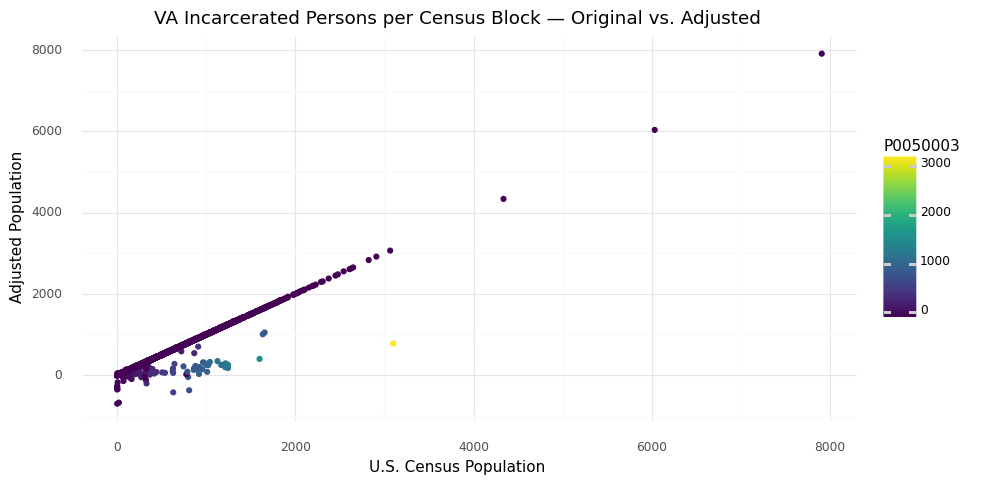

<ggplot: (789250355)>

In [206]:
(
        ggplot(df_va3) +
            aes(x='P0020001', y='ADJPOP', color = 'P0050003') +
            geom_point() +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() +
#             facet_wrap("~school_to_school") +
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
            labs(
                title = "VA Incarcerated Persons per Census Block — Original vs. Adjusted",
                y = "Adjusted Population",
                x = "U.S. Census Population"
            )
            + theme(figure_size=(10, 5)) 
    )

## Washington

##### 2020 PL 94-171 Data Summary File for Washington based on the Decennial Census at the Block level

In [207]:
df_wa1 = pd.read_csv("..//data//source//RDH-data//wa_pl2020_b_csv//wa_pl2020_b.csv", encoding="utf-8")
df_wa1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,WA,750,0,0,0,140760,7500000US530019501001000,530019501001000,4,9,53,1779804,1,H1,1531601,92800,Z5,1939613,99999,99,99999999,99999,99,99999999,950100,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,36830,2,393,99999,99999,9,999,99999,9,9,4,9,9,122,A,99999,99999,7380,126940523,512483,1000,Block 1000,S,11,6,47.198731,-118.099119,BK,99999,530019501001000,11,8,8,0,0,0,0,0,3,3,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,3,8,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [208]:
df_wa1_subset = df_wa1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [209]:
df_wa1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,WA,530019501001000,1,950100,1,1000,126940523,Block 1000,47.198731,-118.099119,11,11,7,0,0,0
1,PLST,WA,530019501001001,1,950100,1,1001,371748,Block 1001,47.219313,-118.017245,0,0,0,0,0,0
2,PLST,WA,530019501001002,1,950100,1,1002,2445833,Block 1002,47.234578,-118.096781,0,0,0,0,0,0
3,PLST,WA,530019501001003,1,950100,1,1003,10407,Block 1003,47.239457,-117.976537,0,0,0,0,0,0
4,PLST,WA,530019501001004,1,950100,1,1004,13985380,Block 1004,47.186582,-118.133821,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158088,PLST,WA,530779400081037,77,940008,1,1037,9090,Block 1037,46.451103,-120.430404,0,0,0,0,0,0
158089,PLST,WA,530779400081038,77,940008,1,1038,14660,Block 1038,46.454097,-120.430883,20,20,15,0,0,0
158090,PLST,WA,530779400081039,77,940008,1,1039,377313,Block 1039,46.451013,-120.433899,148,148,110,0,0,0
158091,PLST,WA,530779400081040,77,940008,1,1040,35525,Block 1040,46.452739,-120.436547,50,50,44,0,0,0


In [210]:
len(df_wa1_subset)

158093

##### 2020 Redistricting Data for Washington at the Block level (Adjusted)

"In accordance with RCW 44.05.140, the WA state redistricting commission is tasked with adjusting the 2020 census redistricting data (PL 94-171) by re-locating specified incarcerated or involuntary committed populations from their confinement location to their last know place of residence. The following file contains that adjusted data."

From Data Hub ReadMe file: This dataset was retrieved from the Washington Office of Financial Management at https://ofm.wa.gov/washington-data-research/population-demographics/decennial-census/2020-census-everyone-counts/2020-census-what-you-need-know/2020-census-data-releases 09/09/2021

README file — Column Names
* TotalPop = Total Population (Adjusted)
* GQPop = Population in Group Quarters (Adjusted)
* UTotalPop = Unadjusted Total Population
* UGQPop = Unadjusted Population in Group Quarters
* Adjusted = Values have been adjusted in this block
* OrigFacBlk = This block contains an Original Facility
* DestBlk = Population was move to this block
* PreSubtrct  = GQ Population was removed from this block to correct Census misallocations
* PreAdd = GQ Population was added to this block to correct Census misallocations

README file — Block Adjustment Details
* For Clallam Bay CC - 782 in Census population was moved from block 530090024003033 to block 530090024003216.
* For Mission Creek CCW - 175 in Census population was moved from block 530459604011010 to block 530459604011011. The address for Olympic CC is in block 530319507021054 but some of its population from block 530319507021045 as well.
* The address for Western State Hospital in block 530530721053012 but some of its population from blocks 530530721053009 and 530530721053017 as well.

In [211]:
df_wa2 = pd.read_csv("..//data//source//RDH-data//wa_pl2020_b_official_adjusted_csv//wa_2020_Redistricting_RCW4405140.csv", encoding="utf-8")
df_wa2

,GEOID20,TotalPop,GQPop,HHPop,WhiteAlNH,WhiteAlHi,BlackAlNH,BlackAlHi,AIANAlNH,AIANAlHi,AsianAlNH,AsianAlHi,NHOPIAlNH,NHOPIAlHi,OtherAlNH,OtherAlHi,TwoMoreNH,TwoMoreHi,UTotalPop,UGQPop,UHHPop,UWhiteAlNH,UWhiteAlHi,UBlackAlNH,UBlackAlHi,UAIANAlNH,UAIANAlHi,UAsianAlNH,UAsianAlHi,UNHOPIAlNH,UNHOPIAlHi,UOtherAlNH,UOtherAlHi,UTwoMoreNH,UTwoMoreHi,Adjusted,OrigFacBlk,DestBlk,PreSubtrct,PreAdd
0,530019501001000,11,0,11,8,0,0,0,0,0,0,0,0,0,0,0,0,3,11,0,11,8,0,0,0,0,0,0,0,0,0,0,0,0,3,NaN,NaN,NaN,NaN,NaN
1,530019501001001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,530019501001002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3,530019501001003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4,530019501001004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158088,530779400081037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
158089,530779400081038,20,0,20,0,3,1,0,0,2,0,0,0,0,0,9,0,5,20,0,20,0,3,1,0,0,2,0,0,0,0,0,9,0,5,NaN,NaN,NaN,NaN,NaN
158090,530779400081039,148,0,148,13,10,0,0,11,9,31,0,0,0,1,59,0,14,148,0,148,13,10,0,0,11,9,31,0,0,0,1,59,0,14,NaN,NaN,NaN,NaN,NaN
158091,530779400081040,50,0,50,4,6,0,0,3,0,3,0,0,0,1,16,0,17,50,0,50,4,6,0,0,3,0,3,0,0,0,1,16,0,17,NaN,NaN,NaN,NaN,NaN


In [212]:
# df_wa3 = pd.read_csv("RDH-data//wa_pl2020_official_csv//wa_pl2020_official_csv//wa_2020_pl94171_block/wa_2020_pl94171_block.csv", encoding="utf-8")
# df_wa3

README file — Column Names
* TotalPop = Total Population (Adjusted)
* GQPop = Population in Group Quarters (Adjusted)
* UTotalPop = Unadjusted Total Population
* UGQPop = Unadjusted Population in Group Quarters
* Adjusted = Values have been adjusted in this block
* OrigFacBlk = This block contains an Original Facility
* DestBlk = Population was move to this block
* PreSubtrct  = GQ Population was removed from this block to correct Census misallocations
* PreAdd = GQ Population was added to this block to correct Census misallocations

In [213]:
df_wa2_subset = df_wa2[['GEOID20', 'TotalPop', 'GQPop', 'UTotalPop', 'UGQPop', 'Adjusted', 'OrigFacBlk', 'DestBlk', 'PreSubtrct', 'PreAdd']]

In [214]:
df_wa2_subset

,GEOID20,TotalPop,GQPop,UTotalPop,UGQPop,Adjusted,OrigFacBlk,DestBlk,PreSubtrct,PreAdd
0,530019501001000,11,0,11,0,NaN,NaN,NaN,NaN,NaN
1,530019501001001,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,530019501001002,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3,530019501001003,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4,530019501001004,0,0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
158088,530779400081037,0,0,0,0,NaN,NaN,NaN,NaN,NaN
158089,530779400081038,20,0,20,0,NaN,NaN,NaN,NaN,NaN
158090,530779400081039,148,0,148,0,NaN,NaN,NaN,NaN,NaN
158091,530779400081040,50,0,50,0,NaN,NaN,NaN,NaN,NaN


In [215]:
len(df_wa2_subset)

158093

##### Merging the Datasets on GEOCODE and GEOID20

In [216]:
df_wa4 = pd.merge(df_wa1_subset, df_wa2_subset, left_on='GEOCODE', right_on='GEOID20')
df_wa4

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,GEOID20,TotalPop,GQPop,UTotalPop,UGQPop,Adjusted,OrigFacBlk,DestBlk,PreSubtrct,PreAdd
0,PLST,WA,530019501001000,1,950100,1,1000,126940523,Block 1000,47.198731,-118.099119,11,11,7,0,0,0,530019501001000,11,0,11,0,NaN,NaN,NaN,NaN,NaN
1,PLST,WA,530019501001001,1,950100,1,1001,371748,Block 1001,47.219313,-118.017245,0,0,0,0,0,0,530019501001001,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,PLST,WA,530019501001002,1,950100,1,1002,2445833,Block 1002,47.234578,-118.096781,0,0,0,0,0,0,530019501001002,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3,PLST,WA,530019501001003,1,950100,1,1003,10407,Block 1003,47.239457,-117.976537,0,0,0,0,0,0,530019501001003,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4,PLST,WA,530019501001004,1,950100,1,1004,13985380,Block 1004,47.186582,-118.133821,0,0,0,0,0,0,530019501001004,0,0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158088,PLST,WA,530779400081037,77,940008,1,1037,9090,Block 1037,46.451103,-120.430404,0,0,0,0,0,0,530779400081037,0,0,0,0,NaN,NaN,NaN,NaN,NaN
158089,PLST,WA,530779400081038,77,940008,1,1038,14660,Block 1038,46.454097,-120.430883,20,20,15,0,0,0,530779400081038,20,0,20,0,NaN,NaN,NaN,NaN,NaN
158090,PLST,WA,530779400081039,77,940008,1,1039,377313,Block 1039,46.451013,-120.433899,148,148,110,0,0,0,530779400081039,148,0,148,0,NaN,NaN,NaN,NaN,NaN
158091,PLST,WA,530779400081040,77,940008,1,1040,35525,Block 1040,46.452739,-120.436547,50,50,44,0,0,0,530779400081040,50,0,50,0,NaN,NaN,NaN,NaN,NaN


##### Creating Column for Differences between the Two Population Counts

In [217]:
df_wa4['dif_pop'] = df_wa4['TotalPop'] - df_wa4['P0020001']

In [218]:
df_wa4['adjpop'] = df_wa4['TotalPop']

In [219]:
df_wa4.head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,GEOID20,TotalPop,GQPop,UTotalPop,UGQPop,Adjusted,OrigFacBlk,DestBlk,PreSubtrct,PreAdd,dif_pop,adjpop
0,PLST,WA,530019501001000,1,950100,1,1000,126940523,Block 1000,47.198731,-118.099119,11,11,7,0,0,0,530019501001000,11,0,11,0,NaN,NaN,NaN,NaN,NaN,0,11
1,PLST,WA,530019501001001,1,950100,1,1001,371748,Block 1001,47.219313,-118.017245,0,0,0,0,0,0,530019501001001,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0
2,PLST,WA,530019501001002,1,950100,1,1002,2445833,Block 1002,47.234578,-118.096781,0,0,0,0,0,0,530019501001002,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0
3,PLST,WA,530019501001003,1,950100,1,1003,10407,Block 1003,47.239457,-117.976537,0,0,0,0,0,0,530019501001003,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0
4,PLST,WA,530019501001004,1,950100,1,1004,13985380,Block 1004,47.186582,-118.133821,0,0,0,0,0,0,530019501001004,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0


In [220]:
df_wa4.sort_values(by = 'TotalPop', ascending=True).head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,GEOID20,TotalPop,GQPop,UTotalPop,UGQPop,Adjusted,OrigFacBlk,DestBlk,PreSubtrct,PreAdd,dif_pop,adjpop
66602,PLST,WA,530330326043014,33,32604,3,3014,377396,Block 3014,47.513376,-121.892829,92,92,0,92,0,92,530330326043014,-5,-5,92,92,Y,Y,NaN,NaN,NaN,-97,-5
32615,PLST,WA,530270003001025,27,300,1,1025,3193,Block 1025,47.298980,-123.841052,0,0,0,0,0,0,530270003001025,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0
108361,PLST,WA,530599501001364,59,950100,1,1364,137273,Block 1364,46.152465,-122.081991,0,0,0,0,0,0,530599501001364,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0
108360,PLST,WA,530599501001363,59,950100,1,1363,127237,Block 1363,46.142354,-122.081310,0,0,0,0,0,0,530599501001363,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0
108359,PLST,WA,530599501001362,59,950100,1,1362,1205,Block 1362,46.147018,-122.080725,0,0,0,0,0,0,530599501001362,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0


Note: Washington seems to have a negative adjusted population

In [221]:
df_wa4.sort_values(by = 'dif_pop', ascending=True)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,GEOID20,TotalPop,GQPop,UTotalPop,UGQPop,Adjusted,OrigFacBlk,DestBlk,PreSubtrct,PreAdd,dif_pop,adjpop
114837,PLST,WA,530610522111001,61,52211,1,1001,768469,Block 1001,47.844855,-121.998543,2496,2496,2477,2458,2458,0,530610522111001,389,350,2496,2458,Y,Y,Y,NaN,NaN,-2107,389
27435,PLST,WA,530210208023091,21,20802,3,3091,702253,Block 3091,46.680791,-118.852215,2445,2445,2430,2403,2403,0,530210208023091,422,377,2445,2403,Y,Y,Y,NaN,NaN,-2023,422
142514,PLST,WA,530719204001004,71,920400,1,1004,826210,Block 1004,46.079723,-118.362707,2392,2392,2370,2318,2318,0,530719204001004,427,351,2392,2318,Y,Y,Y,NaN,NaN,-1965,427
126163,PLST,WA,530630104013008,63,10401,3,3008,664416,Block 3008,47.653641,-117.576835,2131,2131,2131,2131,2131,0,530630104013008,350,350,2131,2131,Y,Y,NaN,NaN,NaN,-1781,350
35990,PLST,WA,530270016021022,27,1602,1,1022,699055,Block 1022,46.923704,-123.917419,1937,1937,1937,1937,1937,0,530270016021022,286,281,1937,1937,Y,Y,Y,NaN,NaN,-1651,286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122420,PLST,WA,530630024001055,63,2400,1,1055,83779,Block 1055,47.666031,-117.428919,463,463,457,459,455,4,530630024001055,547,459,463,459,Y,NaN,Y,NaN,NaN,84,547
109993,PLST,WA,530610407001004,61,40700,1,1004,15520,Block 1004,47.977290,-122.203659,388,388,387,384,377,0,530610407001004,492,384,388,384,Y,NaN,Y,NaN,NaN,104,492
90354,PLST,WA,530530602001133,53,60200,1,1133,49543,Block 1133,47.249117,-122.421470,781,781,781,781,781,0,530530602001133,892,781,781,781,Y,NaN,Y,NaN,NaN,111,892
92001,PLST,WA,530530614002005,53,61400,2,2005,52219,Block 2005,47.253639,-122.446144,1344,1344,1344,1344,1344,0,530530614002005,1567,1344,1344,1344,Y,NaN,Y,NaN,NaN,223,1567


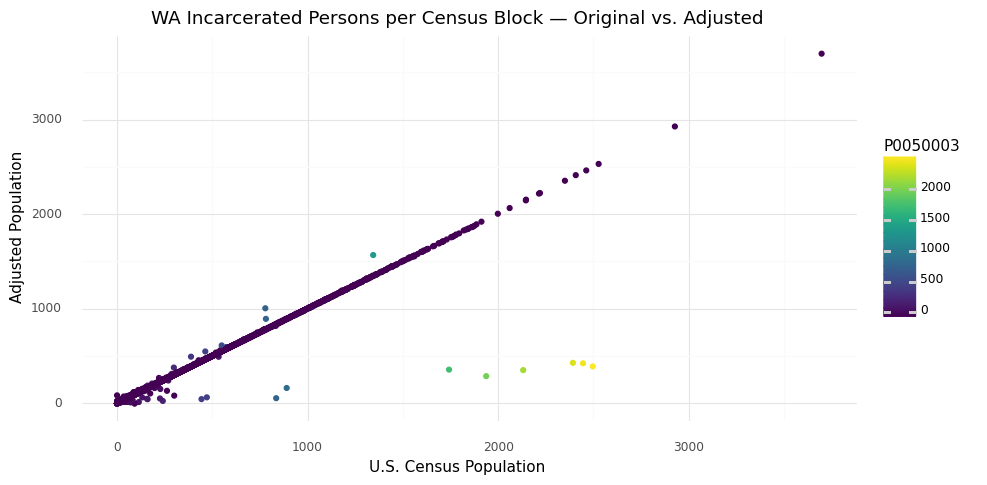

<ggplot: (767129619)>

In [222]:
(
        ggplot(df_wa4) +
            aes(x='P0020001', y='TotalPop', color = 'P0050003') +
            geom_point() +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() +
#             facet_wrap("~school_to_school") +
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
            labs(
                title = "WA Incarcerated Persons per Census Block — Original vs. Adjusted",
                y = "Adjusted Population",
                x = "U.S. Census Population"
            )
            + theme(figure_size=(10, 5)) 
    )

In [223]:
# df_ca8['dif_Inst_Juvenile'] = df_ca8['P0050004'] - df_ca8['GQ_Inst_Juvenile']

-----

## Pennsylvania (Commission-adjusted)

##### 2020 PL 94-171 Data Summary File for Pennsylvania based on the Decennial Census at the Block level

In [224]:
df_pa1 = pd.read_csv("..//data//source//RDH-data//pa_pl2020_b_csv//pa_pl2020_b.csv", encoding="utf-8")
df_pa1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,PA,750,0,0,0,191600,7500000US420010301011000,420010301011000,1,2,42,1779798,1,H1,1213656,41672,T1,1215787,99999,99,99999999,99999,99,99999999,30101,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,23900,1,276,99999,99999,9,999,99999,9,9,13,33,193,310,A,99999,99999,3450,66598,0,1000,Block 1000,S,11,4,40.058694,-77.106766,BK,99999,420010301011000,11,7,7,0,0,0,0,0,4,4,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,11,7,7,0,0,0,0,0,4,4,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,7,7,0,0,0,0,0,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [225]:
df_pa1_subset = df_pa1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [226]:
df_pa1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,PA,420010301011000,1,30101,1,1000,66598,Block 1000,40.058694,-77.106766,11,11,9,0,0,0
1,PLST,PA,420010301011001,1,30101,1,1001,172195,Block 1001,40.059137,-77.110474,28,28,28,0,0,0
2,PLST,PA,420010301011002,1,30101,1,1002,39245,Block 1002,40.061111,-77.113522,13,13,9,0,0,0
3,PLST,PA,420010301011003,1,30101,1,1003,318879,Block 1003,40.061827,-77.117948,70,70,54,0,0,0
4,PLST,PA,420010301011004,1,30101,1,1004,46781,Block 1004,40.063614,-77.122356,8,8,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336980,PLST,PA,421330240022032,133,24002,2,2032,759336,Block 2032,39.736392,-76.413544,37,37,33,0,0,0
336981,PLST,PA,421330240022033,133,24002,2,2033,71822,Block 2033,39.731990,-76.407937,0,0,0,0,0,0
336982,PLST,PA,421330240022034,133,24002,2,2034,1142,Block 2034,39.734846,-76.408701,0,0,0,0,0,0
336983,PLST,PA,421330240022035,133,24002,2,2035,61854,Block 2035,39.729585,-76.450771,59,59,52,0,0,0


In [227]:
len(df_pa1_subset)

336985

##### 2020 Redistricting Data for Pennsylvania at County? Level (Adjusted)

From Data Hub ReadMe file: These datasets were retrieved from the Pennsylavania Legislative Reapportionment Commission at https://www.redistricting.state.pa.us/maps/#census 10/25/2021

https://www.redistricting.state.pa.us/maps/#2021-Data-Set-2 2/13/2022

"This data set will be used by the Legislative Reapportionment Commission as the basis for redrawing Pennsylvania's State House and Senate districts.
The 2021 adjusted U.S. Census population data corrects issues in the original 2020 data received from the Census Bureau, such as voting district code and name discrepancies, municipality name discrepancies, precinct changes which may have been made after the U.S. Census' Phase 2 program, and split block issues.
This data also includes adjustments to the population to account for prisoner reallocation."

In [228]:
df_pa2 = pd.read_excel("..//data//source//RDH-data//pa_pl2020_official_xlsx//2021 Prison Adjusted Census Population.xlsx")
df_pa2 

,STFID,COUNTY,CBT,CD,SD,HD,MUNICIPALITY,LEVEL1_IND,LEVEL1,LEVEL2_IND,LEVEL2,MCD,FIPS_MCD,FIPS,VTD,PL_VTD,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020013,P0020014,P0020015,P0020016,P0020017,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040013,P0040014,P0040015,P0040016,P0040017
0,420010010,1,6,13,33,193,ABBOTTSTOWN,NaN,NaN,NaN,NaN,5,116,1,0010,10,1025,956,868,11,4,2,1,70,69,132,893,871,856,7,1,2,1,4,22,4,8,2,0,7,747,702,654,4,4,1,1,38,45,83,664,648,642,0,1,1,1,3,16,0,8,0,0,7
1,420010020,1,6,13,33,193,ARENDTSVILLE,NaN,NaN,NaN,NaN,10,2928,1,0020,20,870,822,712,11,2,5,0,92,48,175,695,687,672,10,0,5,0,0,8,1,2,4,0,0,637,608,546,10,2,4,0,46,29,97,540,536,523,9,0,4,0,0,4,0,2,1,0,0
2,420010030,1,6,13,33,193,BENDERSVILLE,NaN,NaN,NaN,NaN,15,5536,1,0030,30,737,614,479,8,5,0,0,122,123,266,471,438,428,8,1,0,0,1,33,3,14,0,2,11,520,449,363,7,5,0,0,74,71,164,356,342,333,7,1,0,0,1,14,0,6,0,2,6
3,420010040,1,4,13,33,193,BERWICK,NaN,NaN,NaN,NaN,20,5880,1,0040,40,2409,2288,2144,35,12,34,0,63,121,118,2291,2209,2124,34,7,34,0,10,82,23,37,9,0,11,1977,1888,1794,29,3,26,0,36,89,70,1907,1847,1787,28,2,26,0,4,60,13,30,4,0,11
4,420010050,1,6,13,33,193,BIGLERVILLE,NaN,NaN,NaN,NaN,25,6296,1,0050,50,1228,1113,969,16,12,4,1,111,115,231,997,957,932,14,3,4,1,3,40,10,24,2,0,3,929,858,760,16,8,0,1,73,71,141,788,764,743,14,3,0,1,3,24,5,15,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9173,421331426,67,4,10,28,93,YORK,W,05,P,02 2000,350,87056,133,1426,1426,1568,1466,1305,102,5,21,0,33,102,121,1447,1397,1285,87,4,21,0,0,50,19,14,3,0,6,1216,1154,1054,56,5,21,0,18,62,80,1136,1113,1036,52,4,21,0,0,23,0,10,1,0,5
9174,421331427,67,4,10,28,93,YORK,W,05,P,03 (CD 10),350,87056,133,1427,1427,1890,1784,1648,65,4,33,1,33,106,101,1789,1717,1614,63,2,33,1,4,72,20,25,8,0,10,1492,1432,1328,49,4,32,1,18,60,70,1422,1386,1304,47,2,32,1,0,36,4,16,5,0,7
9175,421331428,67,4,11,28,93,YORK,W,05,P,03 (CD 11),350,87056,133,1428,1428,820,765,639,82,1,6,0,37,55,86,734,709,622,81,1,5,0,0,25,3,10,6,0,4,681,651,580,51,0,3,0,17,30,41,640,625,572,50,0,3,0,0,15,2,8,2,0,3
9176,421331430,67,6,10,48,47,YORK HAVEN,NaN,NaN,NaN,NaN,360,87080,133,1430,1430,689,630,574,26,3,2,0,25,59,55,634,586,554,25,2,2,0,3,48,10,32,1,0,2,488,441,412,13,3,0,0,13,47,34,454,417,403,12,2,0,0,0,37,5,29,1,0,0


In [229]:
df_pa2_subset = df_pa2[['STFID', 'COUNTY', 'CBT', 'CD', 'SD', 'MUNICIPALITY', 'MCD', 'FIPS', 'FIPS_MCD', 'VTD', 'PL_VTD', 'P0010001', 'P0030001']]

In [230]:
df_pa2_subset

,STFID,COUNTY,CBT,CD,SD,MUNICIPALITY,MCD,FIPS,FIPS_MCD,VTD,PL_VTD,P0010001,P0030001
0,420010010,1,6,13,33,ABBOTTSTOWN,5,1,116,0010,10,1025,747
1,420010020,1,6,13,33,ARENDTSVILLE,10,1,2928,0020,20,870,637
2,420010030,1,6,13,33,BENDERSVILLE,15,1,5536,0030,30,737,520
3,420010040,1,4,13,33,BERWICK,20,1,5880,0040,40,2409,1977
4,420010050,1,6,13,33,BIGLERVILLE,25,1,6296,0050,50,1228,929
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9173,421331426,67,4,10,28,YORK,350,133,87056,1426,1426,1568,1216
9174,421331427,67,4,10,28,YORK,350,133,87056,1427,1427,1890,1492
9175,421331428,67,4,11,28,YORK,350,133,87056,1428,1428,820,681
9176,421331430,67,6,10,48,YORK HAVEN,360,133,87080,1430,1430,689,488


In [231]:
len(df_pa2_subset)

9178

In [232]:
len(df_pa1_subset)

336985

##### 2020 Redistricting Data for Pennsylvania at County? Level (Not Adjusted)

Unfortunately, the PA Redisticting group did not share block level adjusted data but they did share adjusted data at a county level and data at the same level before adjustment, so I will compare those two datasets as opposed to P.>

In [233]:
df_pa3 = pd.read_excel("..//data//source//pa-redistricting//2021_Adjusted_Census_Population.xlsx")
df_pa3 

,STFID,COUNTY,CBT,CD,SD,HD,MUNICIPALITY,LEVEL1_IND,LEVEL1,LEVEL2_IND,LEVEL2,MCD,FIPS_MCD,FIPS,VTD,PL_VTD,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020013,P0020014,P0020015,P0020016,P0020017,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040013,P0040014,P0040015,P0040016,P0040017
0,420010010,1,6,13,33,193,ABBOTTSTOWN,NaN,NaN,NaN,NaN,5,116,1,0010,10,1022,953,865,11,4,2,1,70,69,132,890,868,853,7,1,2,1,4,22,4,8,2,0,7,744,699,651,4,4,1,1,38,45,83,661,645,639,0,1,1,1,3,16,0,8,0,0,7
1,420010020,1,6,13,33,193,ARENDTSVILLE,NaN,NaN,NaN,NaN,10,2928,1,0020,20,867,819,710,10,2,5,0,92,48,175,692,684,670,9,0,5,0,0,8,1,2,4,0,0,634,605,544,9,2,4,0,46,29,97,537,533,521,8,0,4,0,0,4,0,2,1,0,0
2,420010030,1,6,13,33,193,BENDERSVILLE,NaN,NaN,NaN,NaN,15,5536,1,0030,30,736,613,479,8,5,0,0,121,123,265,471,438,428,8,1,0,0,1,33,3,14,0,2,11,519,448,363,7,5,0,0,73,71,163,356,342,333,7,1,0,0,1,14,0,6,0,2,6
3,420010040,1,4,13,33,193,BERWICK,NaN,NaN,NaN,NaN,20,5880,1,0040,40,2403,2282,2138,35,12,34,0,63,121,118,2285,2203,2118,34,7,34,0,10,82,23,37,9,0,11,1971,1882,1788,29,3,26,0,36,89,70,1901,1841,1781,28,2,26,0,4,60,13,30,4,0,11
4,420010050,1,6,13,33,193,BIGLERVILLE,NaN,NaN,NaN,NaN,25,6296,1,0050,50,1225,1110,967,15,12,4,1,111,115,231,994,954,930,13,3,4,1,3,40,10,24,2,0,3,926,855,758,15,8,0,1,73,71,141,785,761,741,13,3,0,1,3,24,5,15,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9173,421331426,67,4,10,28,93,YORK,W,05,P,02 2000,350,87056,133,1426,1426,1568,1466,1305,102,5,21,0,33,102,121,1447,1397,1285,87,4,21,0,0,50,19,14,3,0,6,1216,1154,1054,56,5,21,0,18,62,80,1136,1113,1036,52,4,21,0,0,23,0,10,1,0,5
9174,421331427,67,4,10,28,93,YORK,W,05,P,03 (CD 10),350,87056,133,1427,1427,1889,1783,1647,65,4,33,1,33,106,101,1788,1716,1613,63,2,33,1,4,72,20,25,8,0,10,1491,1431,1327,49,4,32,1,18,60,70,1421,1385,1303,47,2,32,1,0,36,4,16,5,0,7
9175,421331428,67,4,11,28,93,YORK,W,05,P,03 (CD 11),350,87056,133,1428,1428,818,763,637,82,1,6,0,37,55,86,732,707,620,81,1,5,0,0,25,3,10,6,0,4,679,649,578,51,0,3,0,17,30,41,638,623,570,50,0,3,0,0,15,2,8,2,0,3
9176,421331430,67,6,10,48,47,YORK HAVEN,NaN,NaN,NaN,NaN,360,87080,133,1430,1430,686,627,571,26,3,2,0,25,59,55,631,583,551,25,2,2,0,3,48,10,32,1,0,2,485,438,409,13,3,0,0,13,47,34,451,414,400,12,2,0,0,0,37,5,29,1,0,0


In [234]:
df_pa3_subset = df_pa3[['STFID', 'COUNTY', 'CBT', 'CD', 'SD', 'MUNICIPALITY', 'MCD', 'FIPS', 'FIPS_MCD', 'VTD', 'PL_VTD', 'P0010001', 'P0030001']]

In [235]:
df_pa3_subset

,STFID,COUNTY,CBT,CD,SD,MUNICIPALITY,MCD,FIPS,FIPS_MCD,VTD,PL_VTD,P0010001,P0030001
0,420010010,1,6,13,33,ABBOTTSTOWN,5,1,116,0010,10,1022,744
1,420010020,1,6,13,33,ARENDTSVILLE,10,1,2928,0020,20,867,634
2,420010030,1,6,13,33,BENDERSVILLE,15,1,5536,0030,30,736,519
3,420010040,1,4,13,33,BERWICK,20,1,5880,0040,40,2403,1971
4,420010050,1,6,13,33,BIGLERVILLE,25,1,6296,0050,50,1225,926
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9173,421331426,67,4,10,28,YORK,350,133,87056,1426,1426,1568,1216
9174,421331427,67,4,10,28,YORK,350,133,87056,1427,1427,1889,1491
9175,421331428,67,4,11,28,YORK,350,133,87056,1428,1428,818,679
9176,421331430,67,6,10,48,YORK HAVEN,360,133,87080,1430,1430,686,485


In [236]:
len(df_pa3_subset)

9178

##### Merging the County? level PA Redistricting Datasets on STFID

In [237]:
df_pa4 = pd.merge(df_pa3_subset, df_pa2_subset, left_on='STFID', right_on='STFID')
df_pa4

,STFID,COUNTY_x,CBT_x,CD_x,SD_x,MUNICIPALITY_x,MCD_x,FIPS_x,FIPS_MCD_x,VTD_x,PL_VTD_x,P0010001_x,P0030001_x,COUNTY_y,CBT_y,CD_y,SD_y,MUNICIPALITY_y,MCD_y,FIPS_y,FIPS_MCD_y,VTD_y,PL_VTD_y,P0010001_y,P0030001_y
0,420010010,1,6,13,33,ABBOTTSTOWN,5,1,116,0010,10,1022,744,1,6,13,33,ABBOTTSTOWN,5,1,116,0010,10,1025,747
1,420010020,1,6,13,33,ARENDTSVILLE,10,1,2928,0020,20,867,634,1,6,13,33,ARENDTSVILLE,10,1,2928,0020,20,870,637
2,420010030,1,6,13,33,BENDERSVILLE,15,1,5536,0030,30,736,519,1,6,13,33,BENDERSVILLE,15,1,5536,0030,30,737,520
3,420010040,1,4,13,33,BERWICK,20,1,5880,0040,40,2403,1971,1,4,13,33,BERWICK,20,1,5880,0040,40,2409,1977
4,420010050,1,6,13,33,BIGLERVILLE,25,1,6296,0050,50,1225,926,1,6,13,33,BIGLERVILLE,25,1,6296,0050,50,1228,929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9173,421331426,67,4,10,28,YORK,350,133,87056,1426,1426,1568,1216,67,4,10,28,YORK,350,133,87056,1426,1426,1568,1216
9174,421331427,67,4,10,28,YORK,350,133,87056,1427,1427,1889,1491,67,4,10,28,YORK,350,133,87056,1427,1427,1890,1492
9175,421331428,67,4,11,28,YORK,350,133,87056,1428,1428,818,679,67,4,11,28,YORK,350,133,87056,1428,1428,820,681
9176,421331430,67,6,10,48,YORK HAVEN,360,133,87080,1430,1430,686,485,67,6,10,48,YORK HAVEN,360,133,87080,1430,1430,689,488


-----

## Montana  (TBD Commission-adjusted)

In [238]:
df_mt1 = pd.read_csv("..//data//source//RDH-data//mt_pl2020_b_csv//mt_pl2020_b.csv", encoding="utf-8")
# df_mt1

In [239]:
df_mt1_subset = df_mt1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [240]:
# df_mt1_subset

In [241]:
len(df_mt1_subset)

88417

##### 2020 Redistricting Data for Montana at the Block level (Adjusted)

From Data Hub ReadMe file: ??